In [3]:
# Esercizi da fare:
# Remove 5 landmarks and see the result
# Play with the noise (odometry and sensor)
# Play with the number of particles [10, 250, 500, 1000]

#Credits to Thrun, S. Particle Filters in Robotics. Proceedings of the 17th Annual Conference on Uncertainty in AI (UAI), 2002.
import numpy as np
import matplotlib.pyplot as plt
from math import *
import random

landmarks = [[20.0, 20.0], [20.0, 80.0], [20.0, 50.0],
             [50.0, 20.0], [50.0, 80.0], [80.0, 80.0],
             [80.0, 20.0], [80.0, 50.0]]
world_size = 100.0 #100x/100y

class robot:

    #initialize the position of the robot
    def __init__(self):
        self.x = random.random() * world_size
        self.y = random.random() * world_size
        self.orientation = random.random() * 2.0 * pi
        self.forward_noise = 0.0
        self.turn_noise    = 0.0
        self.sense_noise   = 0.0
        self.weight        = 1.0

    #set initial position of the robot
    def set(self, new_x, new_y, new_orientation):
        if new_x < 0 or new_x >= world_size:
            raise ValueError('X coordinate out of bound')
        if new_y < 0 or new_y >= world_size:
            raise ValueError('Y coordinate out of bound')  # Correct syntax
        if new_orientation < 0 or new_orientation >= 2 * pi:
            raise ValueError('Orientation must be in [0..2pi]')  # Correct syntax
        self.x = float(new_x)
        self.y = float(new_y)
        self.orientation = float(new_orientation)

    #noise new position of the robot
    def set_noise(self, new_f_noise, new_t_noise, new_s_noise):
        # makes it possible to change the noise parameters
        # this is often useful in particle filters
        self.forward_noise = float(new_f_noise);
        self.turn_noise    = float(new_t_noise);
        self.sense_noise   = float(new_s_noise);

    #distance of the robot wrt the landmarks
    def sense(self):
        Z = []
        for i in range(len(landmarks)):
            dist = sqrt((self.x - landmarks[i][0]) ** 2 + (self.y - landmarks[i][1]) ** 2)
            dist += random.gauss(0.0, self.sense_noise)
            Z.append(dist)
        return Z

    #move the robot according to the function parameters
    def move(self, turn, forward):
        if forward < 0:
            raise (ValueError, 'Robot cant move backwards')

        # turn, and add randomness to the turning command
        orientation = self.orientation + float(turn) + random.gauss(0.0, self.turn_noise)
        orientation %= 2 * pi

        # move, and add randomness to the motion command
        dist = float(forward) + random.gauss(0.0, self.forward_noise)
        x = self.x + (cos(orientation) * dist)
        y = self.y + (sin(orientation) * dist)
        x %= world_size    # cyclic truncate
        y %= world_size

        # set particle
        res = robot()
        res.set(x, y, orientation)
        res.set_noise(self.forward_noise, self.turn_noise, self.sense_noise)
        return res

    # calculates the probability of x for 1-dim Gaussian with mean mu and var. sigma
    def Gaussian(self, mu, sigma, x):
        return exp(- ((mu - x) ** 2) / (sigma ** 2) / 2.0) / sqrt(2.0 * pi * (sigma ** 2))


    def measurement_prob(self, measurement):
        for i in range(len(landmarks)):
            dist = sqrt((self.x - landmarks[i][0]) ** 2 + (self.y - landmarks[i][1]) ** 2)
            self.weight *= self.Gaussian(dist, self.sense_noise, measurement[i])
        return self.weight

    def __repr__(self):
        return '[x=%.6s y=%.6s orient=%.6s]' % (str(self.x), str(self.y), str(self.orientation))




create myrobot:  [x=38.123 y=40.450 orient=3.1550]
set myrobot:  [x=30.0 y=50.0 orient=1.5707]
move:  [x=45.0 y=50.0 orient=0.0]
sense:  [39.05124837953327, 39.05124837953327, 25.0, 30.4138126514911, 30.4138126514911, 46.09772228646444, 46.09772228646444, 35.0]
move:  [x=45.0 y=40.0 orient=4.7123]
sense:  [32.01562118716424, 47.16990566028302, 26.92582403567252, 20.615528128088304, 40.311288741492746, 53.150729063673246, 40.311288741492746, 36.40054944640259]


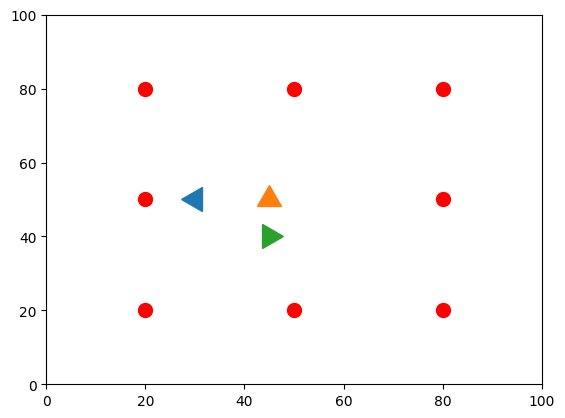

In [4]:
def eval(r, p):
    sum = 0.0;
    for i in range(len(p)): # calculate mean error
        dx = (p[i].x - r.x + (world_size/2.0)) % world_size - (world_size/2.0)
        dy = (p[i].y - r.y + (world_size/2.0)) % world_size - (world_size/2.0)
        err = sqrt(dx * dx + dy * dy)
        sum += err
    return sum / float(len(p))


#### First let's move the robot!
def moveRobot():
    myrobot = robot()
    print ("create myrobot: ", myrobot)
    myrobot.set(30.0, 50.0, pi/2.0)
    positionsX=[]
    positionsY=[]
    orientation=[]

    plt.axis([0, 100, 0, 100])
    positionsX.append(myrobot.x)
    positionsY.append(myrobot.y)
    orientation.append(myrobot.orientation)

    print ("set myrobot: ", myrobot)
    myrobot = myrobot.move(-pi/2.0, 15.0)
    positionsX.append(myrobot.x)
    positionsY.append(myrobot.y)
    orientation.append(myrobot.orientation)

    print ("move: ", myrobot)
    print ("sense: ", myrobot.sense())
    myrobot = myrobot.move(-pi/2.0, 10.0)
    positionsX.append(myrobot.x)
    positionsY.append(myrobot.y)
    orientation.append(myrobot.orientation)

    print ("move: ", myrobot)
    print ("sense: ", myrobot.sense())
    for i in range(len(positionsX)):
      plt.plot(positionsX[i], positionsY[i], marker=(3, 0, orientation[i]* 180 / pi), markersize=20, linestyle='None')

    for l in landmarks:
      plt.scatter(l[0], l[1],color='red', s=100)

    plt.show()


moveRobot()

move:  [x=30.0 y=50.0 orient=1.5707]
move:  [x=45.331 y=49.915 orient=6.2777]
move:  [x=43.890 y=35.449 orient=4.6130]


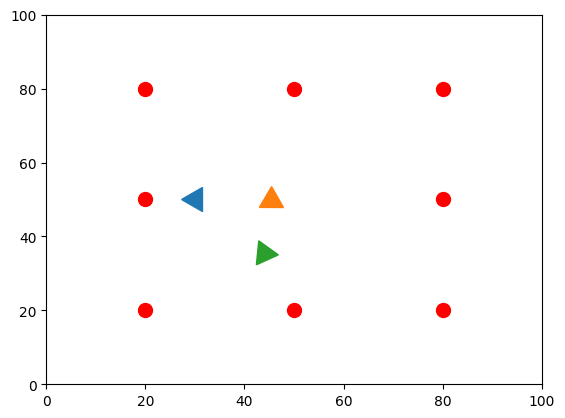

In [5]:
#### The robot can turn and we can model the noise!
def moveRobotTurn():
    positionsX=[]
    positionsY=[]
    orientation=[]
    myrobot = robot()
    myrobot.set_noise(5.0, 0.1, 5.0)
    myrobot.set(30.0, 50.0, pi/2)
    positionsX.append(myrobot.x)
    positionsY.append(myrobot.y)
    orientation.append(myrobot.orientation)
    plt.axis([0, 100, 0, 100])
    print ("move: ", myrobot)

    myrobot = myrobot.move(-pi/2, 15.0)
    print ("move: ", myrobot)
    #print (myrobot.sense())
    positionsX.append(myrobot.x)
    positionsY.append(myrobot.y)
    orientation.append(myrobot.orientation)

    myrobot = myrobot.move(-pi/2, 10.0)
    #print (myrobot.sense())
    print ("move: ", myrobot)
    positionsX.append(myrobot.x)
    positionsY.append(myrobot.y)
    orientation.append(myrobot.orientation)

    for i in range(len(positionsX)):
      plt.plot(positionsX[i], positionsY[i], marker=(3, 0, orientation[i]* 180 / pi), markersize=20, linestyle='None')
    for l in landmarks:
        plt.scatter(l[0], l[1],color='red', s=100)
    plt.show()

moveRobotTurn()


In [11]:
def visualization(robot, step, p, pr, weights):
    '''
    :param robot:   the current robot object
    :param step:    the current step
    :param p:       list with particles
    :param pr:      list of resampled particles
    :param weights: particle weights
    '''
    plt.figure("Robot in the world ", figsize=(15., 15.))
    # draw coordinate grid for plotting
    grid = [0, world_size, 0, world_size]
    plt.axis(grid)
    #plt.grid(b=True, which='major', color='0.75', linestyle='--')
    plt.xticks([i for i in range(0, int(world_size), 5)])
    plt.yticks([i for i in range(0, int(world_size), 5)])

    # Trova l'indice della particella con il peso massimo
    max_weight_index = weights.index(max(weights))

    # draw particles
    for ind in range(len(p)):

        if ind == max_weight_index:
            # Disegna la particella con il peso massimo in rosso
            circle = plt.Circle((p[ind].x, p[ind].y), 2., facecolor='#050505', edgecolor='#050505', alpha=0.7) # black
            arrow = plt.Arrow(p[ind].x, p[ind].y, 2*cos(p[ind].orientation), 2*sin(p[ind].orientation), alpha=1., facecolor='#cc0000', edgecolor='#cc0000')
        else:
            # Disegna tutte le altre particelle
            circle = plt.Circle((p[ind].x, p[ind].y), 1., facecolor='#ffb266', edgecolor='#994c00', alpha=0.5) # yellow
            arrow = plt.Arrow(p[ind].x, p[ind].y, 2*cos(p[ind].orientation), 2*sin(p[ind].orientation), alpha=1., facecolor='#994c00', edgecolor='#994c00')

        plt.gca().add_patch(circle)
        plt.gca().add_patch(arrow)

    # draw resampled particles
    for ind in range(len(pr)):

        # particle
        circle = plt.Circle((pr[ind].x, pr[ind].y), 1., facecolor='#66ff66', edgecolor='#009900', alpha=0.5) # green
        plt.gca().add_patch(circle)

        # particle's orientation
        arrow = plt.Arrow(pr[ind].x, pr[ind].y, 2*cos(pr[ind].orientation), 2*sin(pr[ind].orientation), alpha=1., facecolor='#006600', edgecolor='#006600')
        plt.gca().add_patch(arrow)

    # fixed landmarks of known locations
    for lm in landmarks:
        circle = plt.Circle((lm[0], lm[1]), 1., facecolor='#cc0000', edgecolor='#330000')
        plt.gca().add_patch(circle)

    # robot's location
    circle = plt.Circle((robot.x, robot.y), 1., facecolor='#6666ff', edgecolor='#0000cc') # blue
    plt.gca().add_patch(circle)

    # robot's orientation
    arrow = plt.Arrow(robot.x, robot.y, 2*cos(robot.orientation), 2*sin(robot.orientation), alpha=0.5, facecolor='#000000', edgecolor='#000000')
    plt.gca().add_patch(arrow)

    #plt.savefig("figure_" + str(step) + ".png")
    plt.show()
    #plt.close()

100
[[x=80.859 y=55.147 orient=3.7563], [x=18.478 y=43.508 orient=5.7277], [x=32.960 y=52.606 orient=3.5417], [x=86.488 y=57.751 orient=0.9705], [x=41.263 y=21.282 orient=1.1051], [x=58.095 y=36.574 orient=5.0090], [x=76.780 y=65.528 orient=5.2877], [x=3.8460 y=44.187 orient=3.6724], [x=26.980 y=47.597 orient=1.4347], [x=58.270 y=50.356 orient=2.6592], [x=65.936 y=68.020 orient=3.2787], [x=38.074 y=73.078 orient=4.9989], [x=45.848 y=66.610 orient=3.5813], [x=21.136 y=91.369 orient=2.4184], [x=49.933 y=57.561 orient=1.0292], [x=67.066 y=46.661 orient=3.0191], [x=45.368 y=88.763 orient=0.5490], [x=98.765 y=2.8743 orient=3.4231], [x=90.051 y=28.135 orient=1.5170], [x=72.855 y=16.862 orient=5.3989], [x=7.6290 y=19.282 orient=3.5558], [x=28.321 y=73.877 orient=3.3449], [x=18.588 y=88.106 orient=4.3294], [x=1.5279 y=53.239 orient=5.2514], [x=43.889 y=66.829 orient=1.3293], [x=19.737 y=61.564 orient=2.5238], [x=26.045 y=21.513 orient=5.6977], [x=38.448 y=86.782 orient=1.7120], [x=9.4275 y=39.

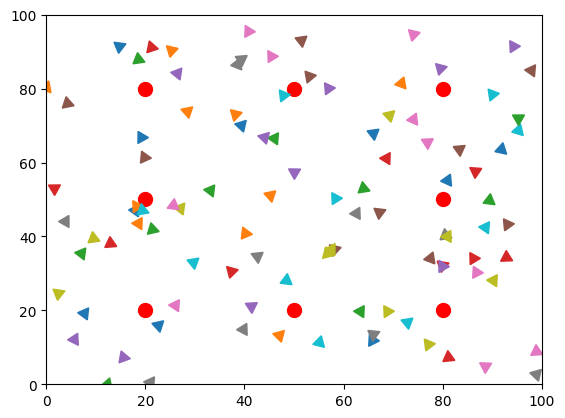

In [6]:

# We define multiples particles as a robot representation
def createParticlesTest():
    N = 100
    p = []
    plt.axis([0, 100, 0, 100])

    for i in range(N):
        p.append(robot())
    print (len(p))
    print (p)

    for i in range(N):
      plt.plot(p[i].x, p[i].y, marker=(3, 0, p[i].orientation* 180 / pi), markersize=10, linestyle='None')

    for l in landmarks:
        plt.scatter(l[0], l[1],color='red', s=100)

    plt.show()

createParticlesTest()

[1.0906173476129628e-35, 1.5373026640397242e-19, 9.361439180899881e-30, 4.664966056824448e-52, 1.8550919270005177e-72, 1.4550692113268322e-29, 6.802429426561355e-82, 7.706086966324229e-35, 3.261844710247716e-19, 5.083088256927291e-99, 1.6308060963478114e-41, 1.9648066808165835e-52, 1.4050672919637667e-25, 1.4879830711559296e-63, 1.9280493733414521e-10, 1.4624822557139861e-66, 4.5811687654438305e-26, 5.453693844001714e-94, 1.5605668086853852e-29, 4.40807948030761e-57, 1.5217543000243113e-111, 2.4838422390338467e-94, 1.1770719657004002e-113, 2.5743502972650048e-45, 1.4453273285405334e-108, 6.450305059444884e-46, 2.2292894357773342e-41, 1.8314164354201866e-154, 1.1072047873298676e-51, 7.299725498988047e-96, 1.8668062192662096e-94, 9.499474802902578e-66, 3.891472418407722e-75, 4.92563645527405e-53, 2.4822382413919263e-105, 1.3139062790312906e-59, 7.087056853890939e-29, 2.1504854779521128e-35, 1.34590459587741e-16, 3.8935966593161155e-85, 3.8311304920126374e-110, 2.485522877109659e-59, 1.33

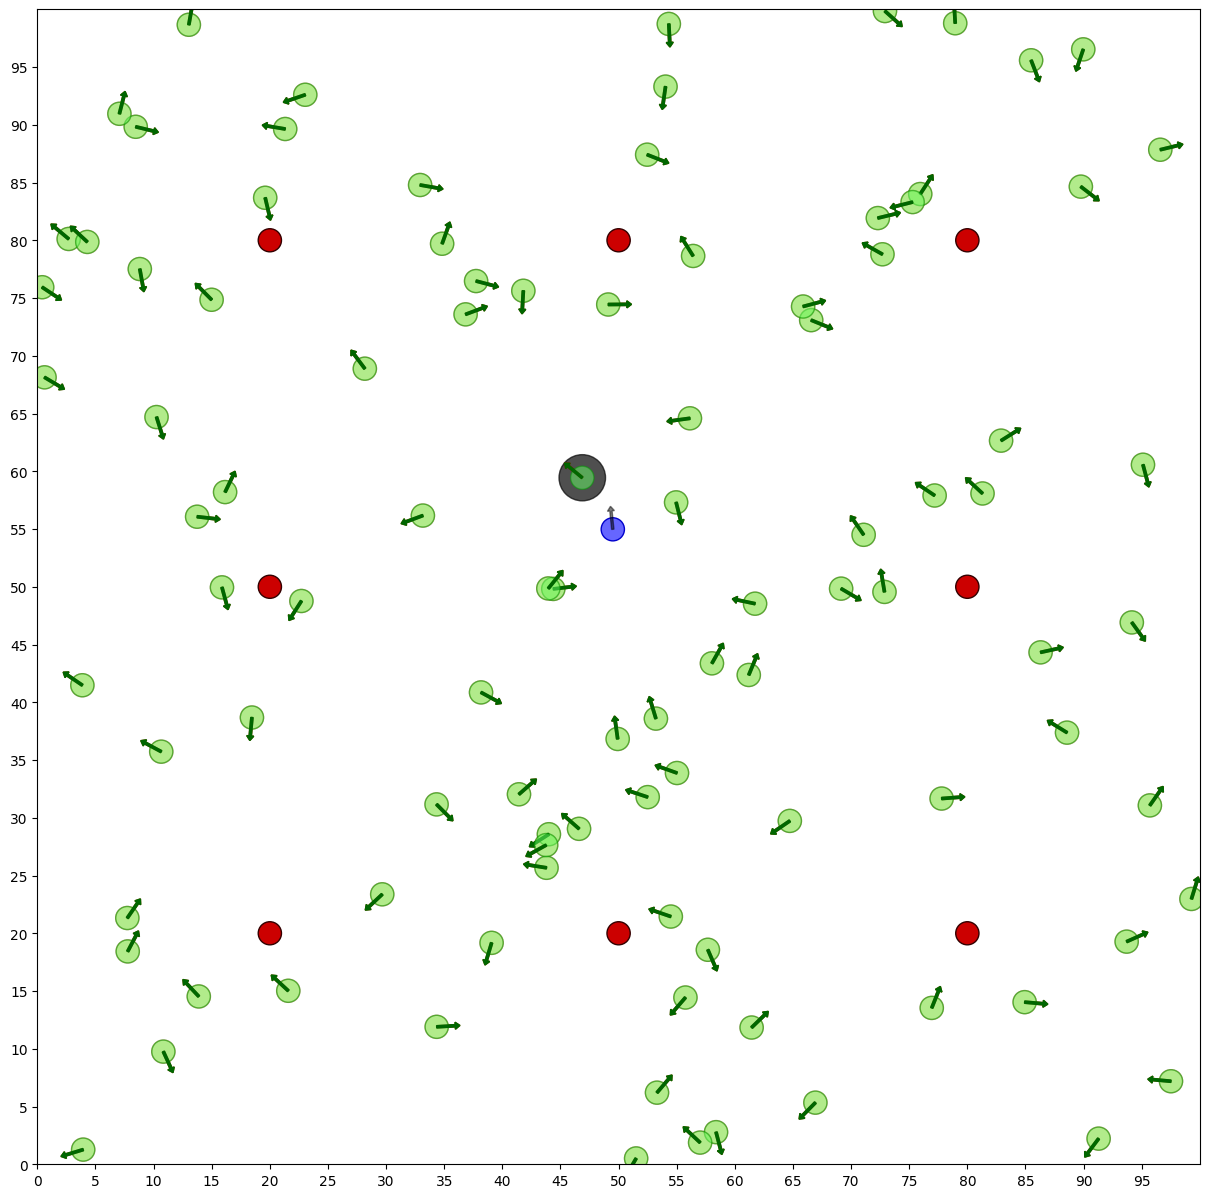

[5.746967335883776e-34, 2.843377744886116e-21, 1.2889058658266281e-31, 5.128503482253602e-72, 4.830710543886011e-86, 4.760139989223899e-29, 1.6688420586005156e-91, 3.4143626879617984e-29, 2.328448655319578e-19, 1.9542985633981805e-76, 5.414099804369746e-36, 1.3322295536703018e-34, 3.9870144113829295e-22, 7.0529495344531275e-74, 8.220002438564042e-11, 2.7369991648359897e-73, 1.7631167501796413e-19, 2.341650578794561e-72, 4.463289243928127e-27, 1.266537846220535e-48, 1.4423499433700069e-126, 3.0736149371843607e-117, 1.166854919955135e-92, 5.185423109601478e-32, 5.466924667493886e-103, 2.430300524408163e-36, 1.3196895136067453e-32, 1.296391022339175e-144, 5.354224099902257e-67, 2.3929856397428243e-116, 2.3617967820334896e-101, 3.1503911084338654e-49, 2.2488562583768948e-59, 1.4767300225514884e-65, 1.2578932137128254e-105, 5.2842404207531966e-64, 5.441367132448588e-19, 2.068230698601273e-45, 5.979454855997296e-19, 7.081277476923234e-57, 1.436337484672658e-109, 6.918761197901727e-64, 7.6526

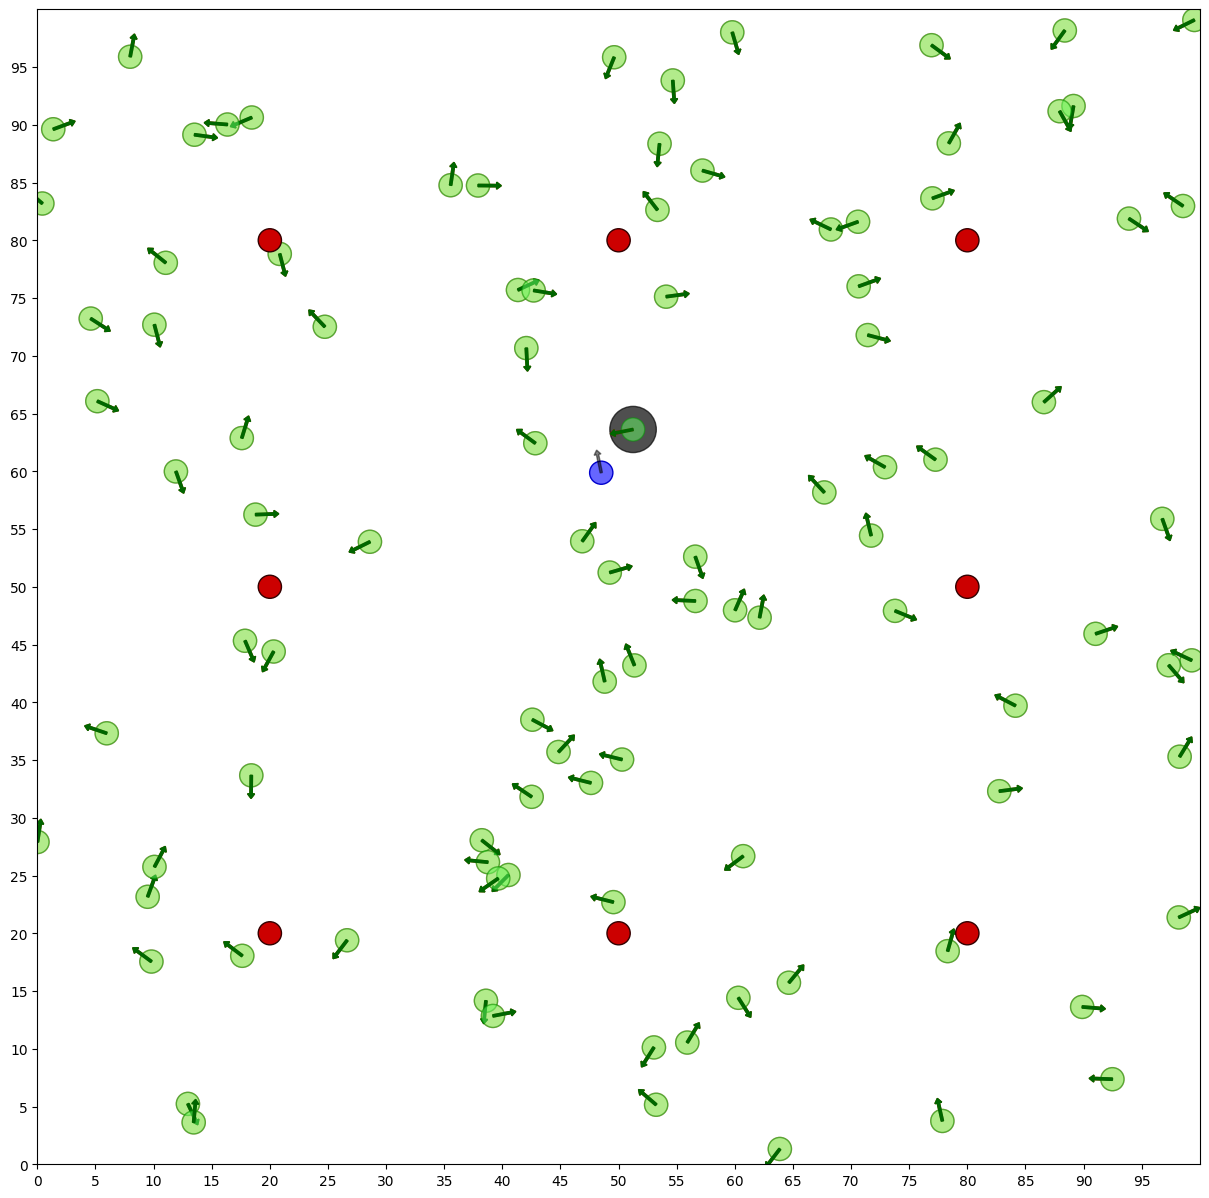

[1.6569716688117146e-33, 4.1532939747533236e-23, 8.96637469082263e-39, 1.976530307271582e-93, 7.836846683202533e-80, 1.800898861289247e-28, 5.689662295067808e-97, 9.510022933303532e-25, 1.0259812869386972e-19, 1.2842034004740513e-57, 1.8004741013730424e-31, 4.807602960023591e-22, 1.6478330339406917e-19, 7.839247118181856e-85, 4.9438271355895285e-12, 2.024155408917051e-80, 7.503855593999355e-16, 3.0542573283060297e-54, 3.115599885526078e-24, 2.765395283130381e-45, 1.899971696052165e-141, 6.874850289531144e-116, 1.539388688880967e-78, 5.054611892505306e-23, 2.7459186387219192e-95, 2.0672028954458553e-28, 1.9849313780346477e-29, 2.624380505014927e-116, 1.5334576120850762e-82, 5.308258945808013e-137, 1.2821090907800812e-89, 1.6807727205580112e-33, 1.3618338952821684e-46, 7.727589075194646e-80, 1.447732607689758e-156, 5.667581052635779e-69, 1.0625575432135095e-13, 2.549884384354547e-58, 8.696657161097535e-22, 8.524402602344297e-41, 3.1634090050666256e-91, 3.927147676979093e-70, 3.5193715036

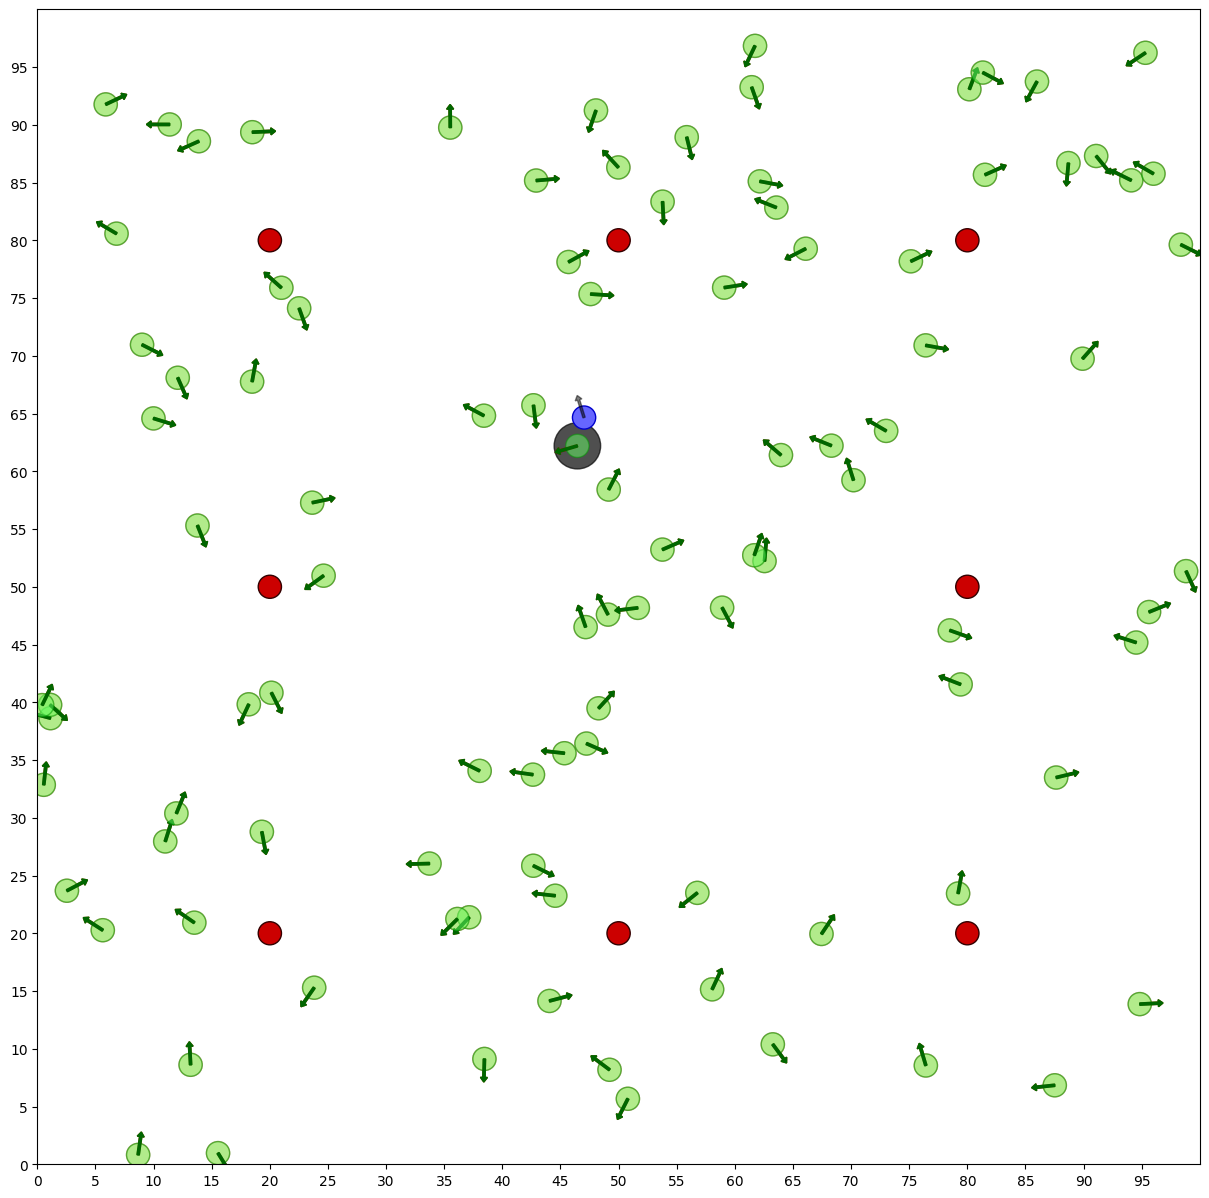

[1.205757792061154e-34, 1.5927721581544819e-24, 1.2405266654432446e-49, 2.0762499815788658e-115, 6.555542177702432e-78, 3.4387102399466477e-28, 2.3622615079609952e-101, 8.703338790938972e-22, 4.815674239678587e-20, 1.3646953850415596e-41, 1.8144406116883765e-27, 5.384977008401436e-15, 1.1932664946964761e-17, 1.0026595029625448e-98, 3.550657472497858e-14, 1.677998627733178e-87, 2.9635827612323887e-15, 5.73175663755452e-40, 4.575101899748369e-22, 3.790214915331481e-47, 1.0907671912562945e-62, 5.15798351916673e-117, 2.2203378915983606e-70, 8.72043230056043e-19, 7.318612010648423e-89, 1.3473471102847972e-21, 1.5261042705813602e-32, 6.824613355047687e-94, 3.212385647895604e-98, 2.2332144397355605e-158, 6.799410848488116e-78, 1.2982158824520087e-23, 2.45338577699524e-38, 4.731598535328306e-74, 4.122593108334309e-146, 2.805732940712015e-75, 6.852711184807094e-13, 5.97744876702458e-75, 1.1930583217647126e-24, 7.221272004911069e-32, 1.3339225952910396e-75, 3.221532150174229e-78, 4.0411425519299

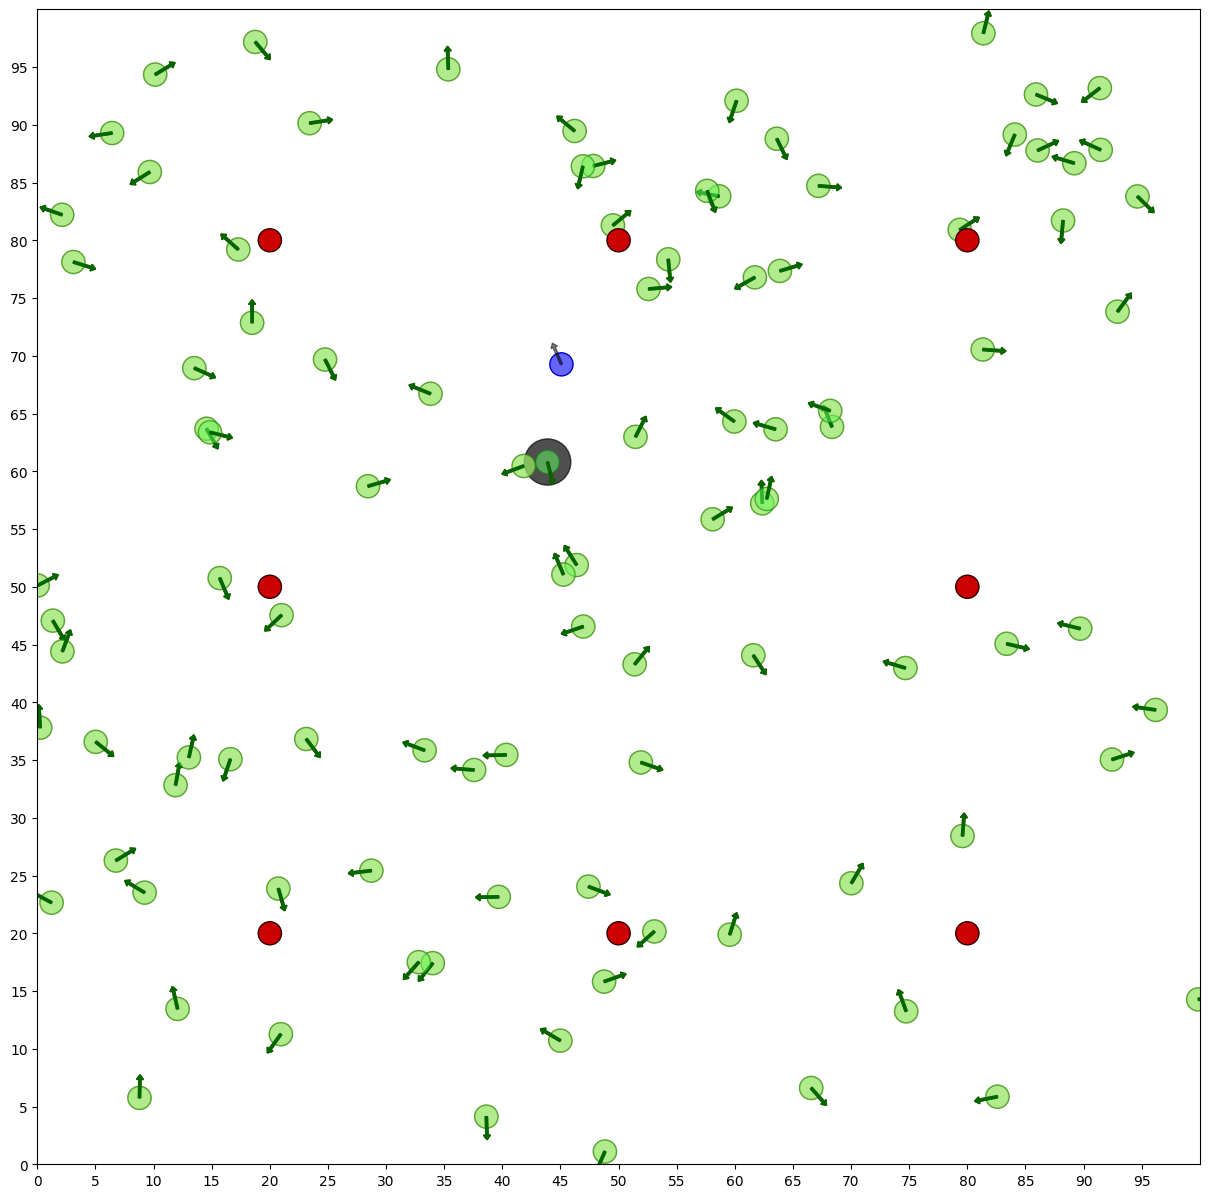

[1.6588998355993352e-37, 1.6311405089716184e-25, 1.00123767990054e-62, 1.9110630205728963e-33, 1.4033425346637178e-79, 8.871382977113013e-28, 4.7000284170042134e-105, 1.6061149989254342e-20, 7.6968579161796e-21, 9.42164240262373e-29, 5.983892993153278e-25, 3.2528718296351974e-14, 2.0310233797603955e-16, 1.3262599820707402e-98, 8.050850933225172e-17, 1.5251737874598282e-92, 1.8074590519930549e-16, 4.260640180245904e-29, 3.953893221276721e-21, 1.4187501863497914e-51, 1.9932584556062103e-40, 1.6915938266161336e-118, 9.196965316176952e-69, 1.2644637799994905e-18, 5.356240864673551e-110, 1.2636736264677568e-16, 7.651269688263238e-41, 3.869098513086025e-77, 1.2828054407158775e-112, 2.2769802735240313e-131, 1.921599644813784e-67, 2.1228369293614324e-19, 5.906172689026755e-35, 3.3203781700910777e-60, 2.854556757163929e-136, 7.286191475503148e-94, 1.3286361341322354e-16, 1.8193093321183323e-92, 3.5729043750295085e-27, 6.267363058576876e-30, 1.9220835083166951e-62, 2.409538924078685e-160, 2.8617

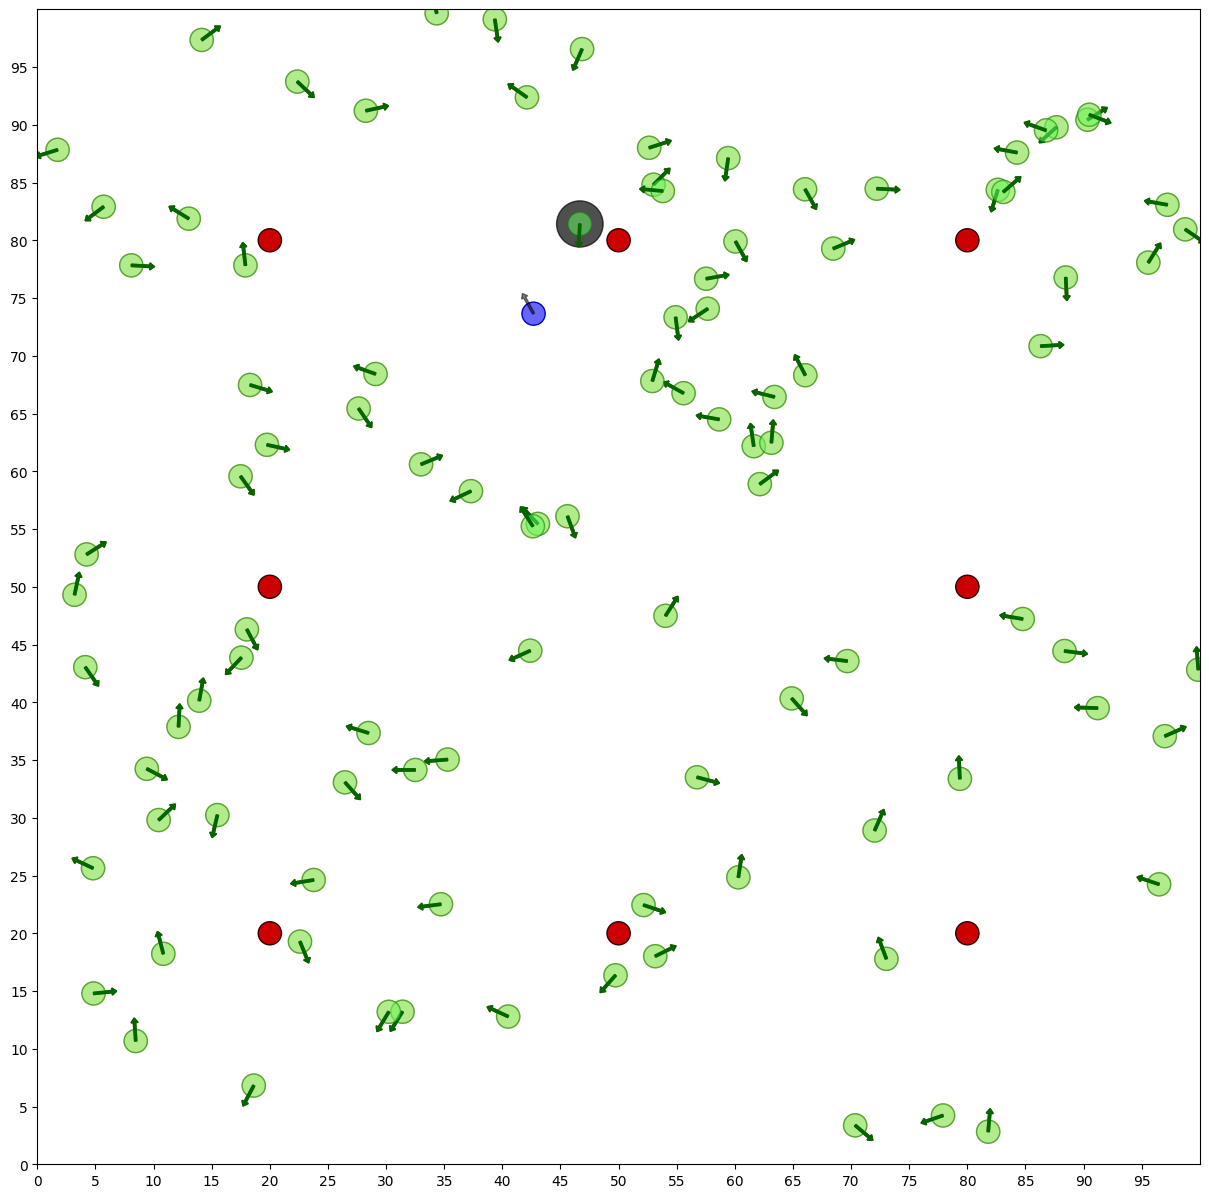

[3.8730258184915515e-130, 2.4888627979376234e-26, 4.132466704434575e-76, 4.667705237430018e-19, 8.218601168539408e-83, 3.0795144191309115e-27, 1.865183687324398e-105, 5.812534326916575e-21, 4.940527969436715e-21, 1.1624867255381893e-19, 7.151890200415693e-24, 9.525777292404876e-21, 4.891874751279641e-16, 1.8009906777313362e-101, 5.783455861544996e-19, 1.0930482068541371e-95, 2.3358138468776308e-20, 6.231036013870266e-22, 1.2147530614845742e-20, 1.76763228613001e-57, 1.9467267176917592e-23, 3.485530932373311e-117, 4.2754792489329067e-72, 2.286730567177435e-22, 9.316989685769461e-108, 2.5959173040139296e-13, 8.01804281476198e-53, 1.873677671364914e-66, 3.320894836466476e-80, 2.144916910862373e-122, 1.0389629539060152e-57, 2.0705897716873052e-20, 2.0605868914939924e-36, 1.103962519078171e-47, 1.5833073635180312e-125, 4.4862245828557197e-82, 1.1083452038759493e-24, 1.7997613829429846e-105, 3.7419855503157074e-30, 1.6017413700249309e-35, 4.739412400768533e-150, 2.3009995505083312e-157, 1.25

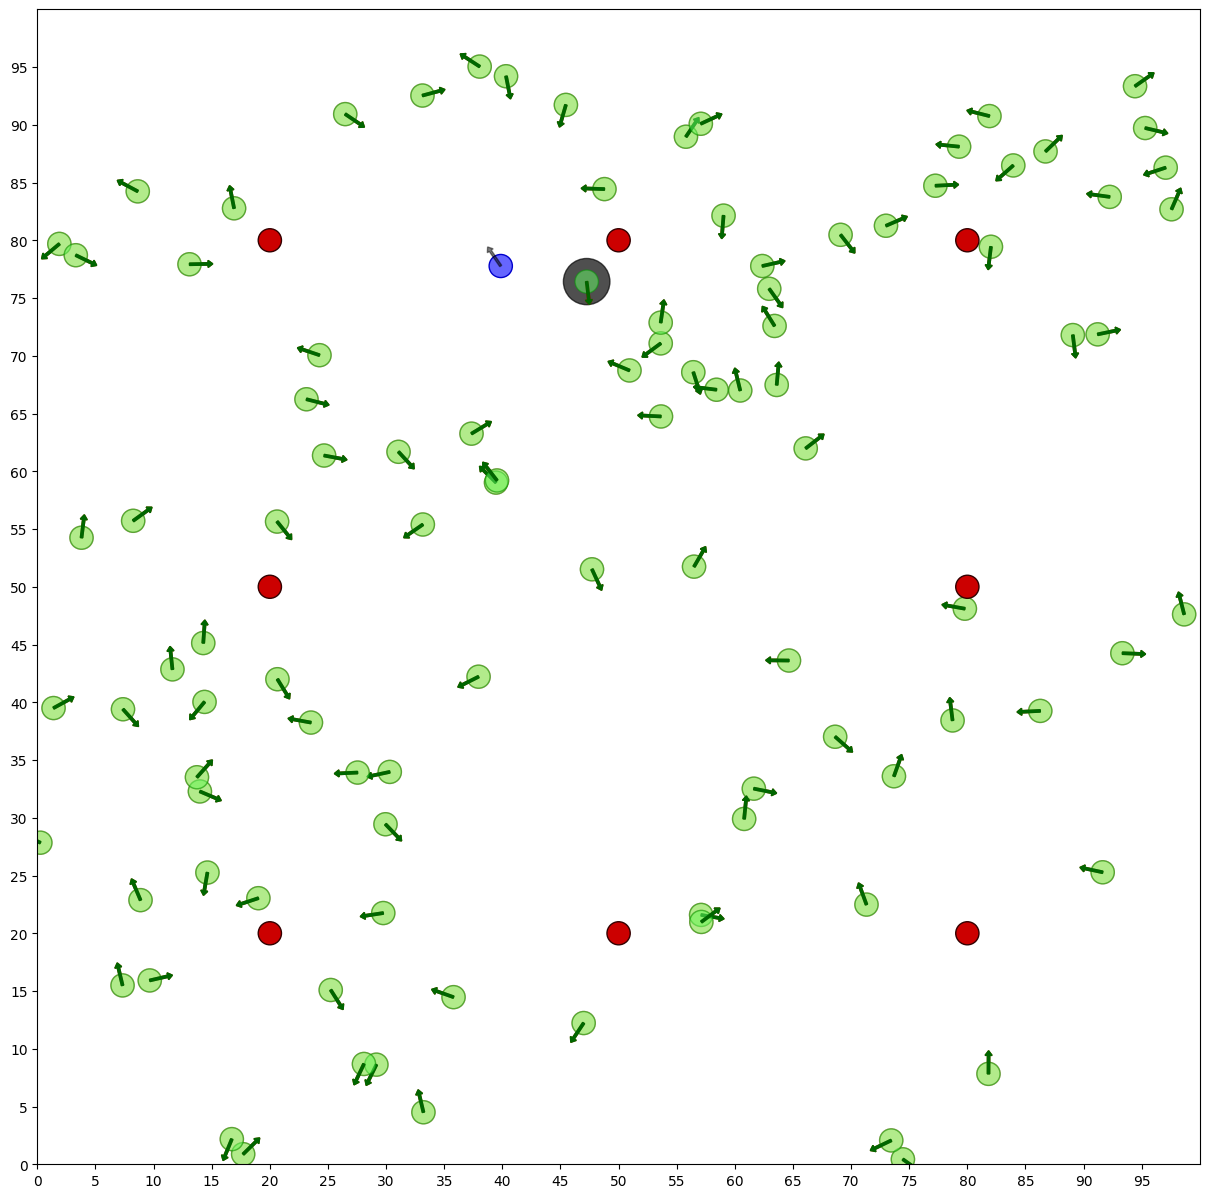

[1.663862565614565e-124, 1.9325591032614943e-27, 2.8192802584989353e-89, 4.08606032228378e-12, 4.580766948599993e-83, 6.340226458553581e-27, 1.1400335596089386e-138, 3.959422198594625e-24, 4.265980267498136e-21, 2.2793313319834224e-15, 3.8206516490766853e-25, 8.305040404597662e-34, 1.0993723694836294e-16, 1.0318719009707e-106, 2.3210914507322492e-20, 2.0772836121610354e-99, 7.027415338928015e-26, 2.8226707106186094e-19, 3.572960989901826e-20, 1.34795361736306e-65, 7.435301503392764e-13, 1.189224639857495e-114, 2.5589387044672433e-80, 2.3279281129836052e-29, 4.771219871101256e-105, 2.1140016952946504e-11, 7.935208496416698e-65, 6.697594026124984e-64, 9.676647645488617e-67, 6.439438158731405e-117, 4.430679333579833e-49, 3.3679866442974585e-26, 6.540156417961327e-42, 5.679596780662608e-37, 7.152917332463913e-113, 1.2800352991673787e-73, 1.96508103401334e-36, 4.7173312640941634e-119, 7.069498515963398e-34, 5.734664053792974e-47, 3.879369965532713e-137, 1.993664777818241e-156, 3.79823475249

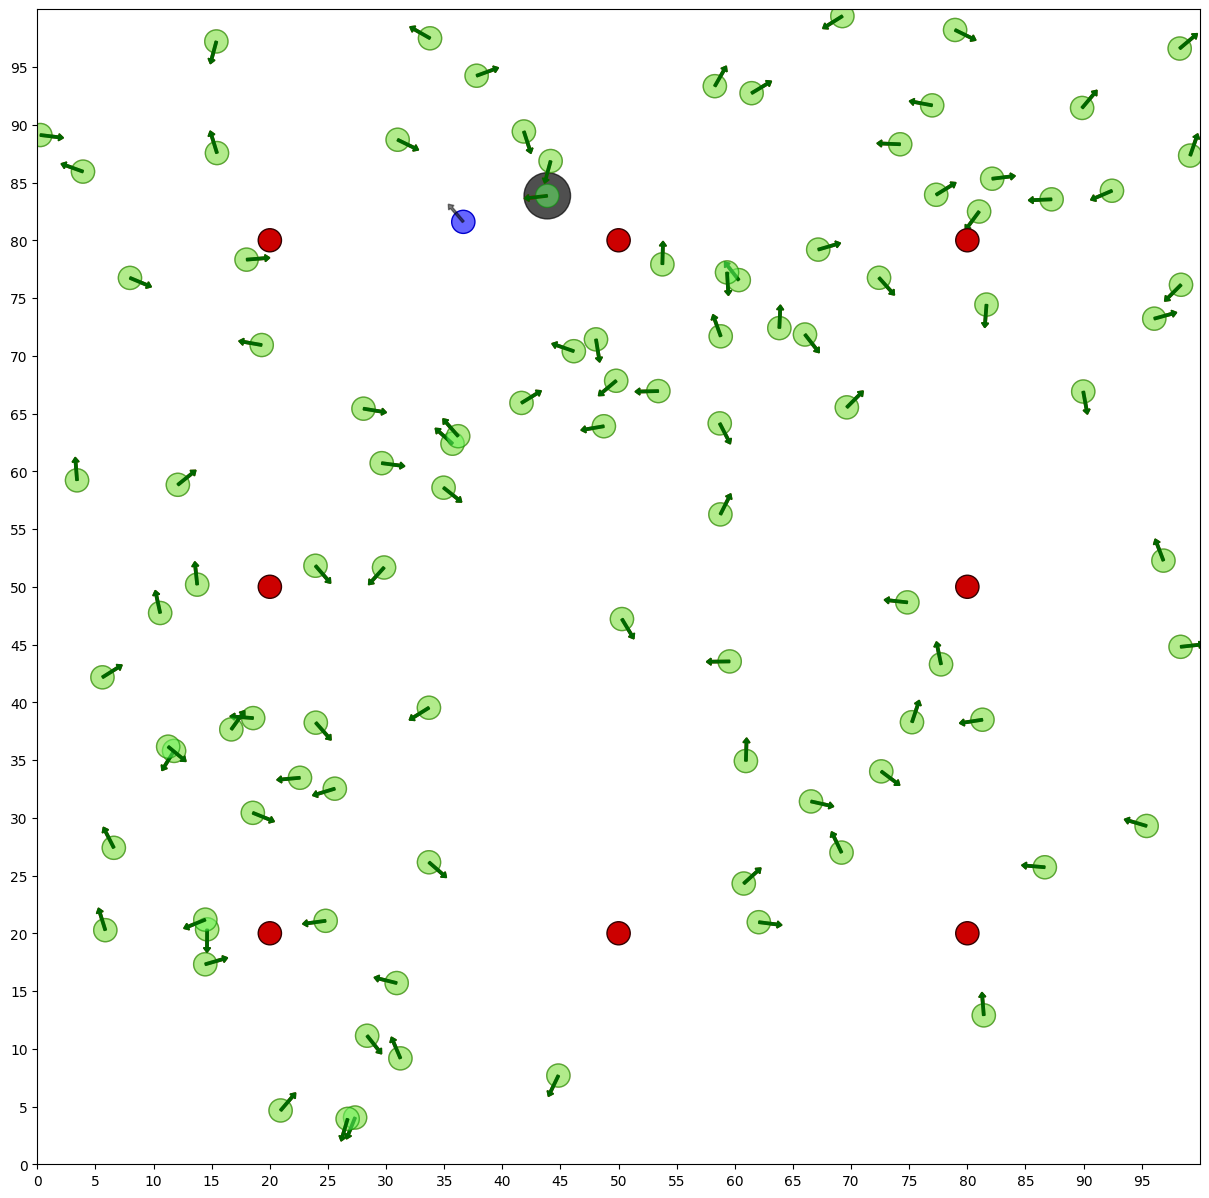

[1.187661157677095e-120, 3.890415491093891e-29, 1.0333972012974317e-36, 1.9637977717398096e-13, 2.911498128786746e-85, 1.7924759901221205e-27, 2.1755269129267464e-140, 1.8521930014204868e-29, 1.9949094232066407e-21, 6.945779030571786e-16, 9.437950884730379e-29, 3.685624265731721e-52, 3.660259354496826e-18, 1.1027506120322695e-113, 3.2100855727889856e-21, 3.3790501081031576e-105, 4.098990902450642e-32, 1.125071232213023e-21, 1.906980785028031e-19, 4.0400744965987715e-77, 9.803718985145095e-10, 5.570041555408143e-113, 1.149977537244571e-92, 6.677248300677133e-38, 1.8498274743238618e-103, 4.16389777584851e-11, 5.708395247641407e-76, 4.1319745482497126e-66, 5.375465335376548e-57, 6.880300450971049e-116, 6.699032454993484e-43, 3.092644905921884e-37, 4.317096513153303e-50, 1.2310672705020486e-28, 2.599706978517349e-100, 2.1444398066512723e-70, 3.9554757042769285e-50, 6.017370732335182e-134, 5.912800340031712e-37, 7.011928339549702e-63, 1.675431688811642e-128, 6.476269329950037e-160, 3.517368

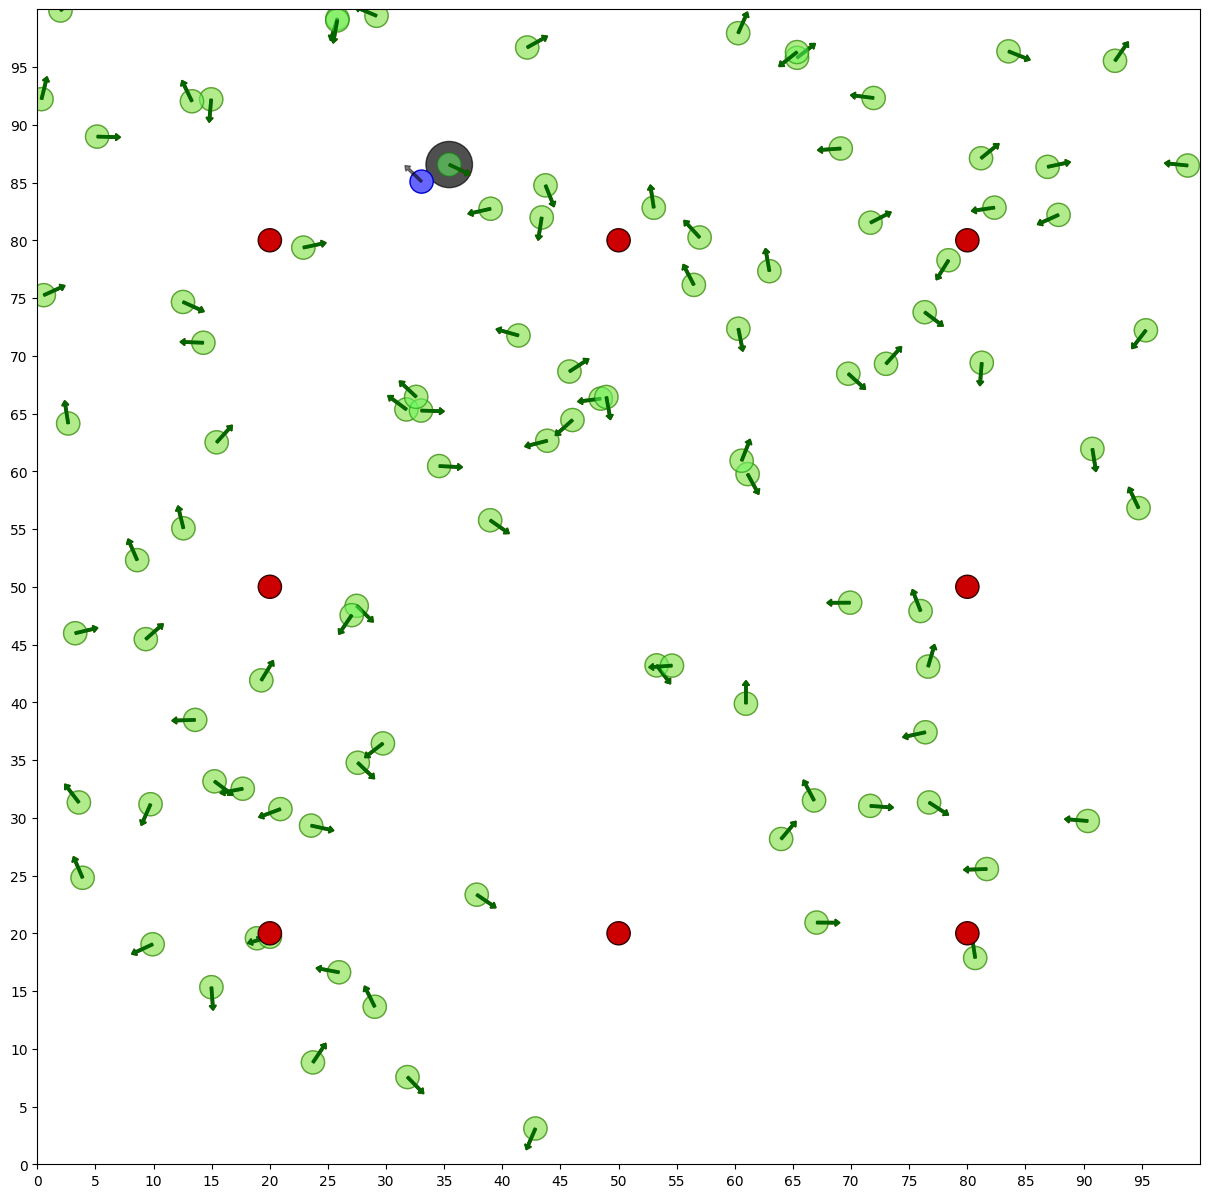

[2.0668293552675542e-118, 2.3244769641773053e-31, 2.0463767104830712e-23, 1.0244489684825515e-22, 5.427608574238632e-90, 2.2022011899681937e-28, 8.738865590151536e-147, 1.4930120533764099e-36, 4.249391086275109e-22, 1.084274856764566e-19, 2.667604645144294e-34, 7.962510290387079e-75, 2.4700389437116645e-20, 3.8935090403090425e-122, 6.035161552702837e-22, 1.969091724080939e-111, 7.466791744949828e-158, 2.886744997582625e-29, 2.985955498921657e-141, 2.0185632134209608e-91, 2.3789733410680195e-14, 1.254643622384007e-112, 2.462701882304541e-108, 7.832434734910054e-47, 3.3134465434207334e-103, 1.0179425339419511e-12, 3.037879932852e-87, 1.2315328958817753e-71, 3.184183314111311e-51, 9.72970837739782e-112, 1.924867378608224e-40, 1.2301245808164682e-53, 8.931647785335063e-63, 6.77157612670612e-23, 2.1244813571551562e-88, 6.449850694730804e-70, 6.499780408485722e-64, 3.7795273185386737e-150, 2.5796690346836695e-39, 4.029415747590874e-80, 1.8235779332047029e-124, 2.6877222803300583e-160, 1.5591

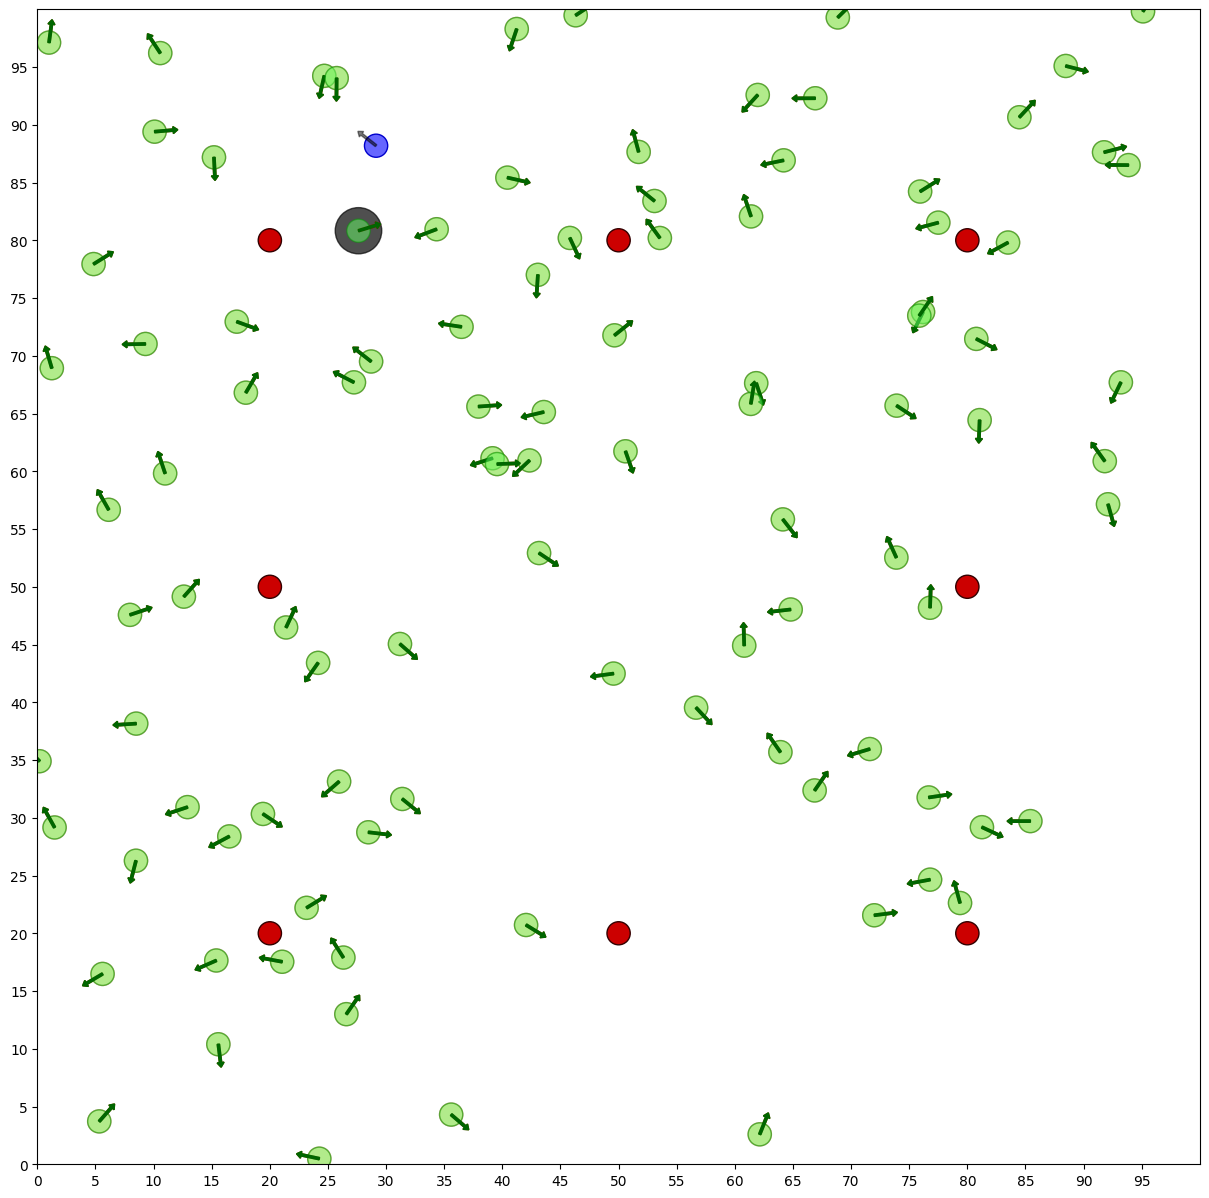

[4.643632758718175e-116, 1.6926108738021212e-32, 1.9519920411731234e-15, 1.1007542538855967e-37, 8.196527447525537e-97, 1.7830292725475177e-28, 1.7416931644216479e-155, 5.252393540735349e-45, 6.329872954812466e-23, 2.4918459818306454e-151, 9.868330423985391e-42, 3.512718098932868e-100, 1.225399520681449e-23, 1.3693364892491084e-131, 5.1646806406206725e-23, 3.182433231305202e-114, 3.972463731233212e-160, 1.2495199392115813e-41, 2.2810574403796193e-137, 5.1775484889946105e-108, 2.3708033046615e-25, 3.348365153098888e-113, 2.150592945861508e-124, 1.0215691738973288e-171, 2.4419244808073028e-104, 2.177172792608137e-16, 1.831522908842138e-97, 4.077830930005804e-83, 1.3899786341908344e-48, 2.915014640103673e-109, 4.549353593577327e-42, 1.078526818787386e-73, 1.1572929228957564e-78, 5.2077716429000337e-20, 2.505700508587076e-153, 4.5024371734150324e-70, 5.879134081104252e-74, 7.181463191424713e-167, 2.8577267853272822e-40, 2.623206122766243e-96, 4.5549806124780084e-123, 2.238042673497765e-157

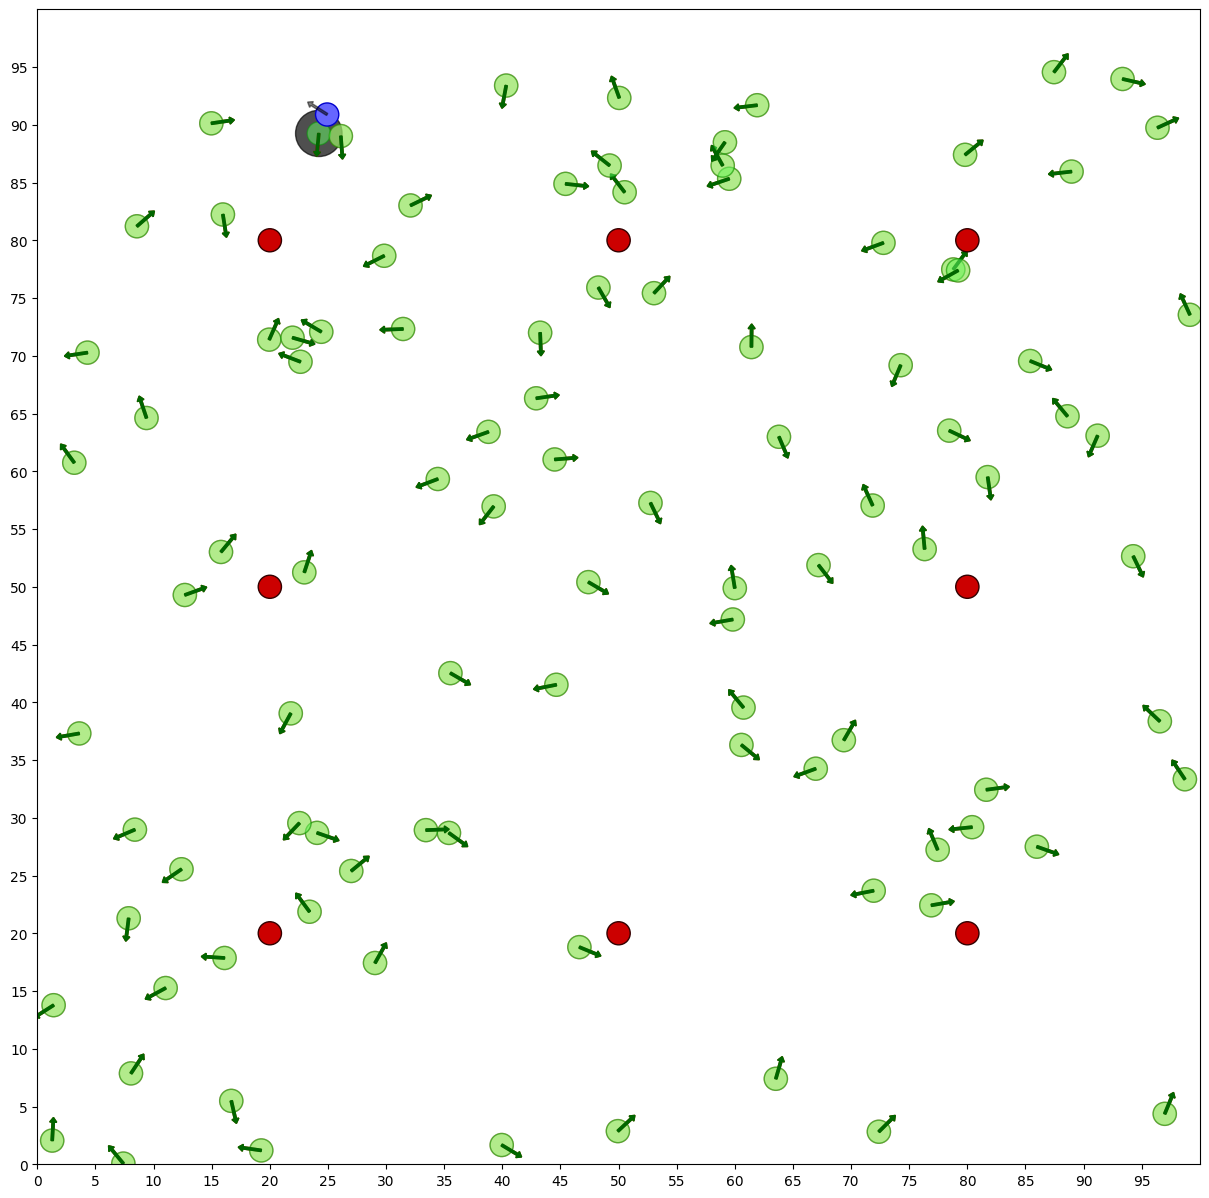

[2.0774127491624234e-109, 8.009214570535412e-32, 1.4397326608540764e-11, 4.8676887776816705e-57, 4.8821724448163956e-105, 8.366498507194623e-28, 1.949214567647666e-164, 1.799860353624812e-55, 5.082344434247763e-23, 9.936778213621932e-157, 2.404448096115023e-51, 4.668469371319509e-126, 2.6857826929384784e-28, 1.364137743509641e-142, 8.647628206957494e-115, 2.2770942450982657e-115, 2.832979483432563e-165, 3.238334380099858e-56, 1.8878121963876952e-132, 4.325178407888333e-126, 1.6408123010729065e-40, 2.400807127997138e-114, 1.7685500373515515e-138, 8.622729438735197e-177, 4.591398562002445e-107, 1.8196736119267752e-22, 2.0946546436532093e-21, 1.0764216255277003e-100, 3.76626475985233e-47, 7.243450970643492e-110, 1.0679153382760539e-48, 3.292090433306297e-96, 2.9536022190926063e-97, 7.885557366695596e-20, 4.699866091581099e-153, 4.7863497294667384e-74, 3.0135731154936227e-80, 1.3379758102999173e-177, 4.235762099805965e-40, 2.4651450439797424e-110, 7.500520517173083e-123, 1.8972254363991052

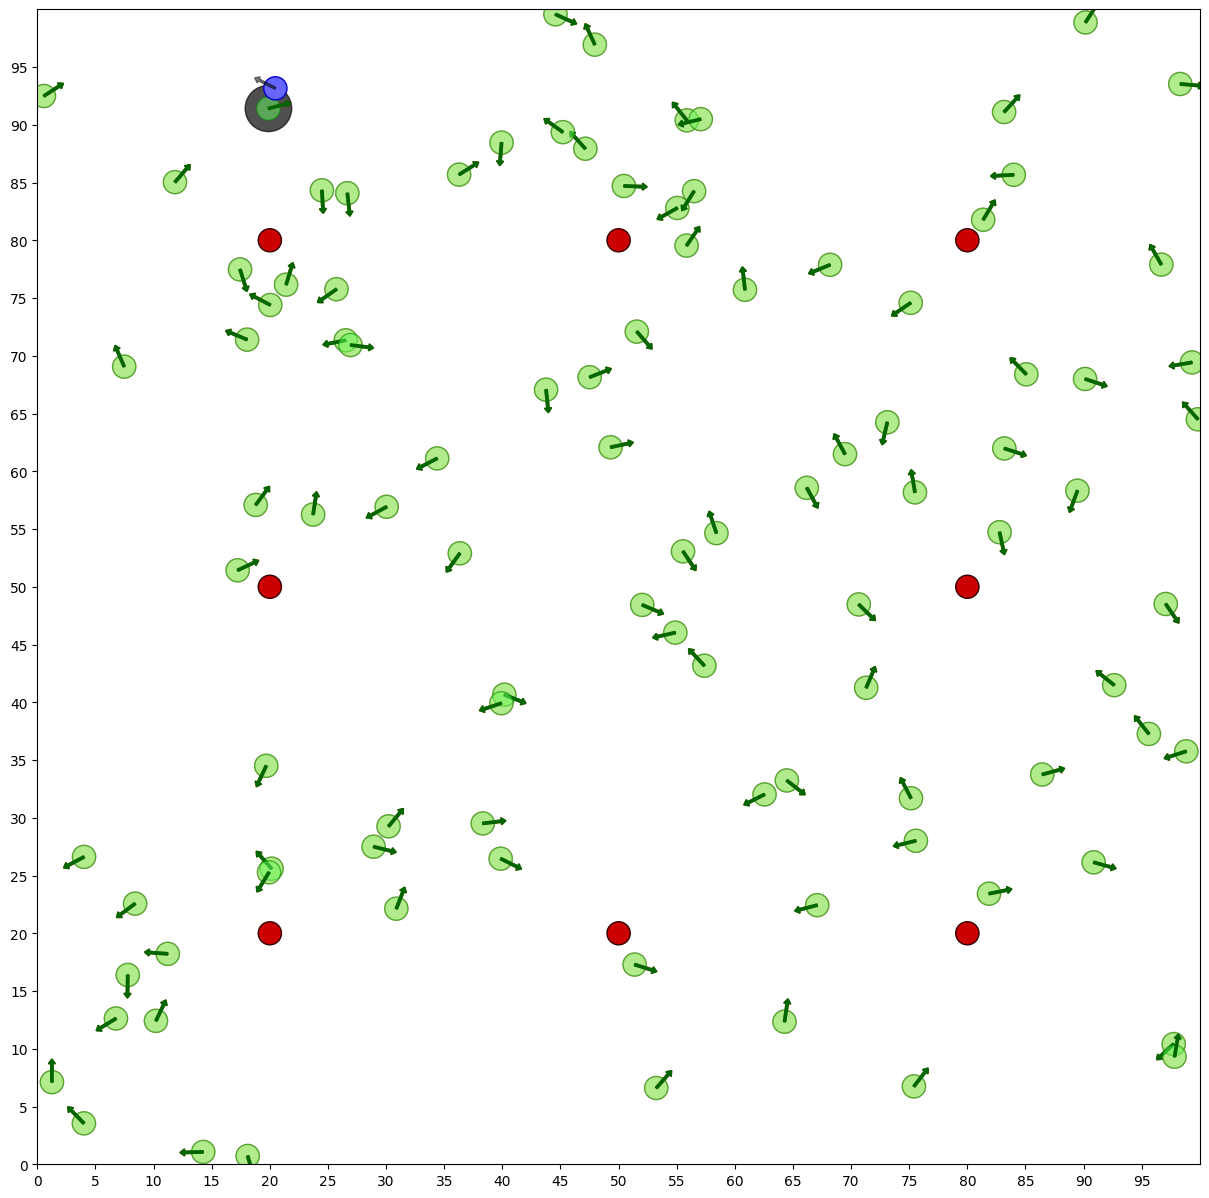

[5.875744807794908e-101, 6.446267600511527e-31, 1.100821458367192e-10, 3.462607149633479e-80, 3.394154143059648e-115, 3.441680383317746e-27, 1.3524753370366077e-172, 1.1652395722311362e-66, 1.1212684537517754e-22, 1.0264919765271319e-165, 3.472279468916012e-63, 4.459525858108461e-151, 5.421300397925904e-34, 8.402268078396523e-155, 1.1928885404307917e-120, 9.209006734989885e-118, 6.68297358787288e-173, 2.2228523541567135e-72, 3.8005049522258623e-13, 1.5837358871847946e-146, 2.5897138811194493e-56, 2.891840782351793e-116, 9.260969395384221e-54, 8.29828863770006e-185, 6.48026549762593e-112, 1.650298272859475e-30, 4.175858942783446e-14, 1.4342490594951926e-122, 3.2814188475714597e-47, 3.656620287109133e-114, 2.4131194676142742e-60, 1.5113812153233097e-120, 2.075007656514264e-118, 2.6481610997711625e-21, 3.317829514180631e-157, 4.405539173377422e-83, 1.0941803313544519e-84, 1.3805731945145947e-180, 2.5116294459865805e-39, 1.5748516709698616e-121, 1.1169197735519488e-123, 1.9630864295393406e

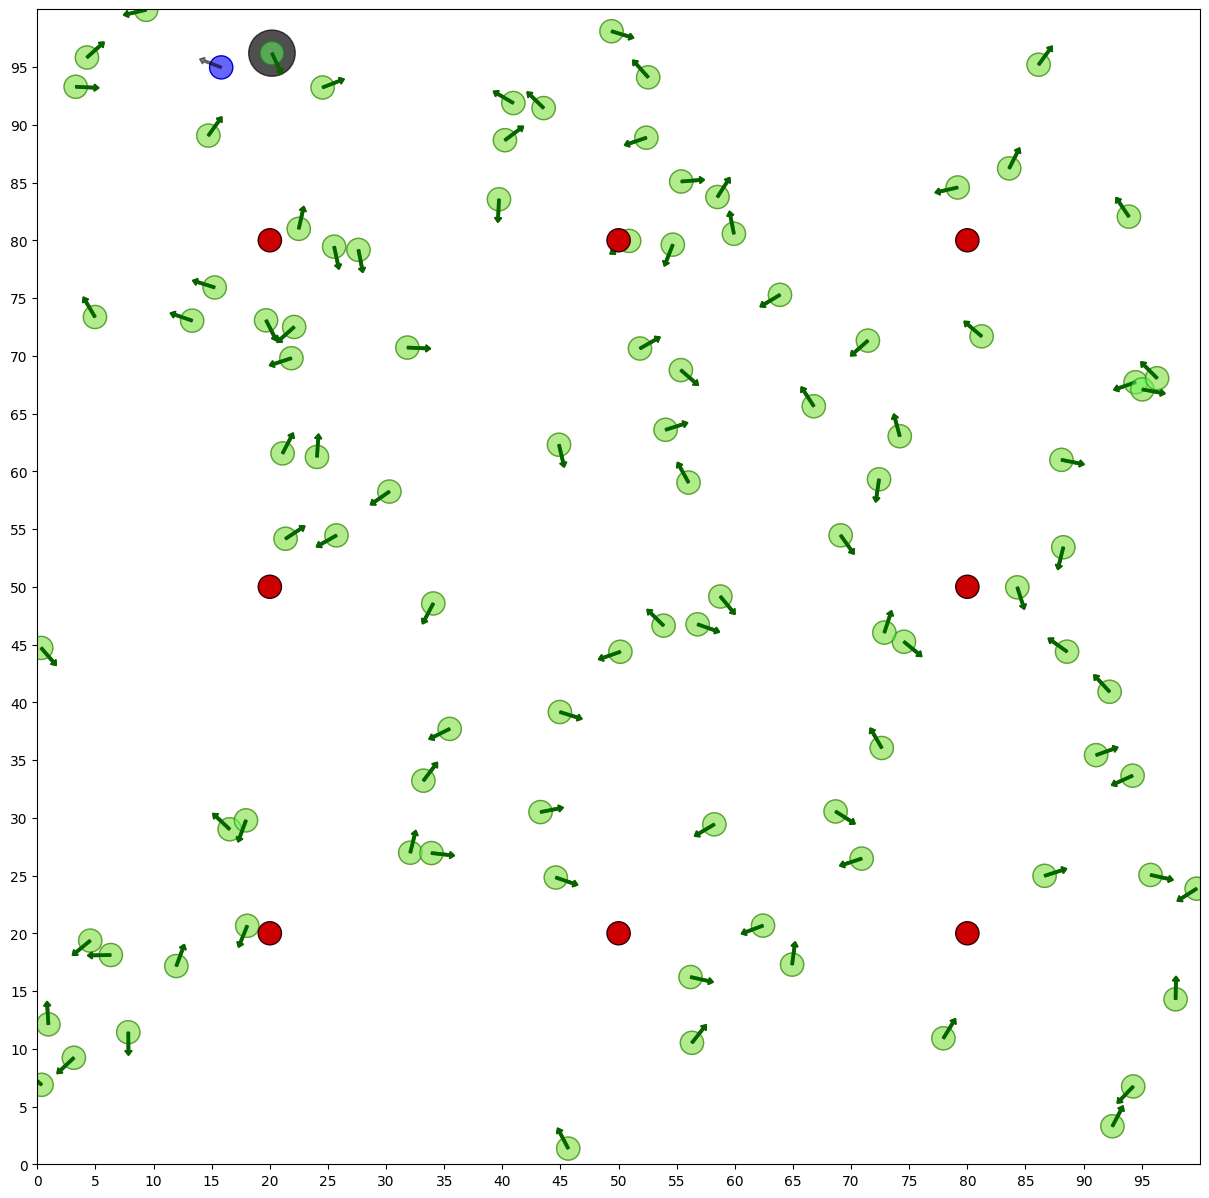

[4.7122044638338006e-93, 2.753325041315992e-30, 8.852670588531098e-12, 3.55863956157857e-106, 1.1605150622729276e-126, 5.720832939025936e-27, 5.266515847458015e-181, 1.733244135999243e-80, 7.028815986266527e-22, 1.9212141772816338e-177, 8.175903629107211e-76, 1.7566180458653572e-171, 1.6525436340011318e-39, 4.100240817055869e-168, 8.332993194054209e-134, 4.88923601737434e-122, 6.466365637566774e-181, 6.660385346950434e-90, 2.2647187067262533e-11, 3.0418880790902506e-168, 1.4582806408703807e-72, 5.873642023748108e-119, 8.383357926235726e-64, 1.6212883968972449e-196, 3.842809669278921e-118, 2.953955863006574e-40, 3.819987447599706e-11, 1.505695437612827e-147, 2.293278446428215e-49, 3.847479618762624e-122, 7.34246188607049e-71, 2.805369742246589e-145, 7.159712062006728e-141, 1.1675931562969076e-22, 1.4992475402715518e-166, 1.955592746390774e-96, 7.223324568793442e-88, 2.7983440785125543e-182, 2.4669501238490564e-38, 1.0951919805887494e-130, 8.422947595028798e-126, 1.448606689797622e-165, 

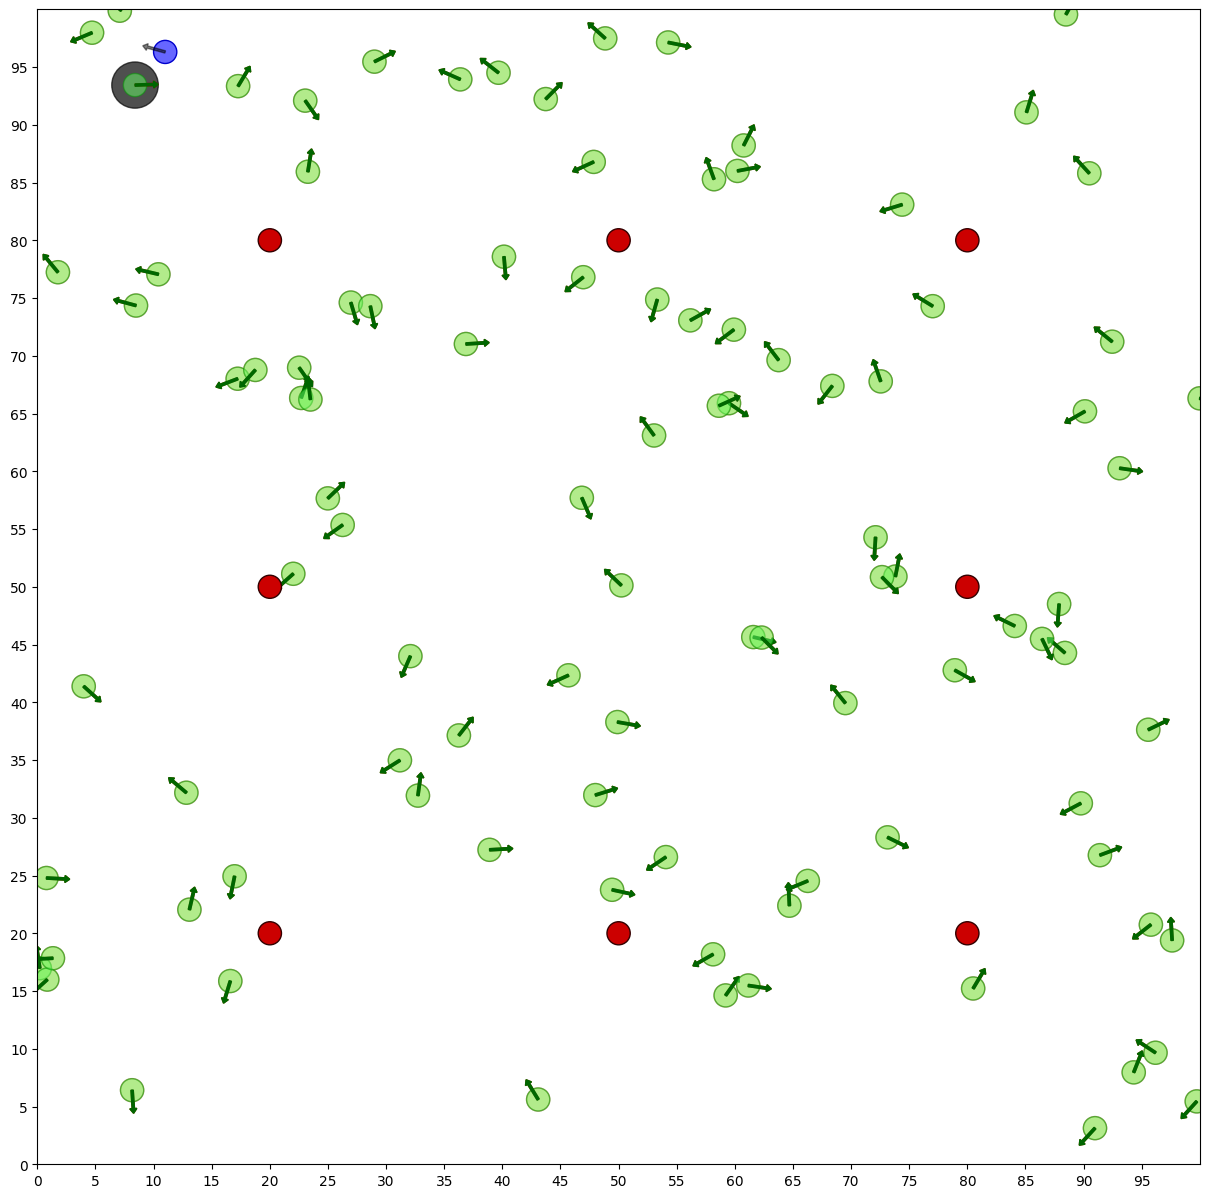

[2.2963857399285564e-85, 6.293263978622612e-30, 6.70331892250126e-14, 9.171684630860304e-134, 2.0894441701258485e-139, 3.951910410557795e-27, 1.1562881448443666e-190, 2.115800335030305e-90, 9.82055723693232e-21, 1.173094449301507e-190, 8.701267235411443e-89, 4.213114170678532e-186, 6.45774999403419e-45, 3.9770876554798195e-182, 7.71458887521168e-153, 1.145724242549202e-127, 3.4127237606911252e-189, 9.342433789786729e-107, 2.971807640876713e-10, 1.141545223202415e-185, 1.6742972821802873e-89, 4.4271887025468214e-123, 5.0521592828754443e-79, 3.485554075185098e-208, 3.545059677638789e-123, 9.037293552873972e-52, 6.301220311624142e-114, 3.585010590247481e-173, 1.7165485748566308e-54, 4.38248695110108e-132, 8.86799426790175e-84, 2.4670733285814014e-170, 1.1670931988993058e-163, 1.2818406535944224e-24, 2.3009943087019966e-181, 4.8545263103461383e-113, 2.5461945597879584e-190, 1.3391374899457604e-183, 5.2078279813069553e-157, 9.531458789919061e-33, 1.1094971127138552e-129, 9.362913129657327e-

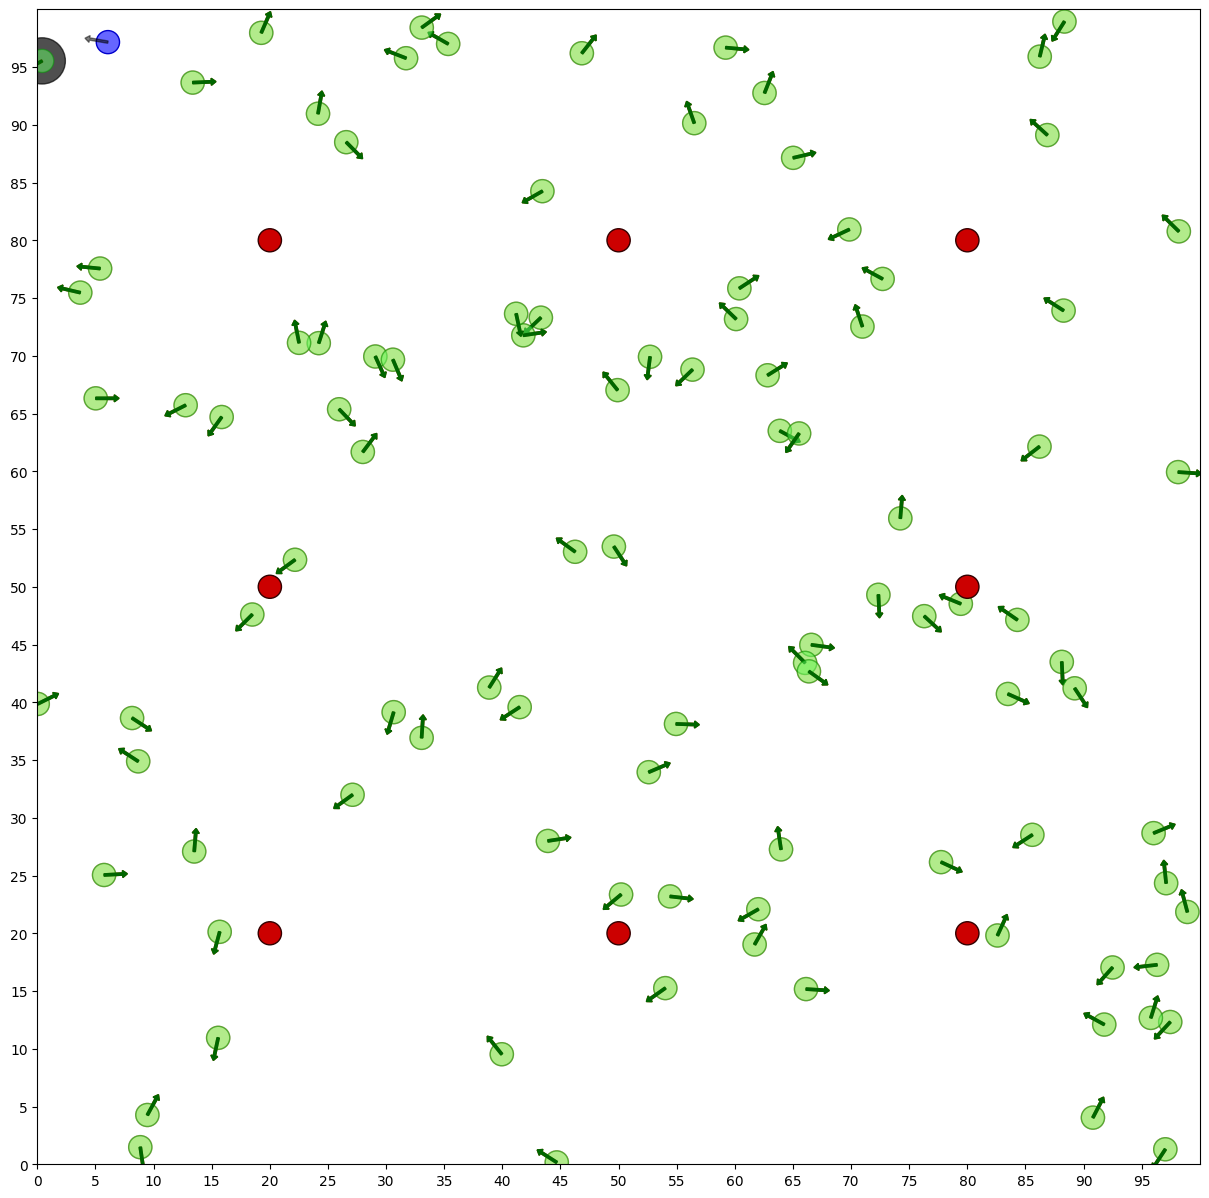

[1.92088430105174e-77, 6.940126771285836e-30, 1.3671280845765506e-129, 2.1644937652047607e-162, 2.958785570425982e-151, 1.1457345248373858e-27, 1.8927788410477727e-200, 5.429469218683111e-96, 7.049177946131389e-135, 1.4380711691881805e-204, 7.609122196484252e-101, 7.221248910999081e-196, 1.0931438750050006e-49, 2.1437265023720468e-190, 7.30365006800849e-177, 8.515126601112988e-133, 1.3939622328949876e-197, 6.291364417792924e-122, 9.414831048433074e-112, 1.816048866280739e-201, 1.6639176459822277e-105, 1.2627162181923e-127, 4.735236770341382e-99, 6.7782849548325e-213, 3.8966474933884714e-128, 1.1679217556463187e-63, 2.729209922447545e-115, 6.232935102768014e-197, 1.5450421708036317e-60, 7.499213419497681e-144, 1.757661971417854e-100, 9.57862613017792e-195, 1.998880181991256e-186, 4.400212788582818e-26, 9.721727192718585e-201, 1.1001355117131669e-131, 6.292873725475258e-195, 3.0156670455200286e-77, 1.1262044473907614e-157, 2.205951335082793e-46, 3.8391460682606116e-134, 2.74643630948981e

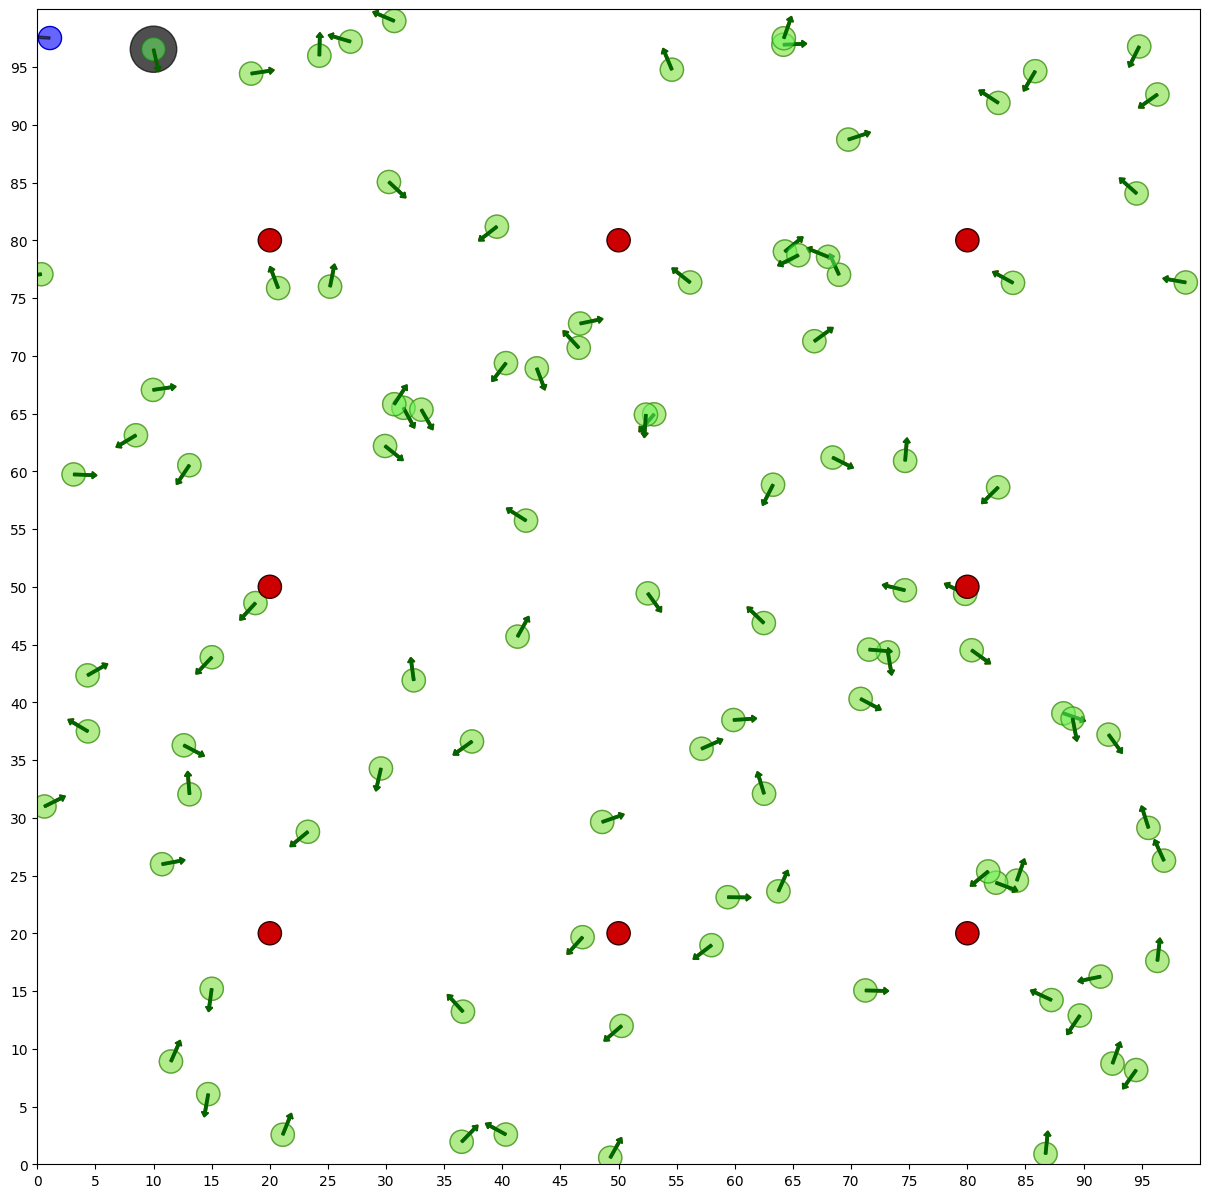

[1.1313542747111388e-64, 4.083657848137016e-185, 1.588823946388828e-195, 2.656280618319984e-85, 1.0395784228979906e-191, 7.500275480039429e-86, 2.8248432711805836e-177, 2.3741976558470376e-188, 3.0566468662379678e-24, 1.1946367249578197e-149, 3.944834273683046e-189, 1.1989169813408504e-79, 3.0885126985101546e-154, 1.1122041551507112e-190, 1.2121136104364852e-85, 1.0081833216984576e-56, 1.49612696200872e-147, 1.1409347810504101e-52, 1.61729573954184e-13, 1.908210465332227e-156, 4.630454527071784e-30, 1.3192374997021902e-149, 1.4255132987399113e-197, 5.222872311969635e-110, 2.680401558161501e-66, 1.2160752664274886e-166, 6.802507634354864e-200, 7.632923037844735e-118, 4.311734687162659e-124, 4.128621584879993e-153, 5.574528356557171e-136, 1.6272344237007573e-107, 5.4790827504984646e-135, 1.7444582068121736e-186, 3.644340551199817e-99, 1.694619719065666e-122, 7.515924640038313e-104, 1.8478850309175248e-184, 1.960612425770337e-183, 3.305526157592636e-149, 4.3348301350773903e-178, 5.6740356

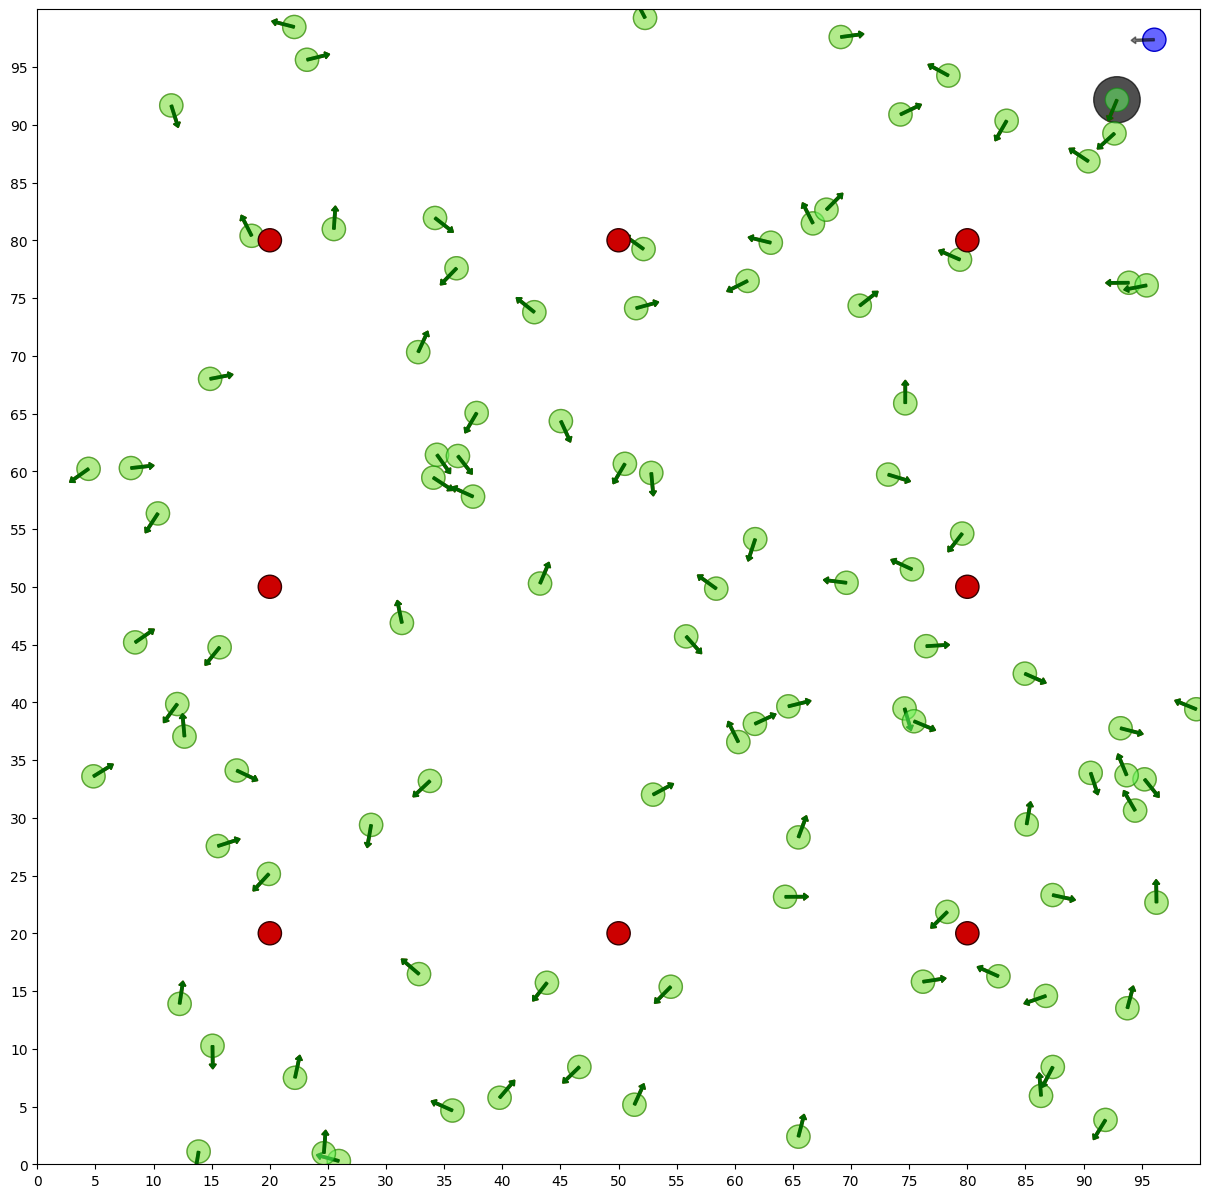

[3.370311877501812e-67, 4.3519345524270083e-185, 4.751557338826914e-195, 2.9221204541298683e-67, 4.8918377253542595e-185, 3.914585133846702e-83, 9.731209244935264e-170, 1.0950788969215044e-177, 4.507333041706196e-25, 2.0521992634640096e-129, 5.863139422843289e-177, 4.4356651079299205e-68, 4.77253562772132e-146, 1.643914464992745e-178, 1.3839131467154012e-87, 9.013416246998125e-42, 2.301018569543775e-129, 3.5707912416610806e-31, 5.988737678102848e-15, 2.3172149128613037e-138, 5.79001478797822e-16, 8.133177989657277e-137, 1.8763180936146686e-187, 5.394079804199343e-95, 1.4219929850836147e-60, 4.471201499847963e-159, 2.3663784316431665e-195, 2.582250875358394e-111, 8.709439273295675e-99, 1.4532830341020173e-125, 4.4281180994030674e-130, 2.6291519006243698e-87, 1.0219259493153683e-111, 1.0247279737531304e-186, 1.624199736583306e-89, 2.4241305190282166e-117, 1.1570973245677852e-98, 2.9387833421472097e-176, 1.4944475254572816e-182, 2.91907701621667e-132, 5.049943177679513e-156, 1.34357998792

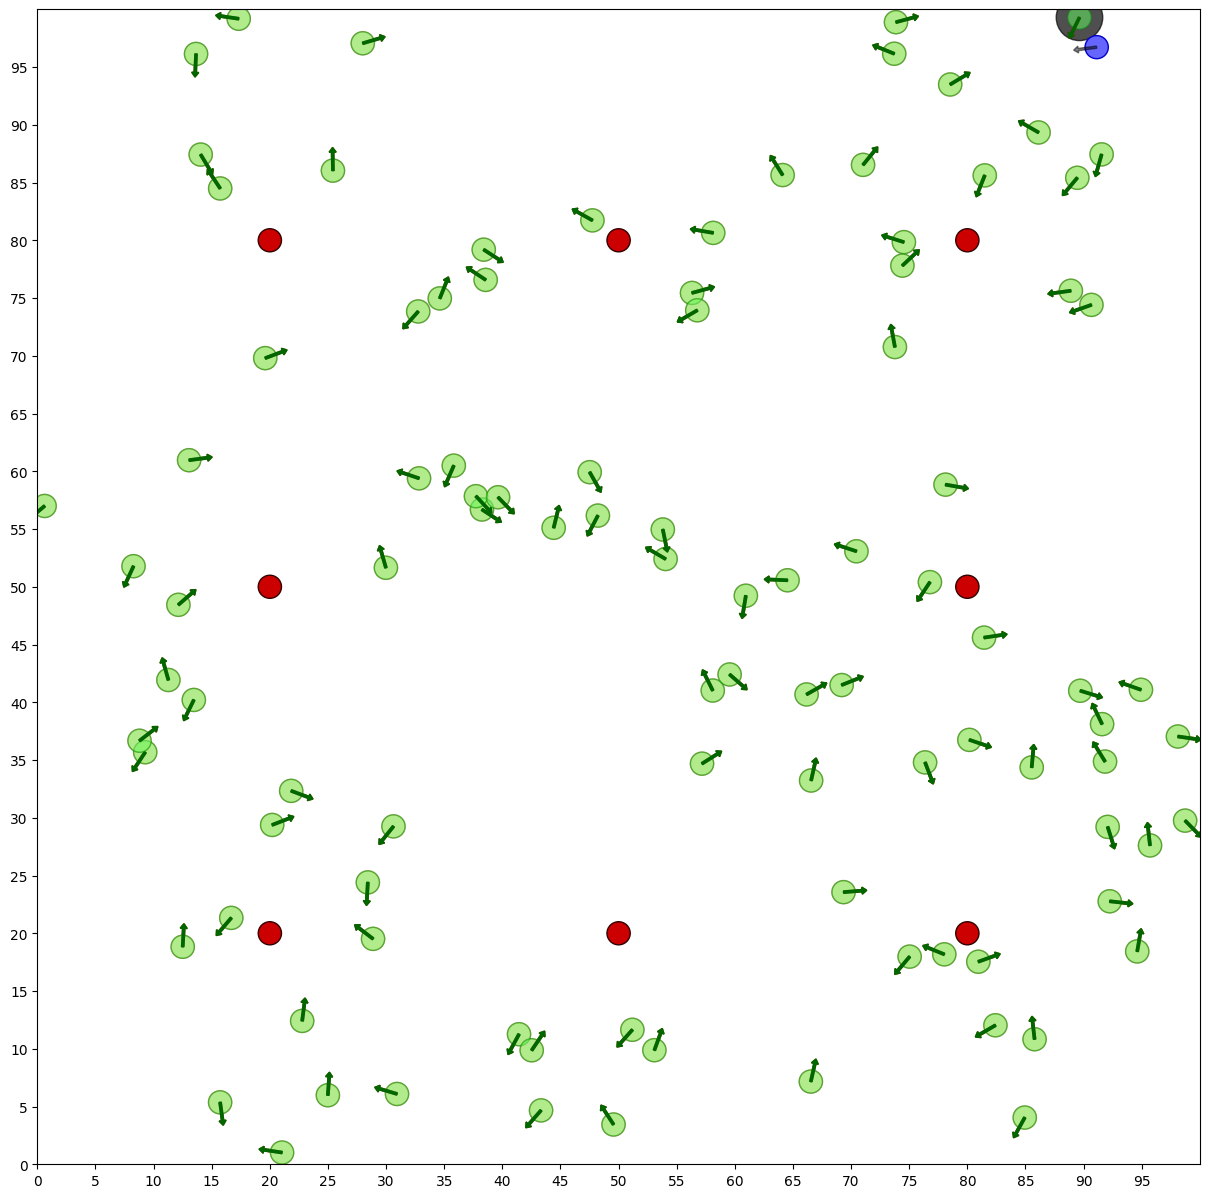

[9.324509344002468e-70, 4.16736189245611e-186, 1.556642007468815e-192, 2.8242828594699474e-51, 1.2139186940895366e-180, 4.2529628842906046e-85, 3.1991739275755956e-163, 2.9696205619406317e-171, 1.8771422245714425e-25, 4.438373677335148e-109, 1.489630732581725e-169, 3.542203757826117e-163, 5.840927208789134e-43, 5.043114374251178e-170, 1.0069514087503753e-86, 3.8848604175251715e-30, 4.1165336515911534e-112, 1.1364265705884955e-16, 1.7602741986422904e-16, 1.9260042980680726e-124, 8.313170658396698e-10, 2.619119093978014e-126, 2.786188468391142e-174, 7.9848593688573435e-81, 4.176408353174854e-57, 2.4597108003727326e-153, 3.975286084396803e-184, 1.4705624283634924e-107, 1.496713601528009e-78, 2.253650185585135e-99, 1.7580324712605e-125, 3.819385654029287e-69, 7.77039294300636e-91, 3.1456157701406166e-185, 1.6364422507228864e-80, 1.899564950702346e-113, 1.277049393802042e-92, 1.6099879467218463e-164, 7.901139608711932e-182, 5.081605248725604e-112, 1.4385859801042088e-134, 7.067641810585143e

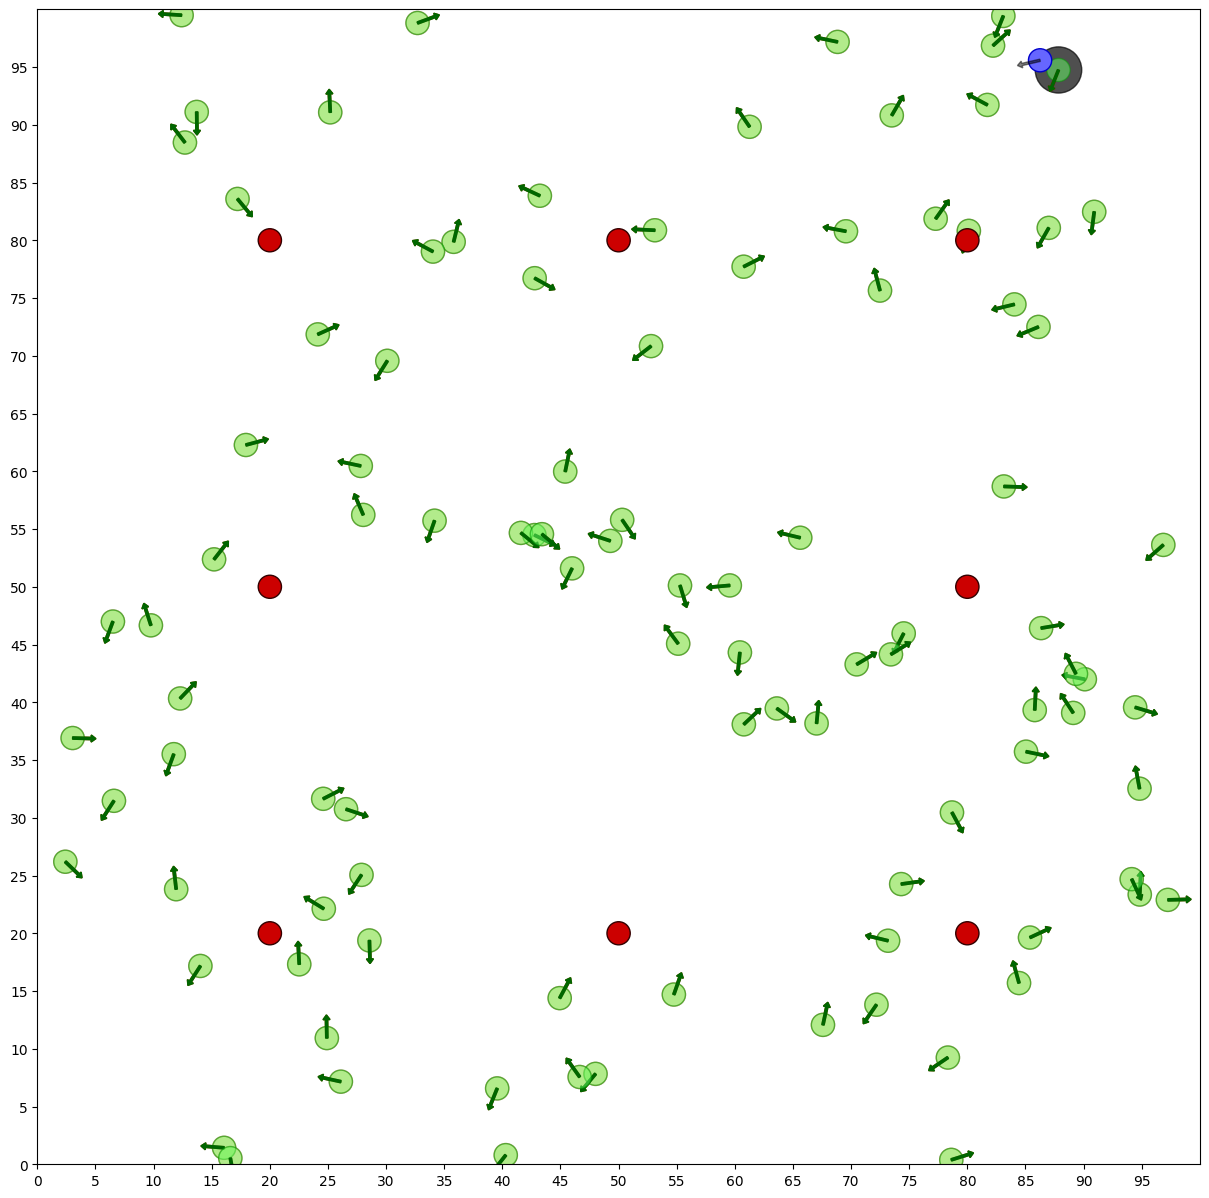

[1.0817907444217479e-71, 2.8355278850663272e-189, 2.911159460022535e-182, 3.081676530762719e-39, 5.8147360929012296e-179, 6.360401155287841e-92, 5.942709619984674e-160, 5.317587191328244e-169, 2.9370120016629468e-25, 1.612266075916217e-89, 2.803425616661505e-166, 1.3723313821156203e-156, 4.848193530905665e-50, 4.747475829467432e-166, 3.614267959369082e-87, 2.7320481310357934e-23, 7.256915520575248e-96, 3.9071712543627334e-10, 4.917732710600843e-18, 2.076077570444982e-112, 5.76003492422574e-131, 1.8315688592943742e-116, 8.212200880980073e-159, 2.331725806564202e-68, 9.366768437070143e-53, 4.779009832716305e-150, 2.3450845209850756e-169, 8.605934946410266e-107, 2.3903901812859527e-66, 1.8570071245450972e-76, 1.018311792884946e-121, 1.4707153144477197e-55, 1.8780147045331958e-73, 1.389737269807225e-181, 1.911432812425526e-71, 5.333432922485674e-110, 3.460228569477036e-85, 3.226244727859049e-150, 2.2936742790915814e-181, 1.519424156999846e-89, 2.674154785538878e-114, 4.4652941697815696e-95

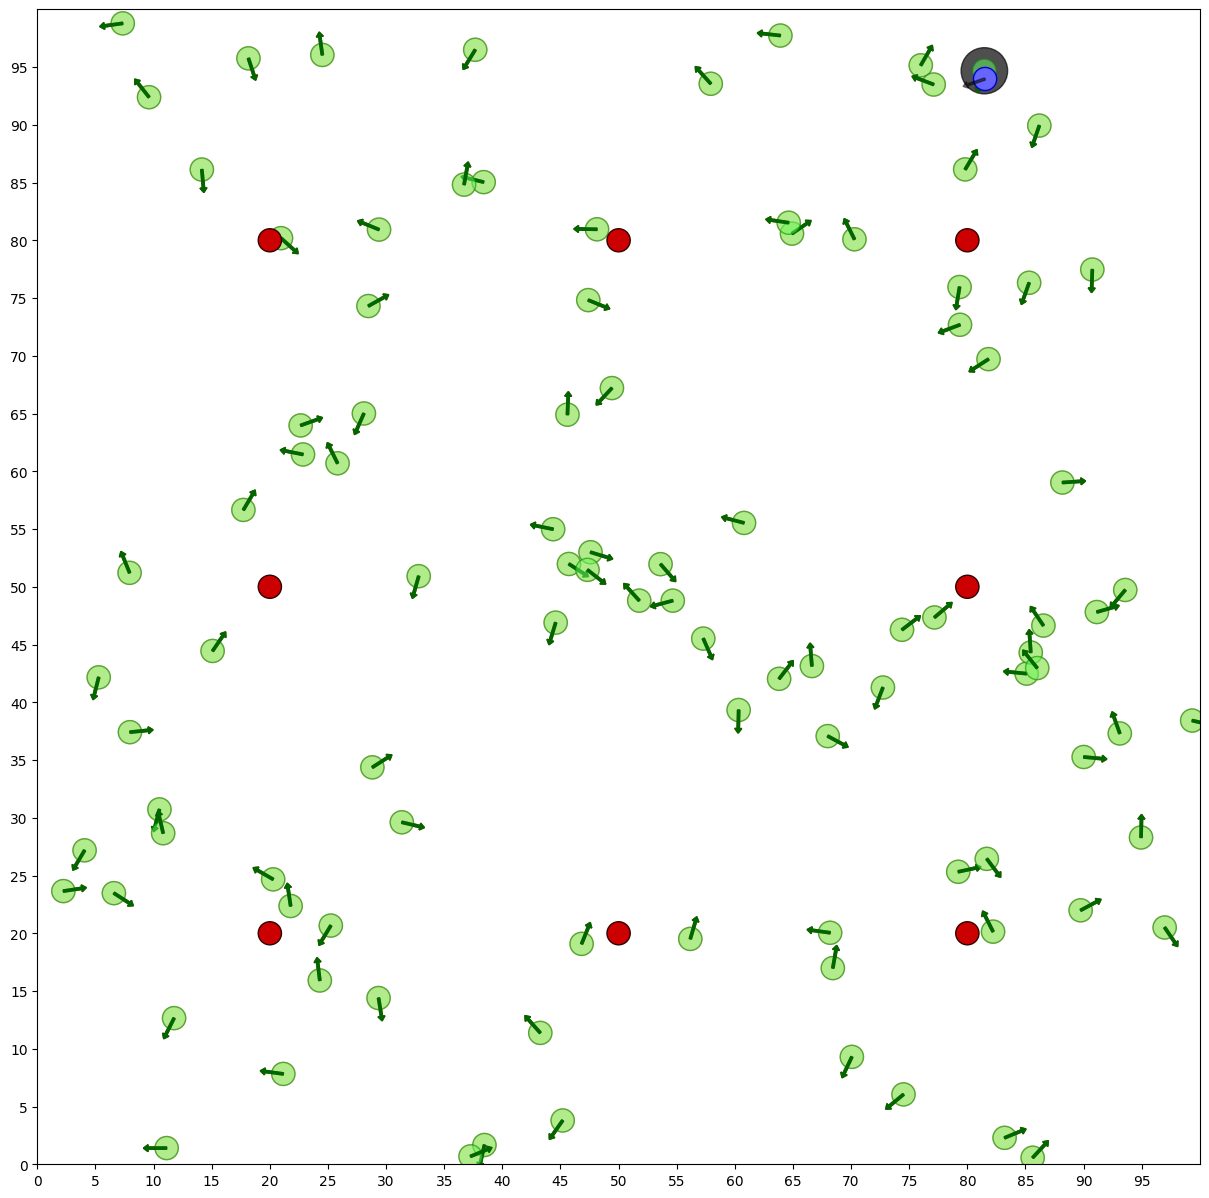

[7.025130688667979e-72, 7.3703621355576225e-196, 7.551165018318114e-163, 2.537360980644445e-33, 3.308353970171694e-175, 4.115321871042939e-102, 6.855435867112943e-34, 7.8919022806402125e-171, 7.984508744575547e-25, 1.4762783395508627e-70, 5.861710636463815e-166, 4.3578416875658e-146, 1.5841885641268247e-57, 6.045324661565698e-41, 1.623072378711052e-89, 8.871392048792043e-21, 1.5808752512753585e-82, 1.5413656988999145e-12, 4.015592635625821e-20, 5.930954922854989e-100, 3.4462789395454867e-129, 4.047752428836544e-108, 2.660045004062356e-143, 7.496480467197683e-57, 9.797131895745981e-48, 3.946649225514676e-149, 3.429405382464508e-154, 9.898976188992144e-108, 2.5907793845959594e-178, 7.948525473523035e-57, 2.701440413217537e-118, 2.973061222763934e-48, 1.0609383583150259e-58, 1.7735795489078685e-173, 1.308072830249175e-63, 8.083660639995545e-108, 4.373337670177861e-77, 1.5957748607375027e-134, 7.92495001597137e-181, 2.2490160590916334e-67, 1.657082019709003e-97, 1.955315033663533e-88, 9.44

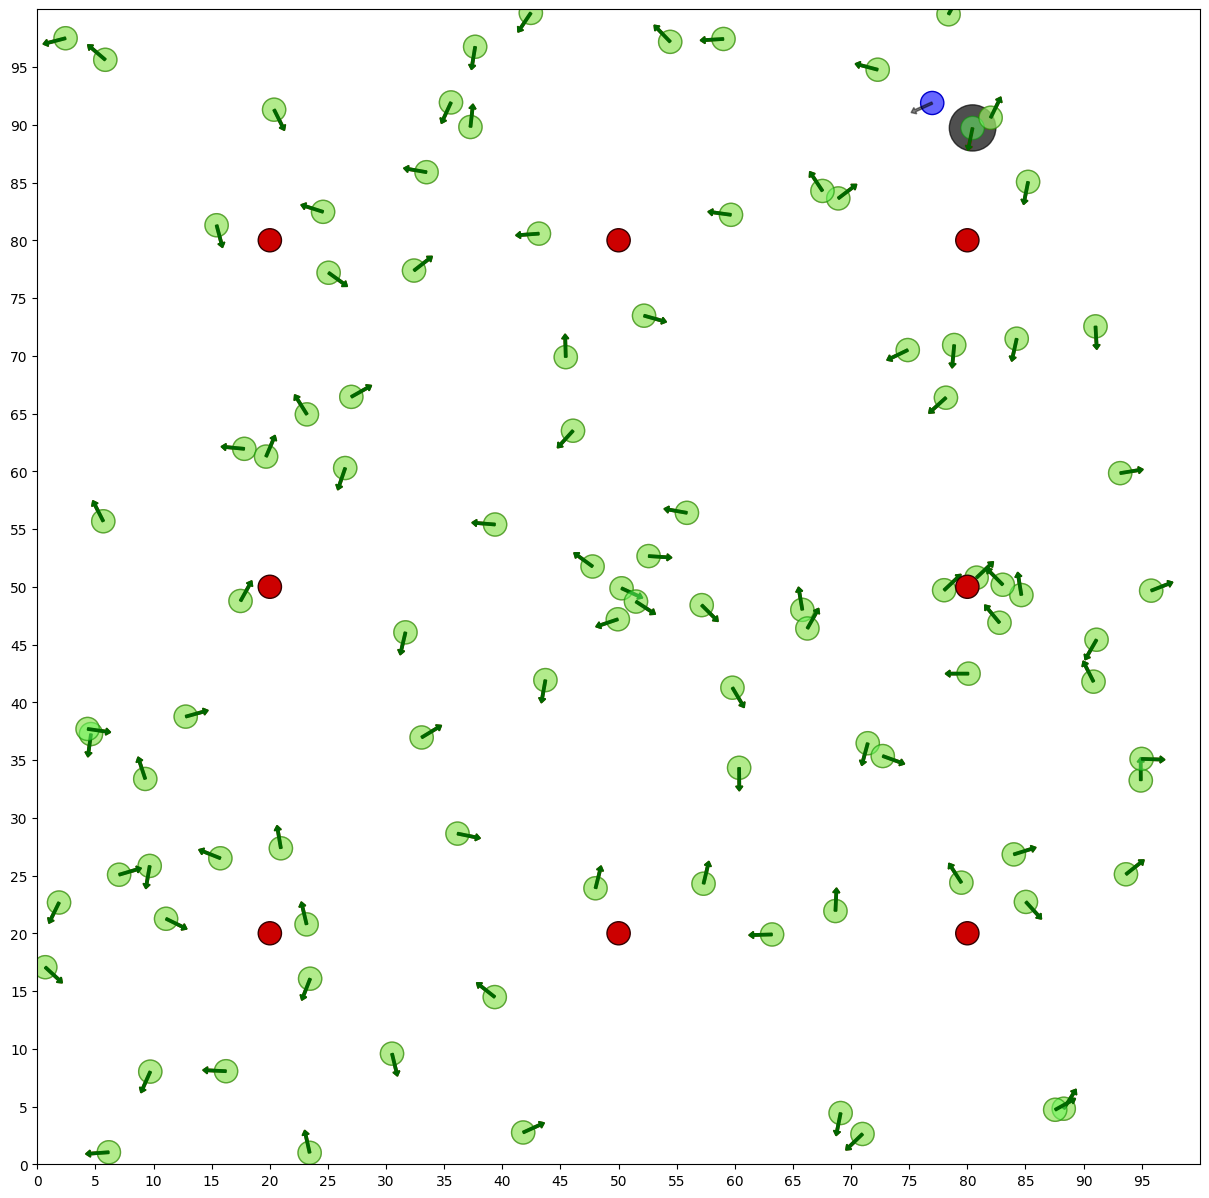

In [18]:
# Particle filter without resampling
def particleFilter():
    myrobot = robot() # blue
    myrobot = myrobot.move(0.1, 5.0)
    myrobot.set(50.0, 50.0, pi/2.0)

    Z = myrobot.sense()

    N = 100
    p = []
    moveTimes=20

    #here we create the particles with noise (Initialization phase)
    for i in range(N):
        x = robot()
        x.set_noise(0.05, 0.05, 5.0)
        p.append(x)

    for i in range(moveTimes):
        myrobot = myrobot.move(0.1, 5.0)
        Z = myrobot.sense()

        #move all the particles
        p2 = []
        for i in range(N):
            p2.append(p[i].move(0.1, 5.0))
        p = p2

        #compute for each particle the probability of being in that position
        w = []
        for j in p:
            w.append(j.measurement_prob(Z))
        print (w)

        max_value = max(w) #orange
        max_value_index = w.index(max_value)
        visualization(myrobot,i, p2, p, w)


    ##print ("max_value "+str(max_value_index))

particleFilter()

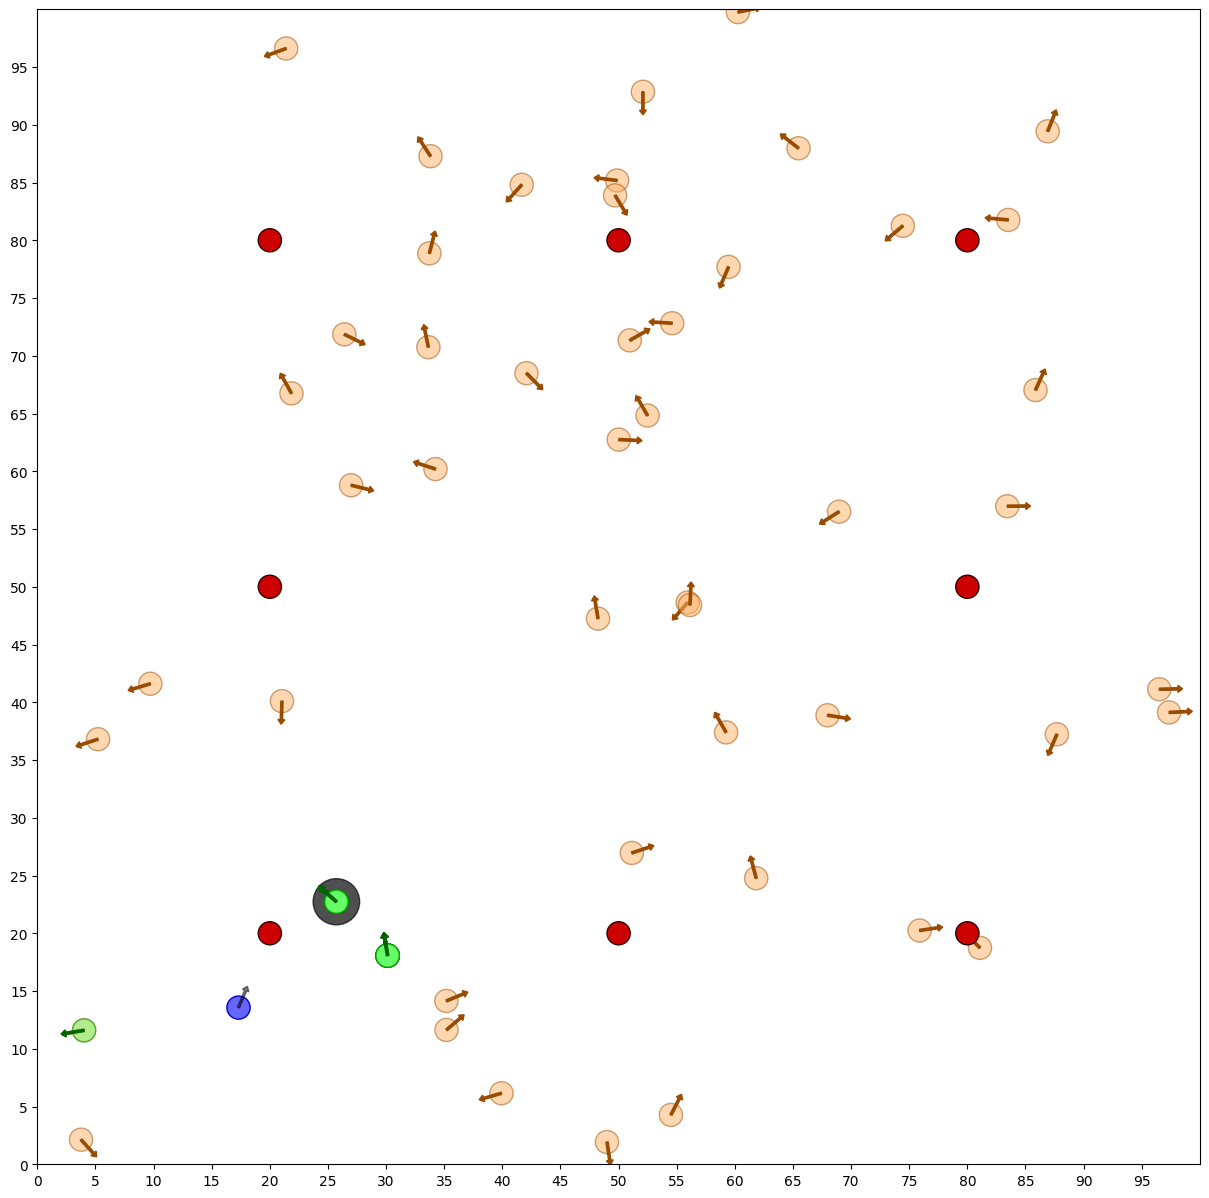

12.739510063971208


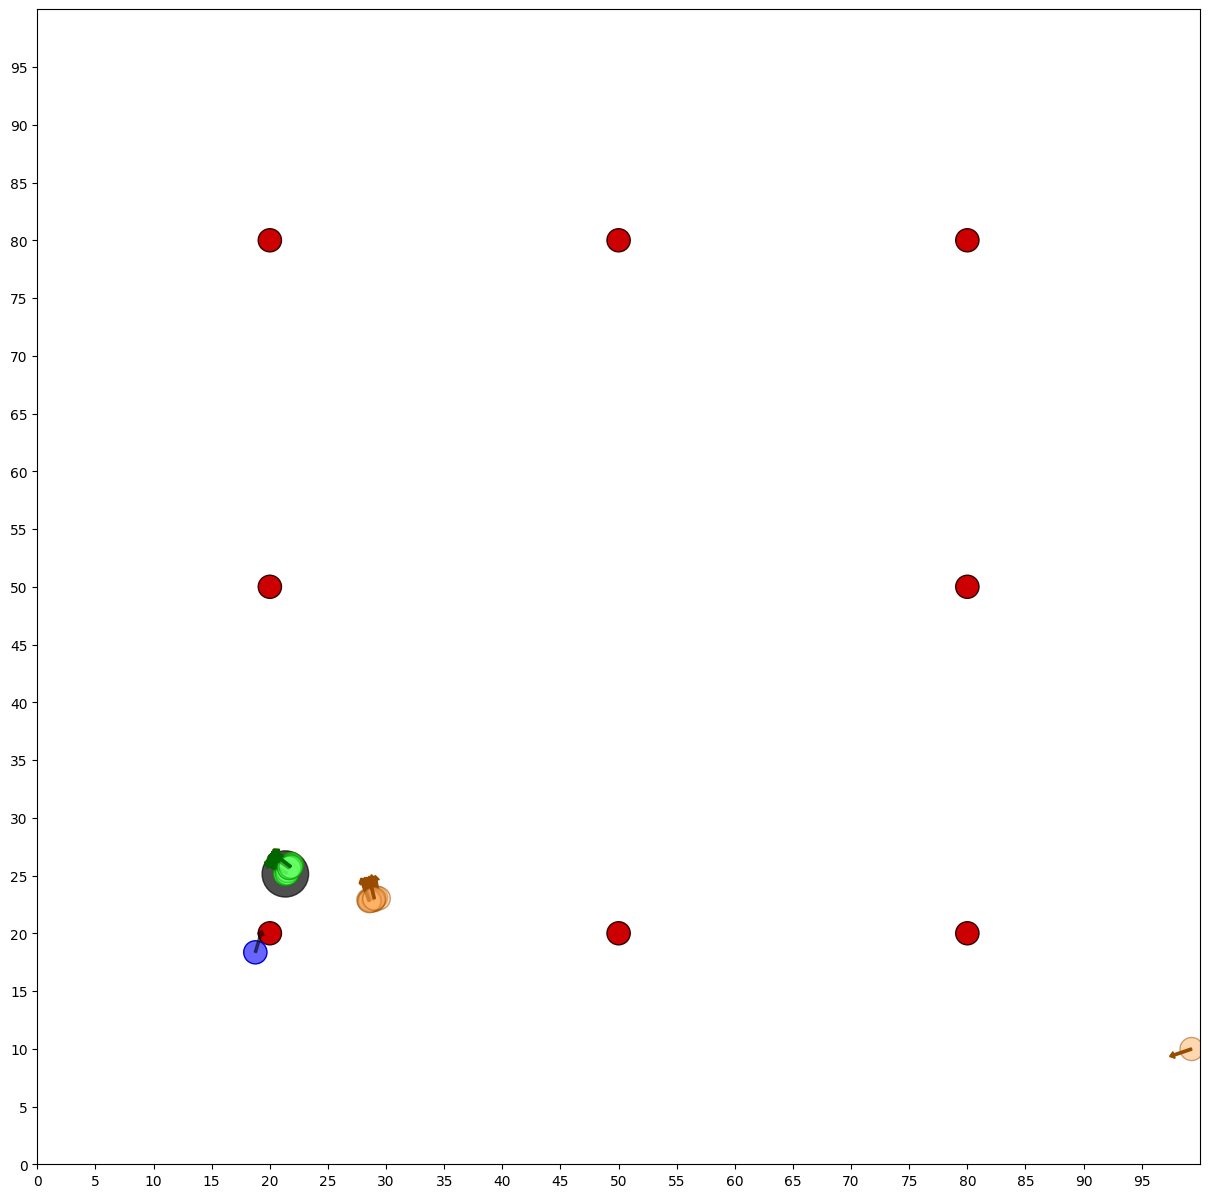

7.775889261336408


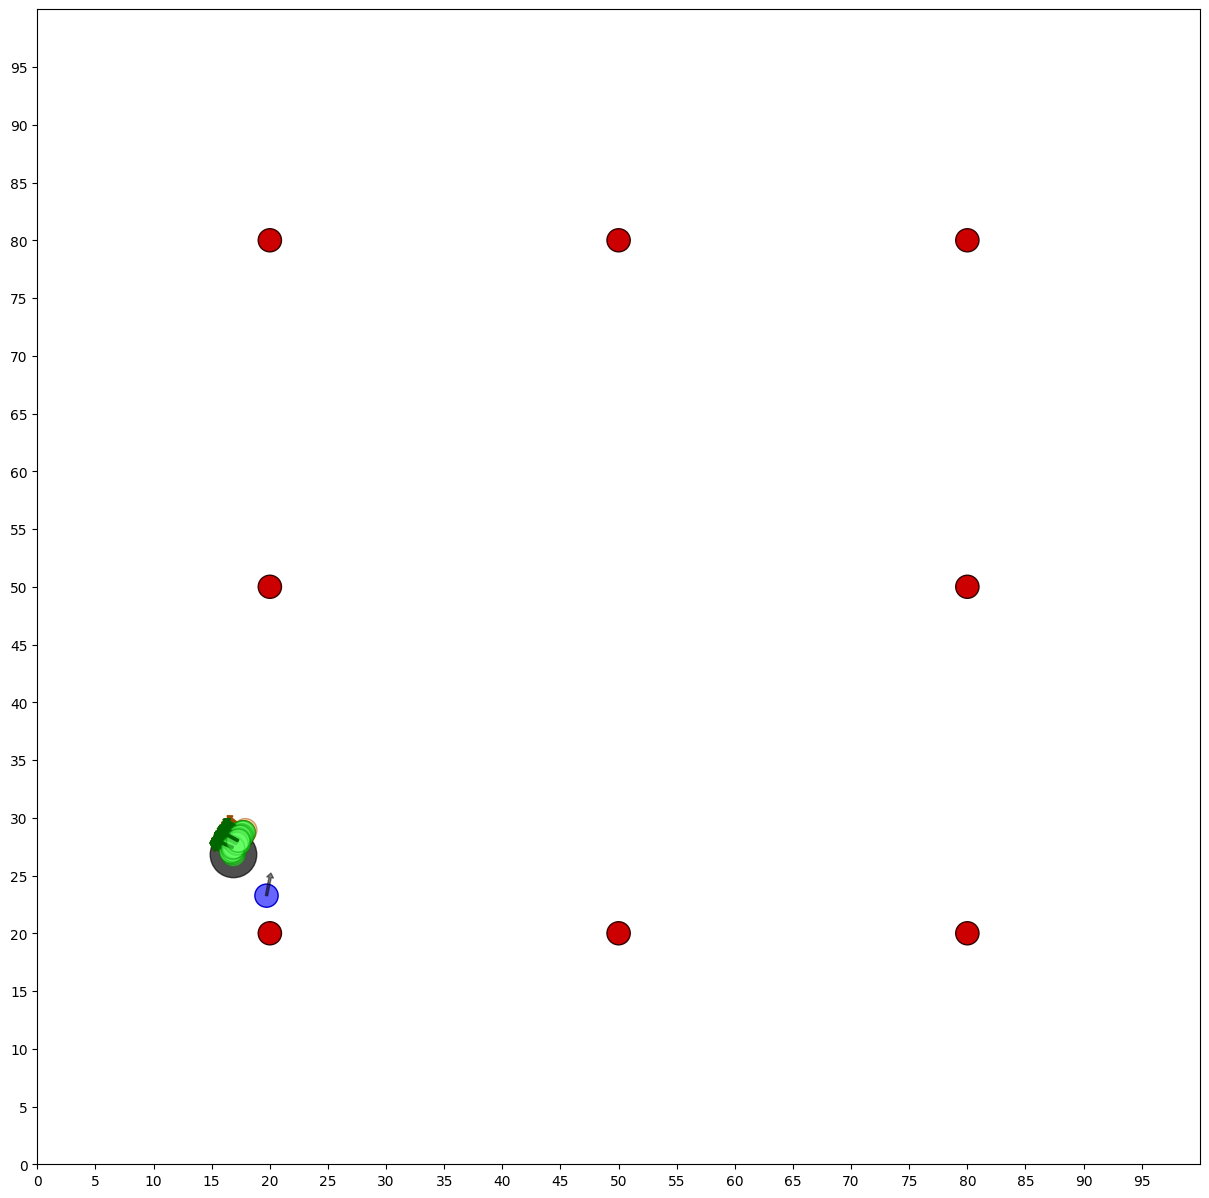

5.235357376695691


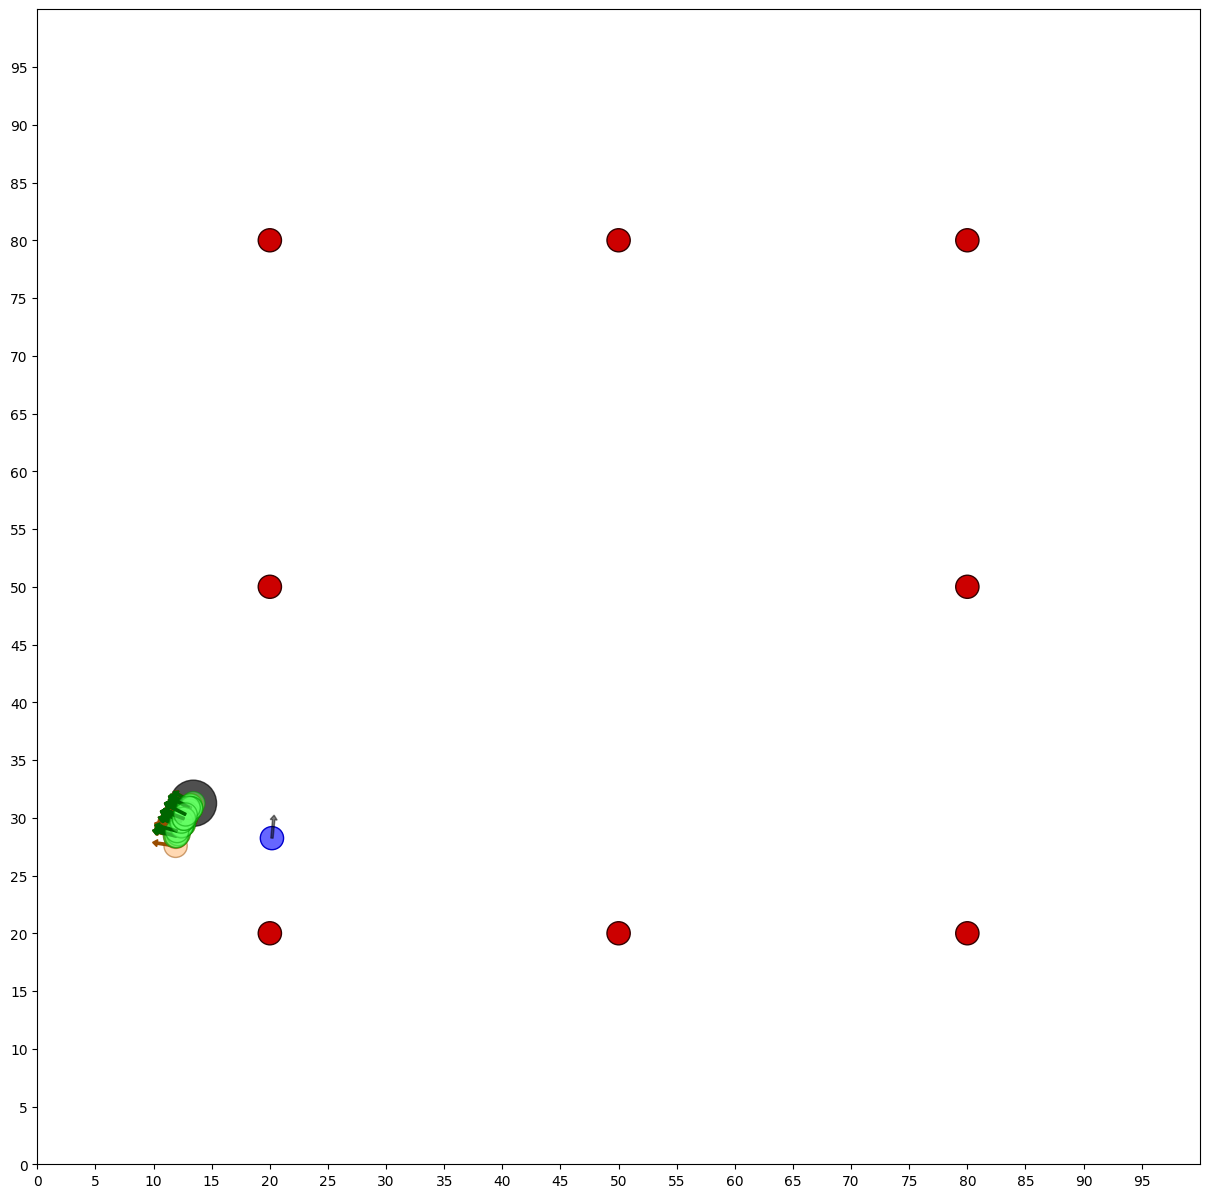

7.742584513995512


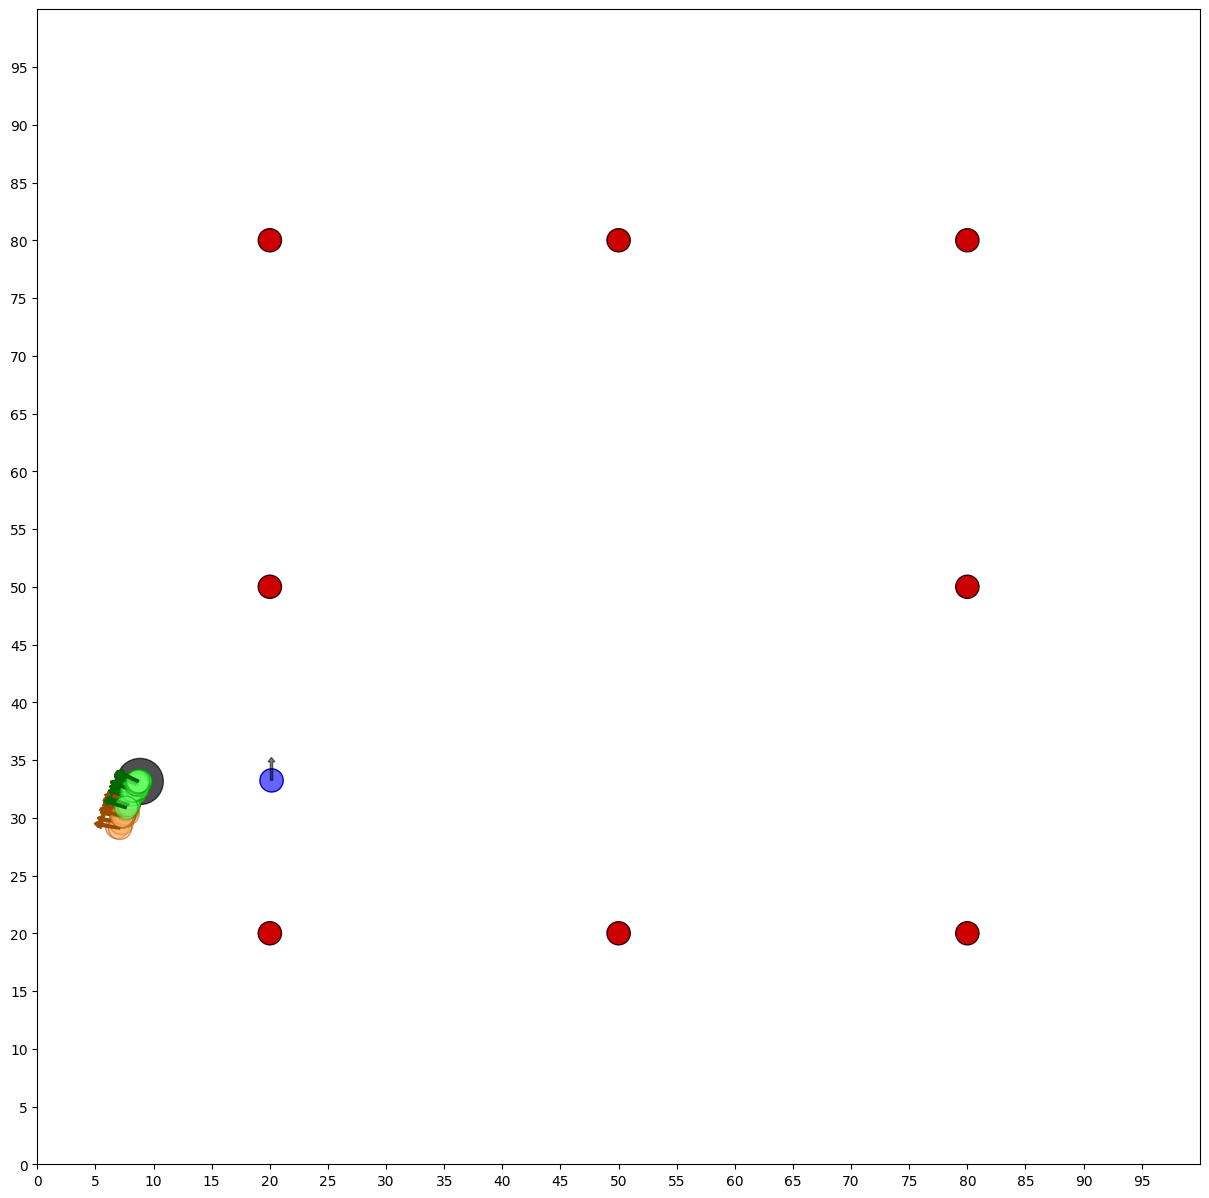

11.677267218884694


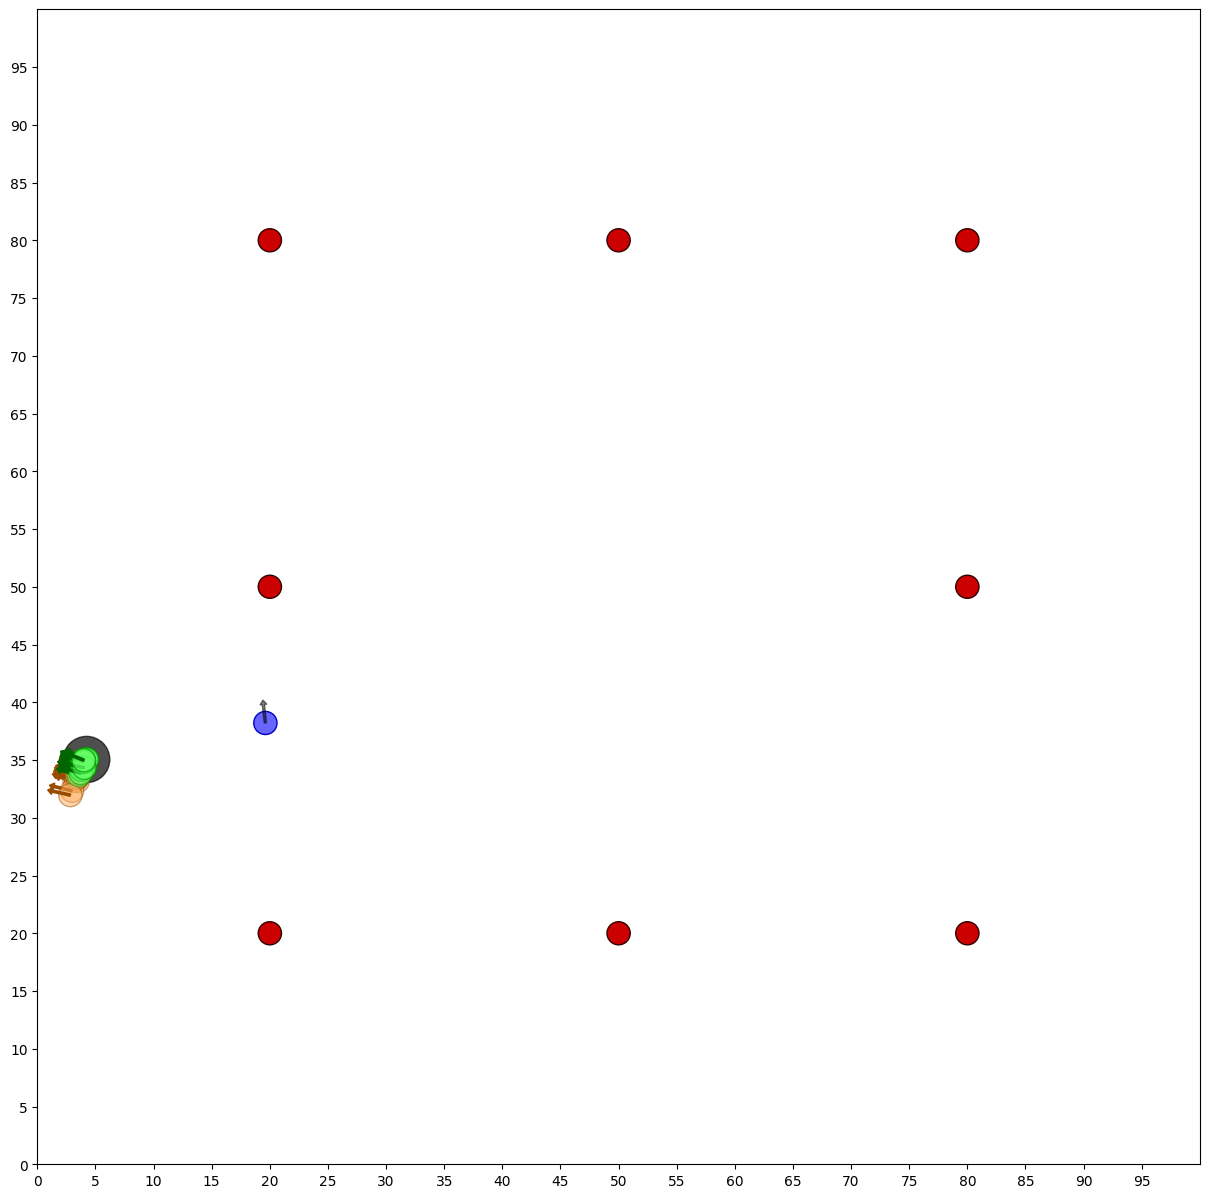

16.05928687065836


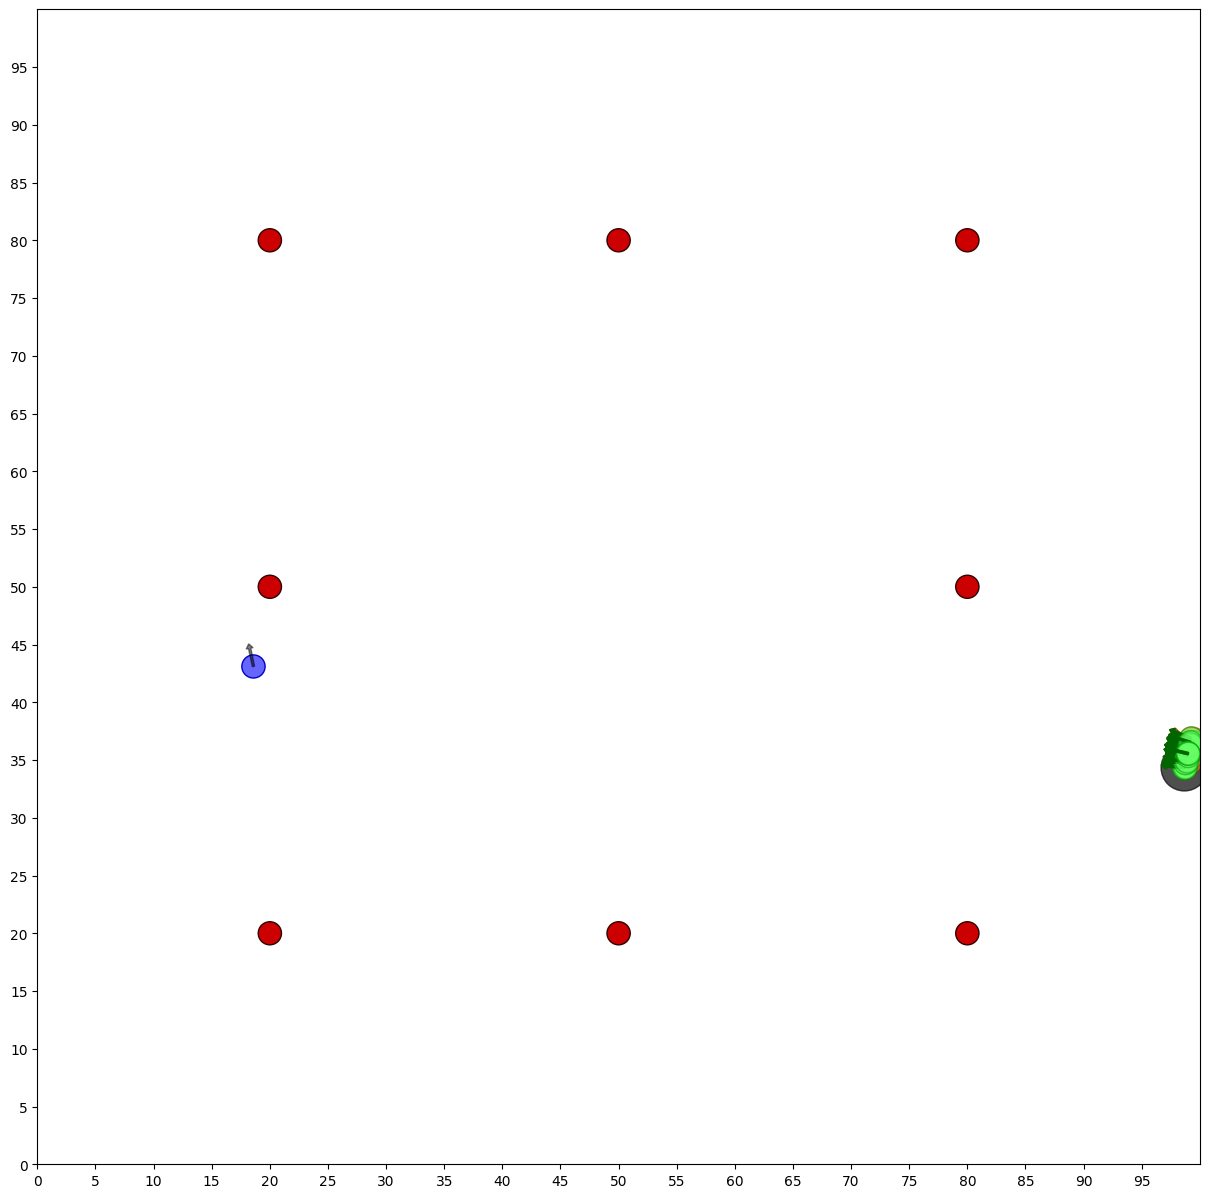

20.932625451358717


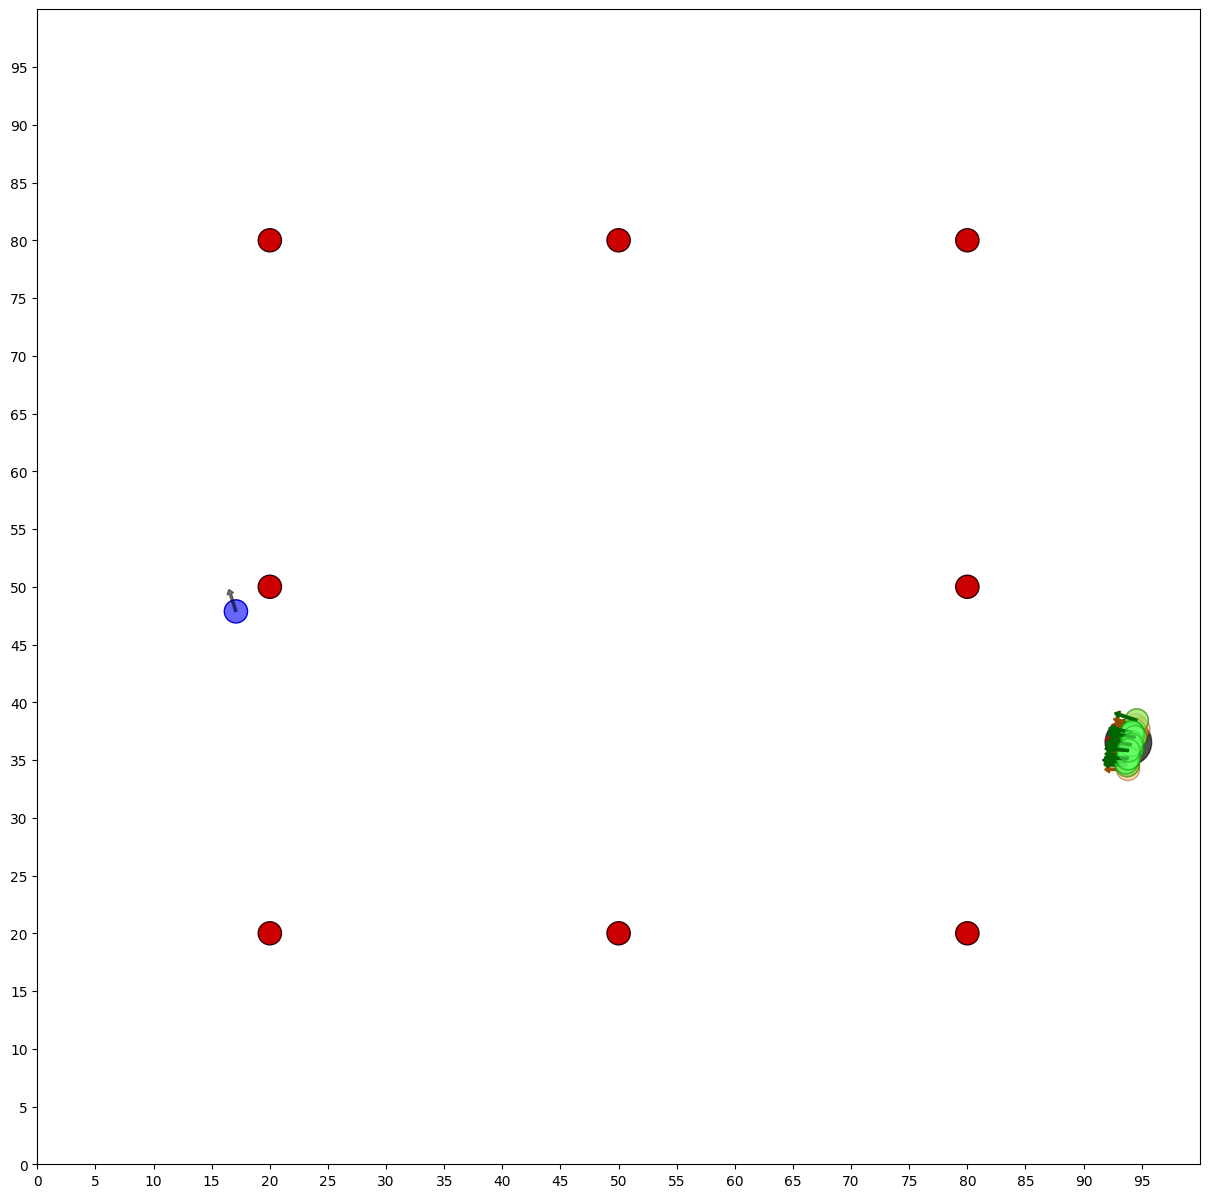

25.747000384074223


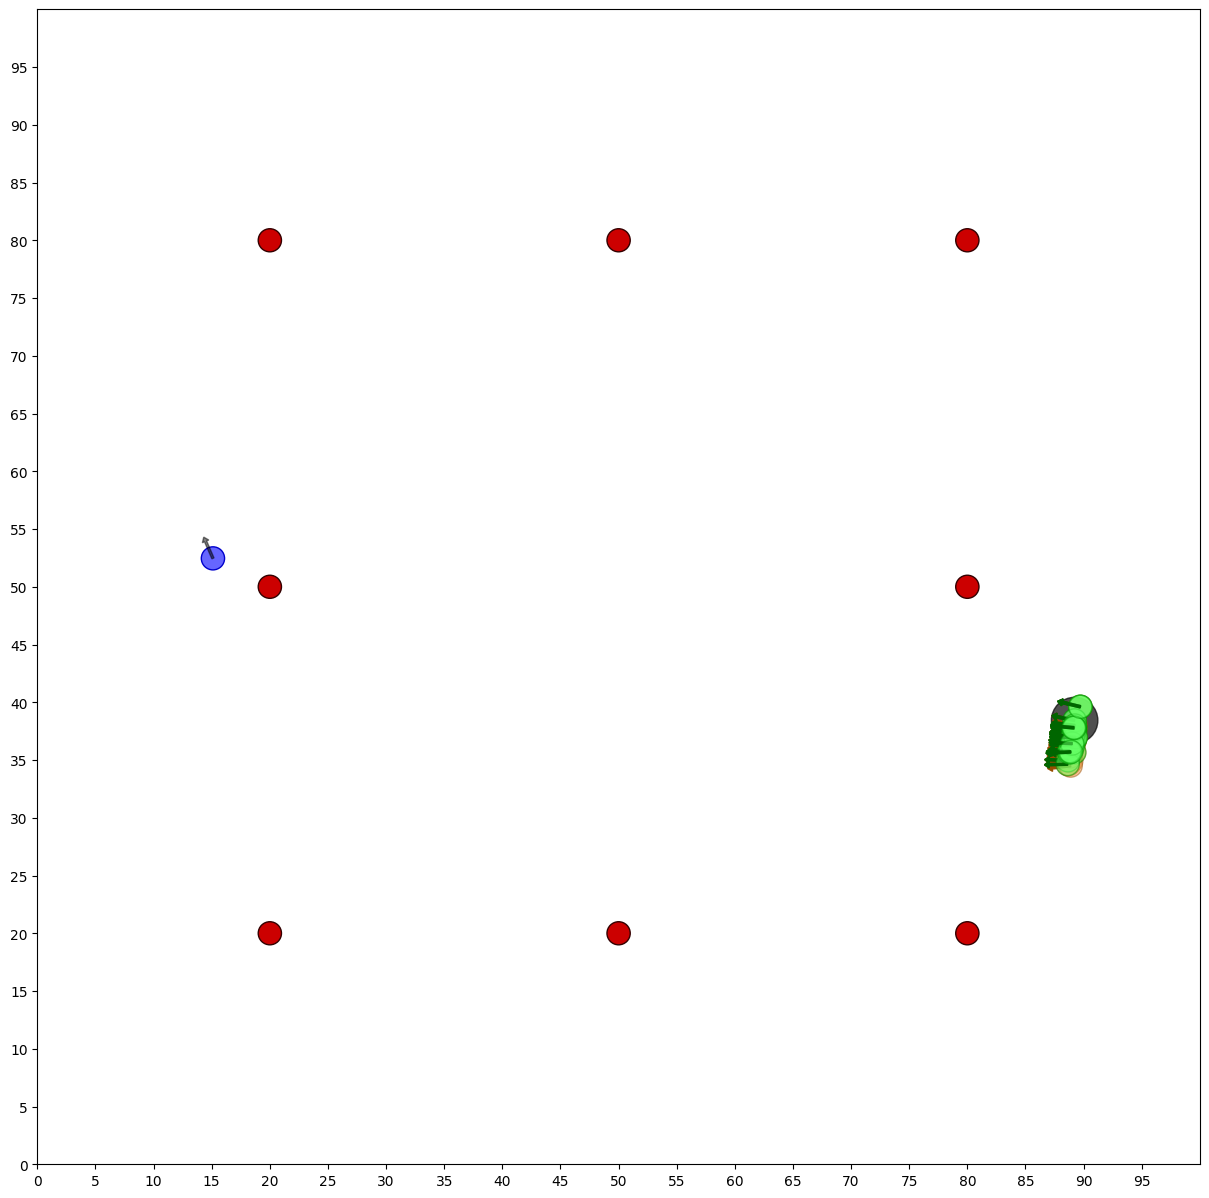

30.140065057024252


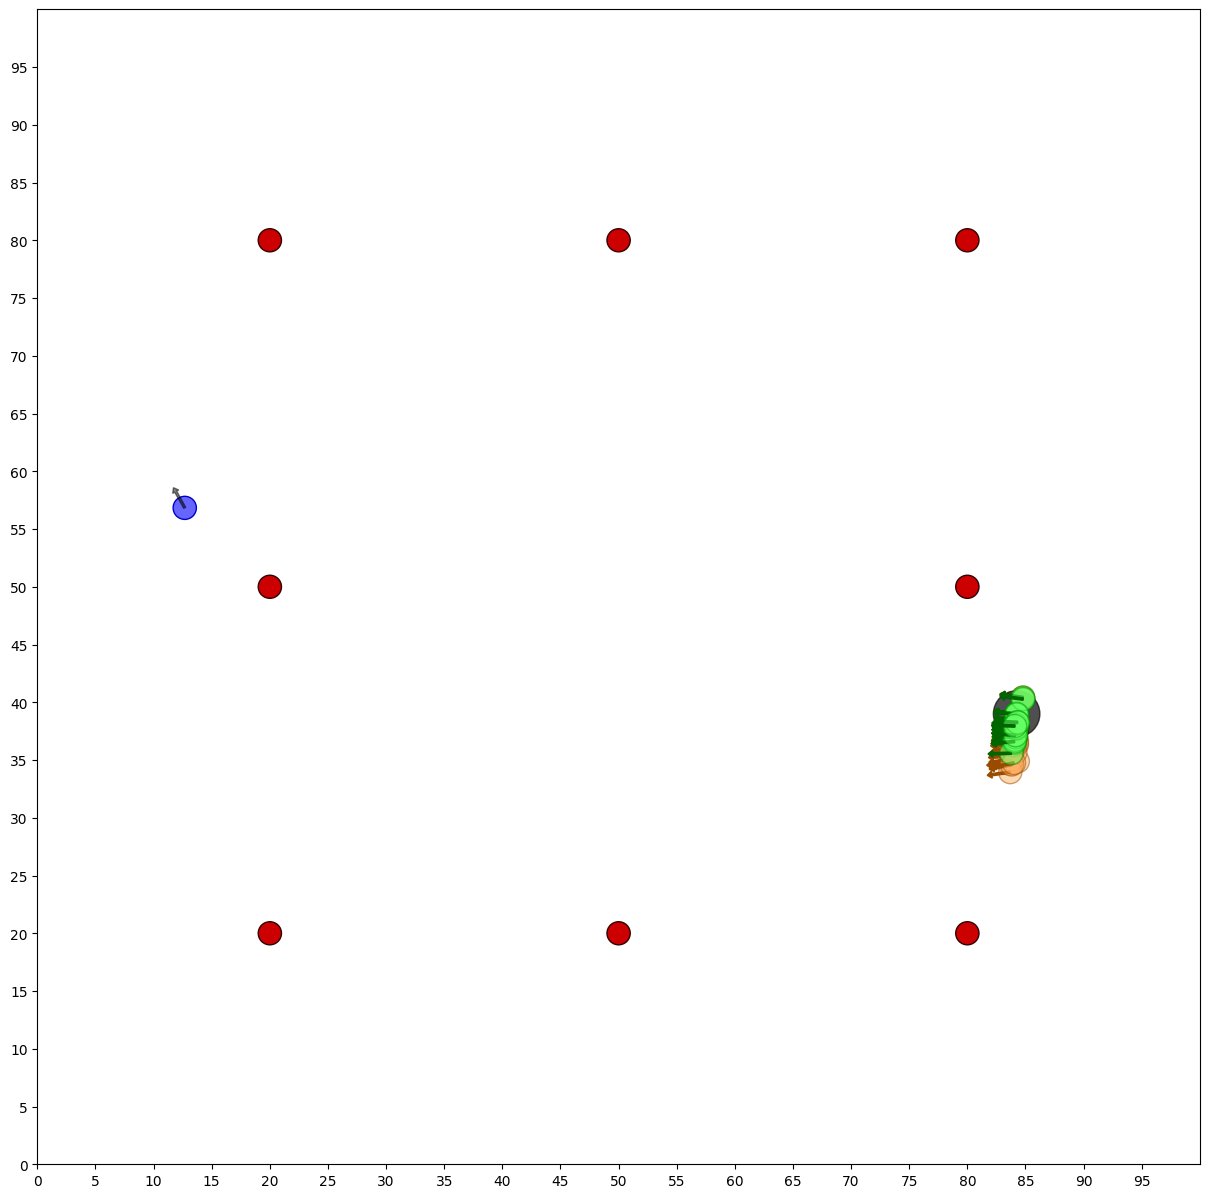

34.23785497650461


In [9]:
def fullParticleFilter(N = 50):
    myrobot = robot()
    moveTimes = 10
    p = []
    for i in range(N):
        x = robot()
        x.set_noise(0.05, 0.05, 5.0)
        p.append(x)

    for t in range(moveTimes):

        myrobot = myrobot.move(0.1, 5.0)
        Z = myrobot.sense()

        p2 = []
        for i in range(N):
              p2.append(p[i].move(0.1, 5.0))
        p = p2

        #print (eval(myrobot,p))

        w = []
        for i in range(N):
            w.append(p[i].measurement_prob(Z))

        p3 = []
        #Resampling wheel
        index = int(random.random() * N)
        beta = 0.0
        mw = max(w)
        for i in range(N):
            beta += random.random() * 2.0 * mw
            while beta > w[index]:
                beta -= w[index]
                index = (index + 1) % N
            p3.append(p[index])
        p=p3
        '''
        :param robot:   the current robot object
        :param step:    the current step
        :param p:       list with particles
        :param pr:      list of resampled particles
        :param weights: particle weights
        '''
        visualization(myrobot,t, p2, p, w)
        print(eval(myrobot,p))

# Resampled particles in green
# Particles in yellow
# Ground truth (robot's position) in blue
fullParticleFilter()

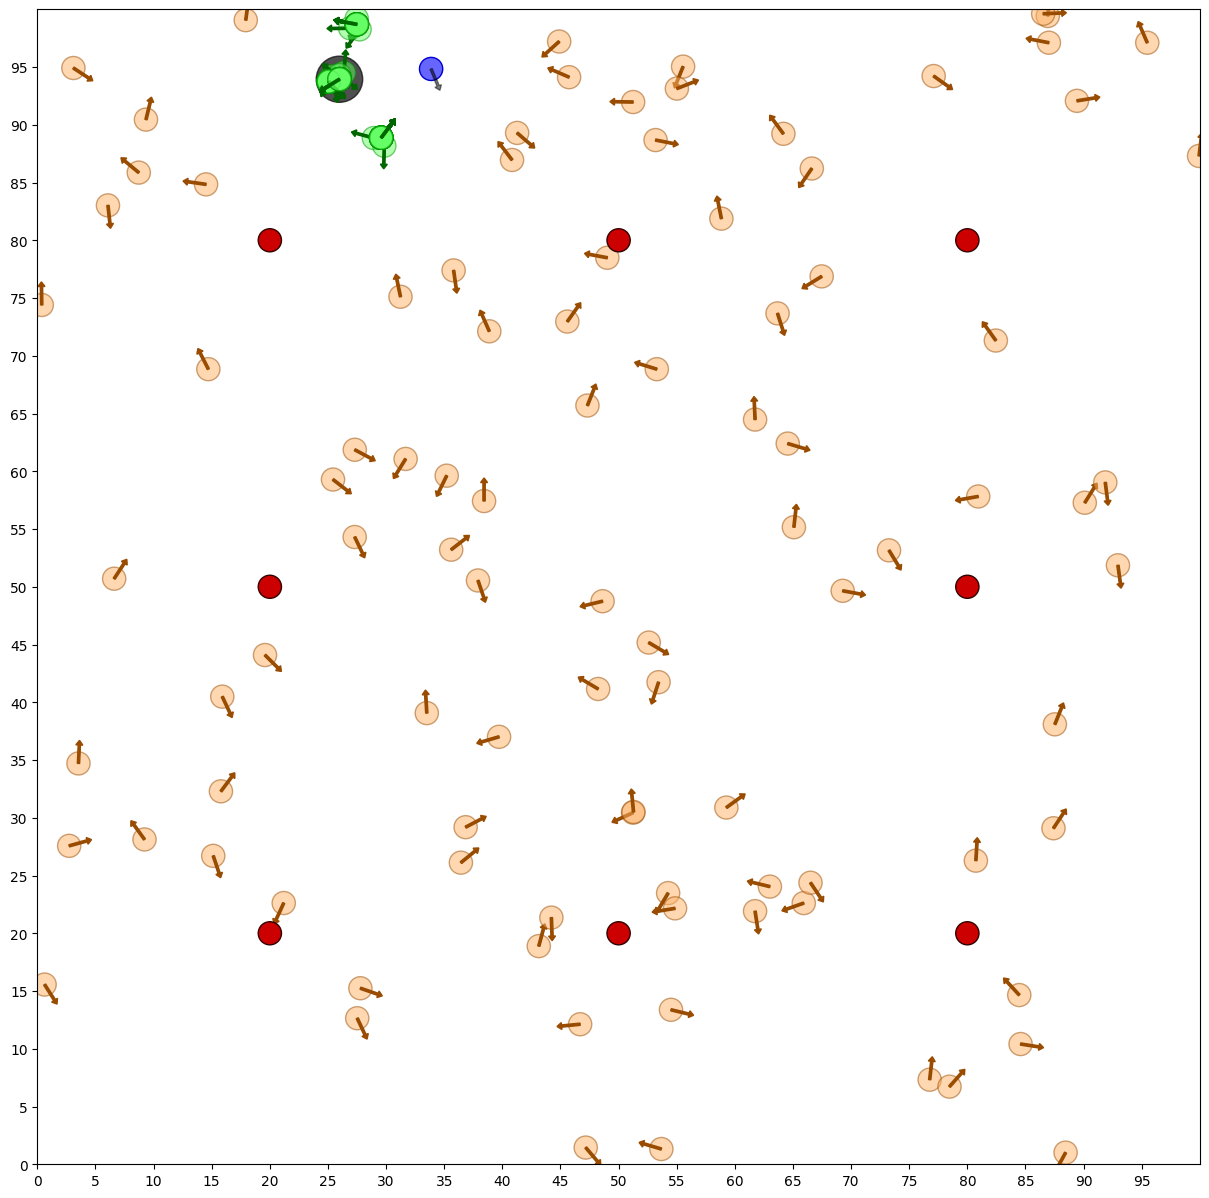

7.909399252046499


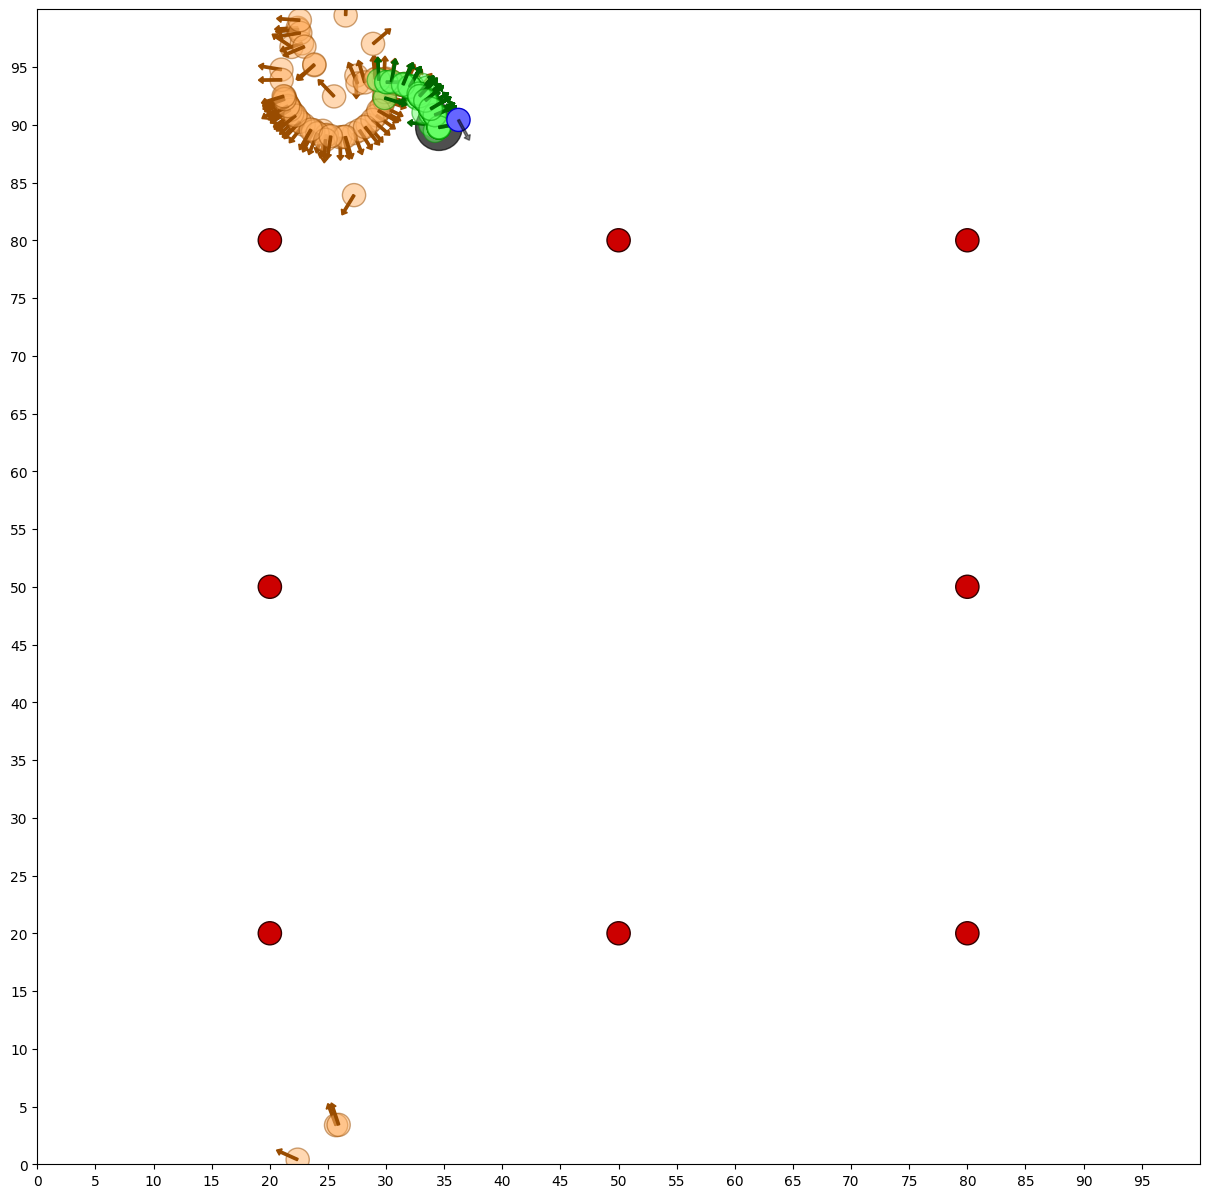

3.286815007119432


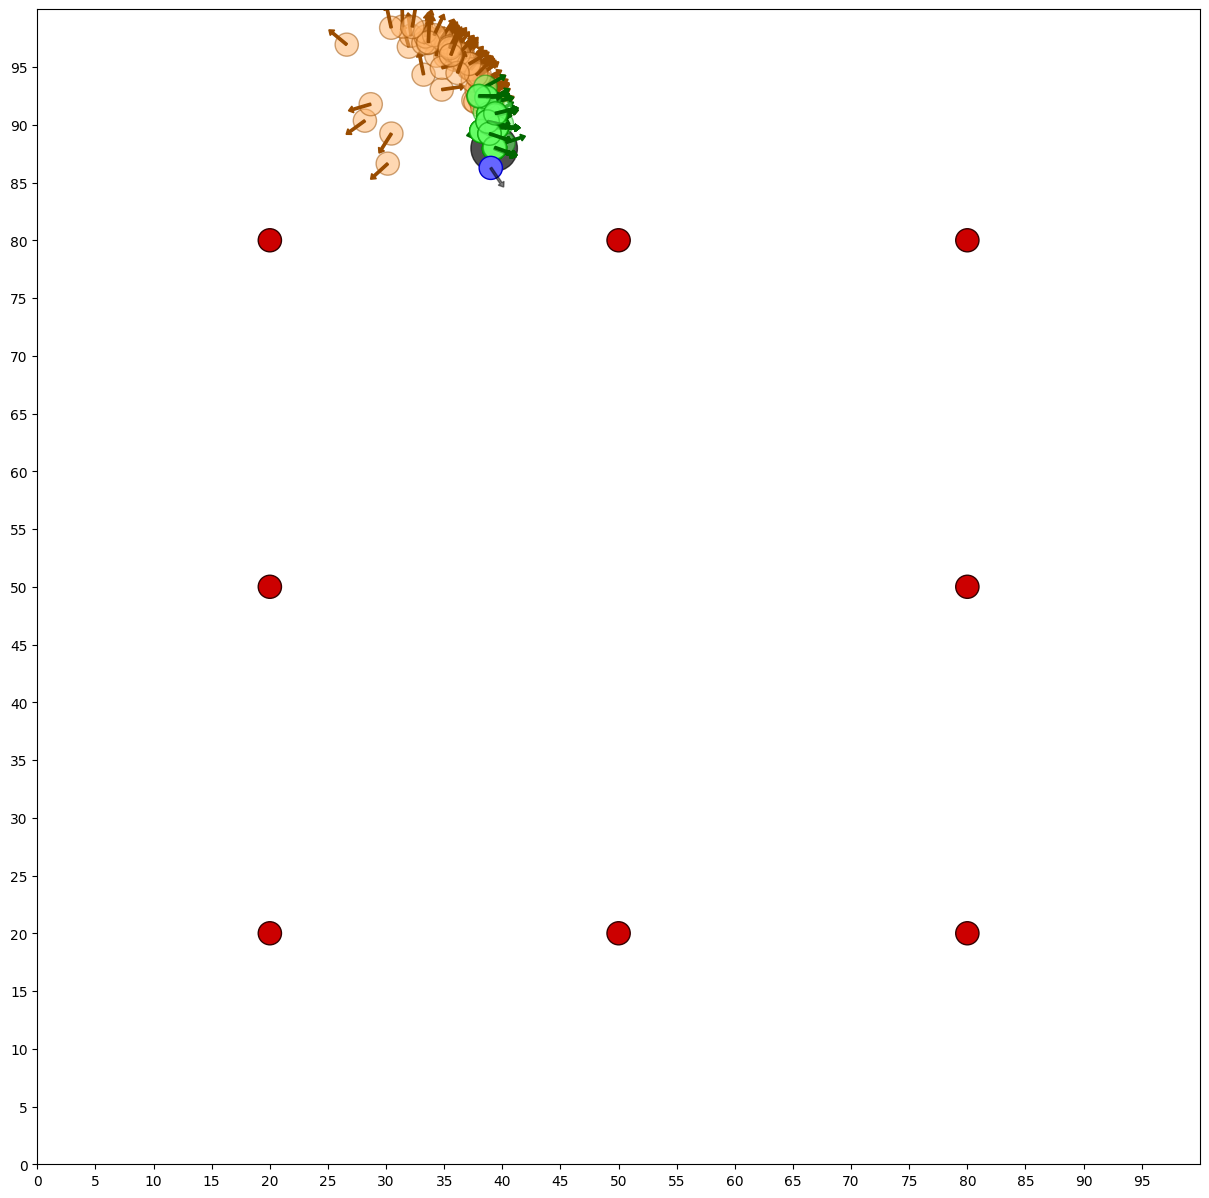

3.3140420614551895


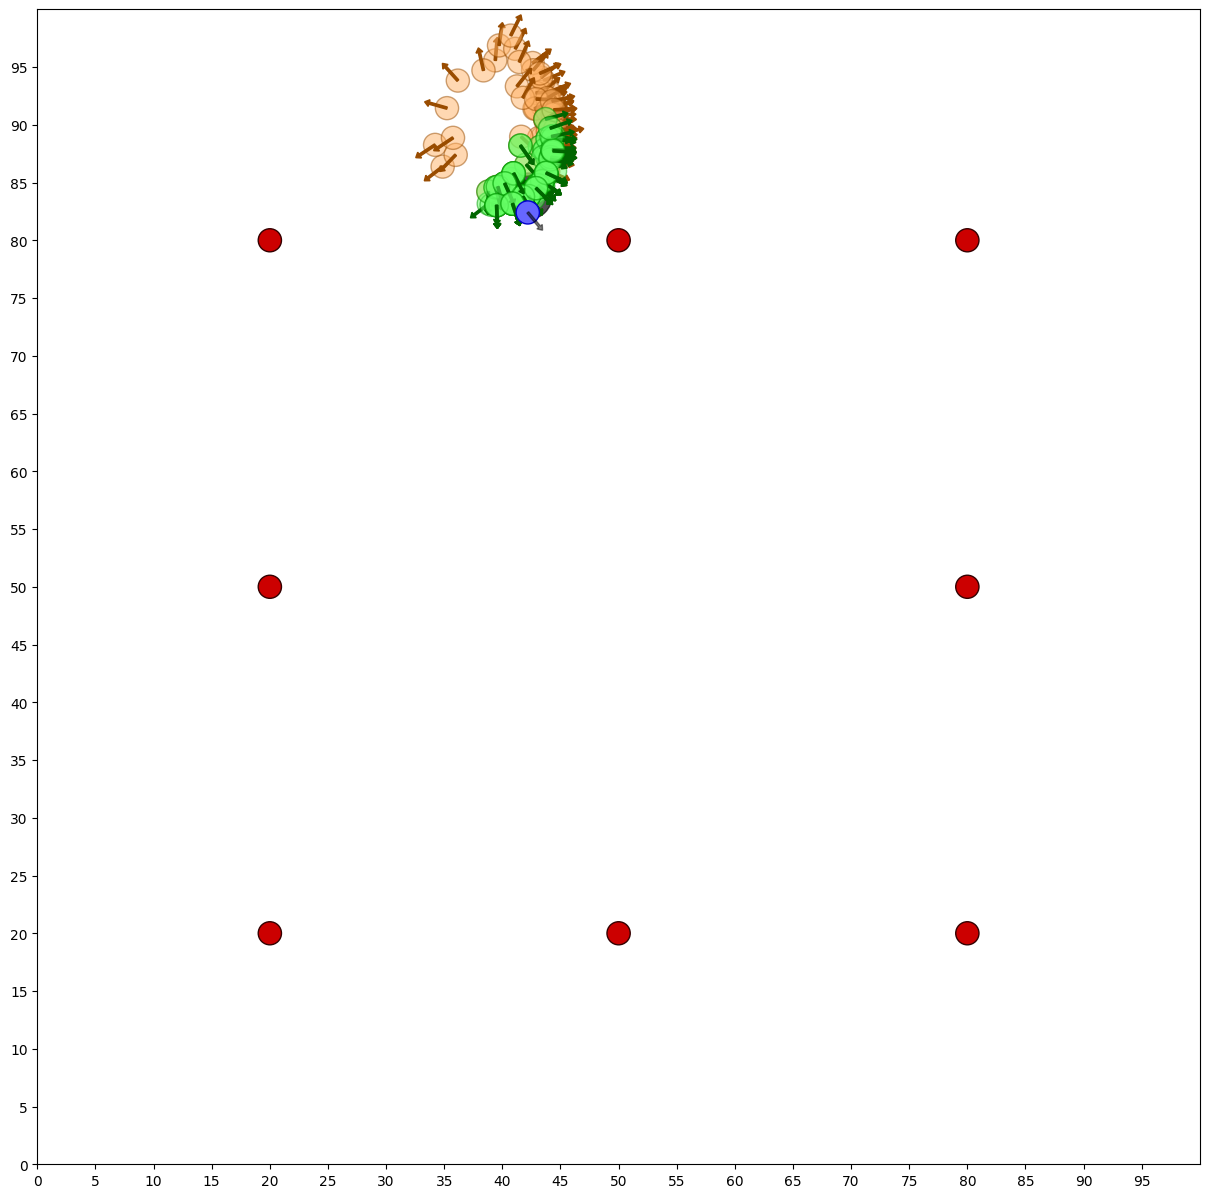

3.476312792655894


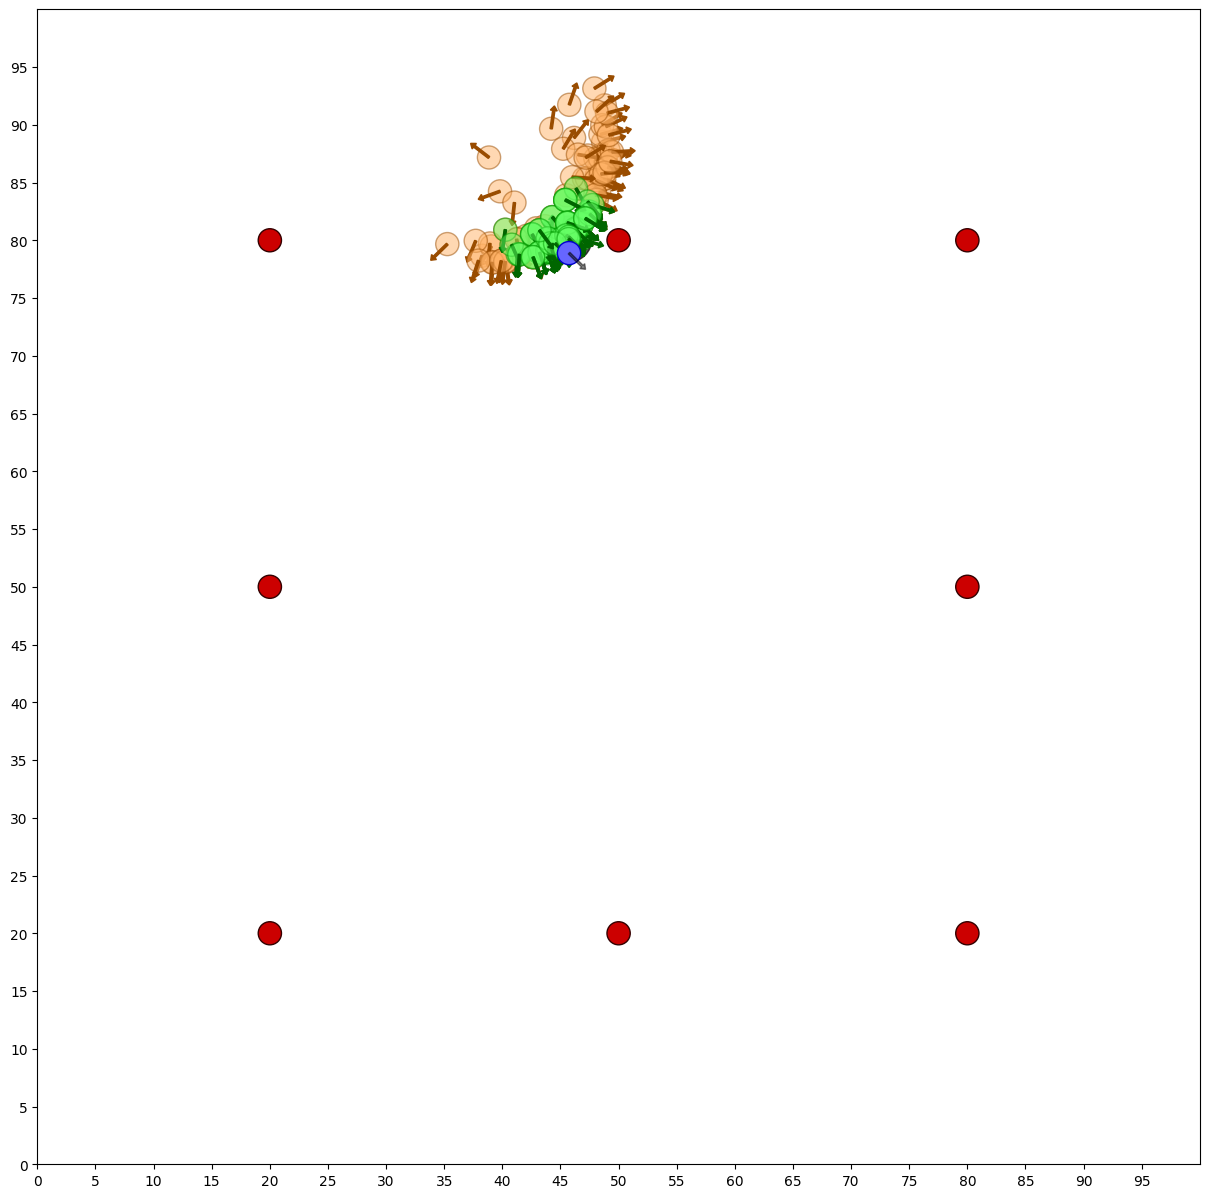

2.3845337030666034


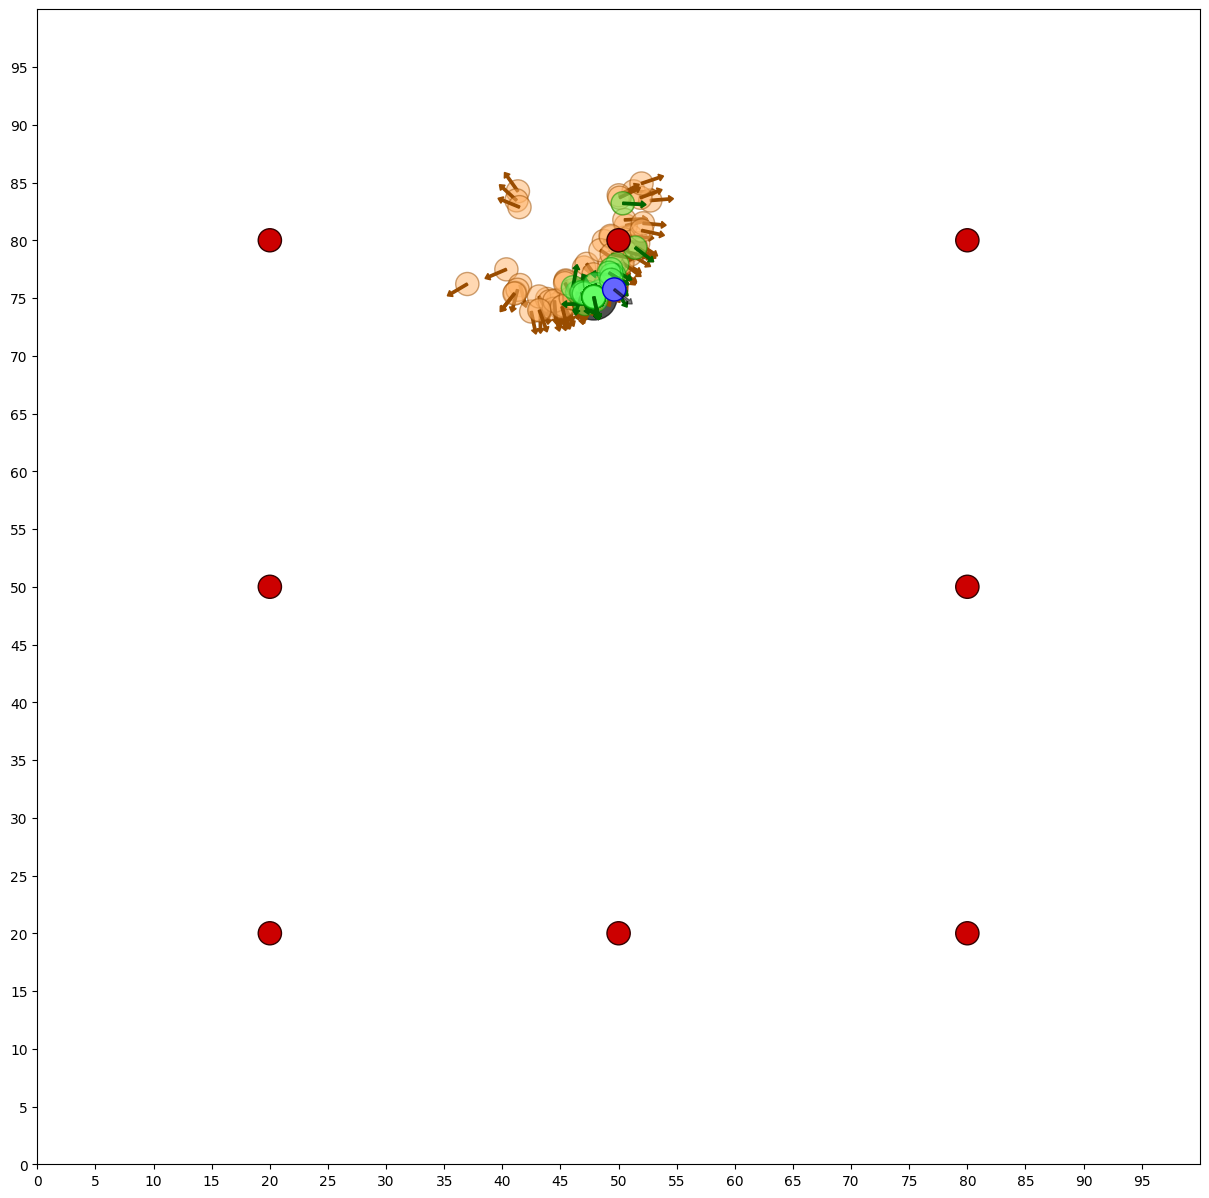

1.9611593419606799


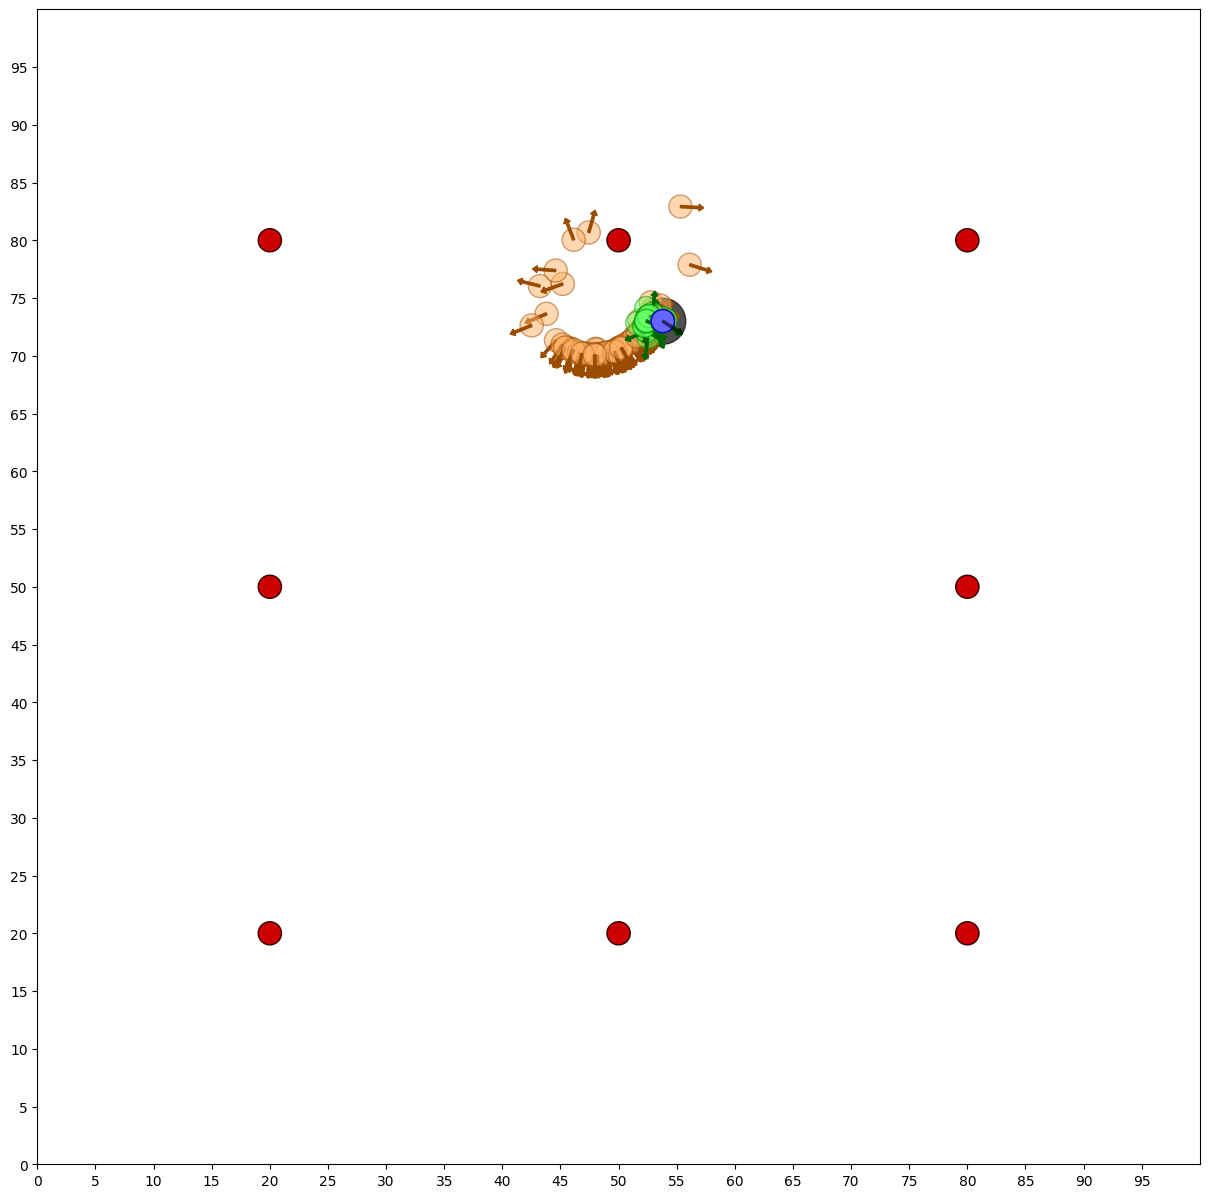

0.2956418228371041


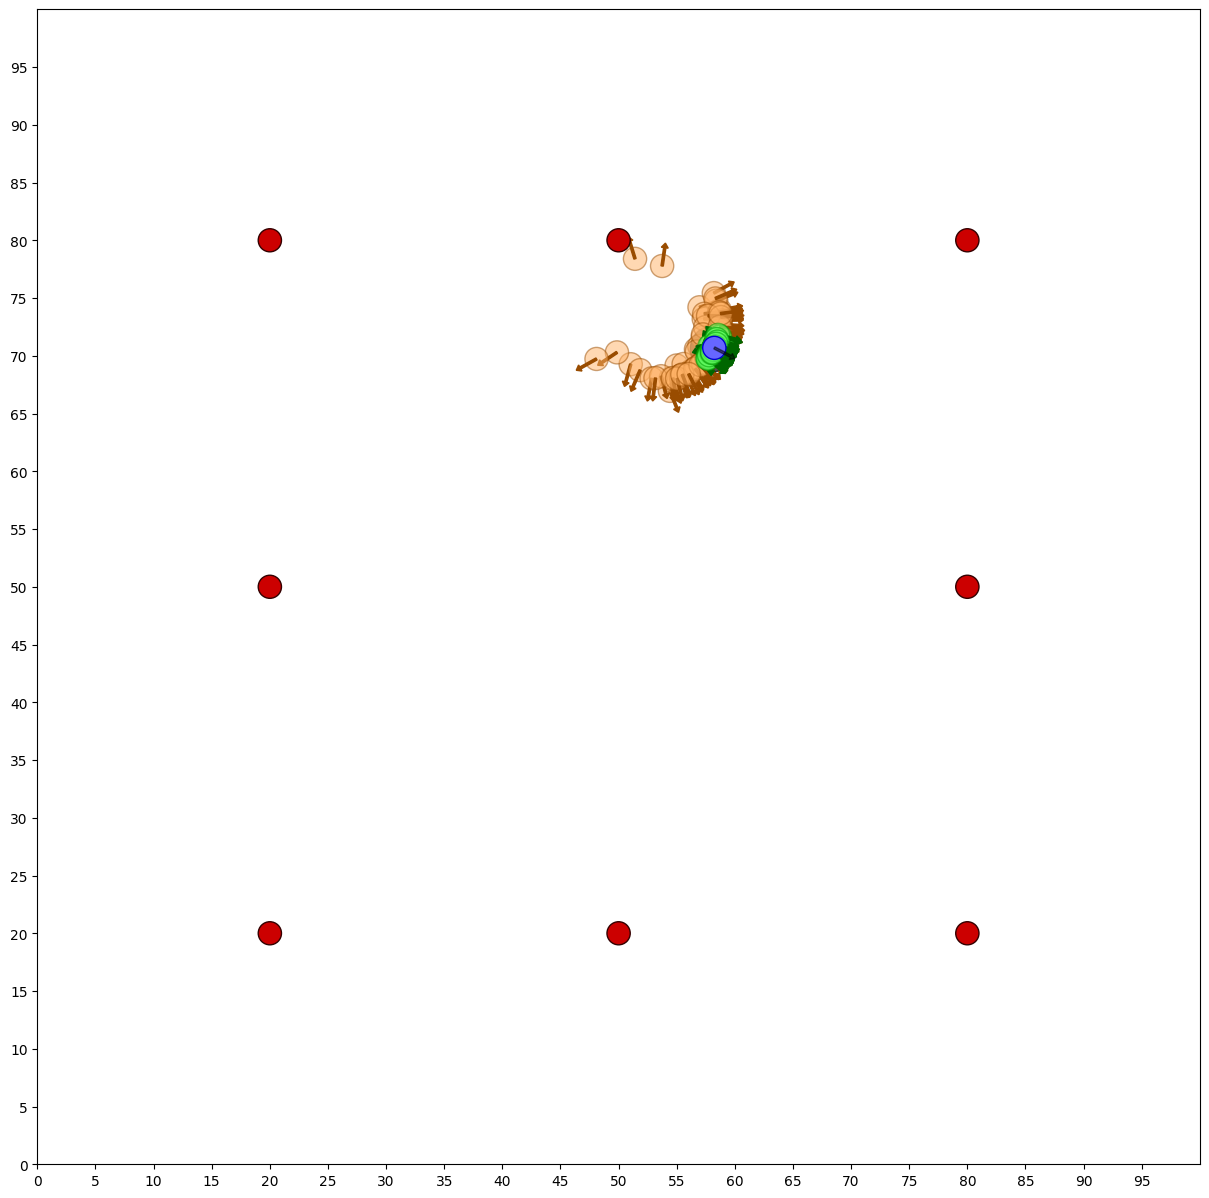

0.381654192889352


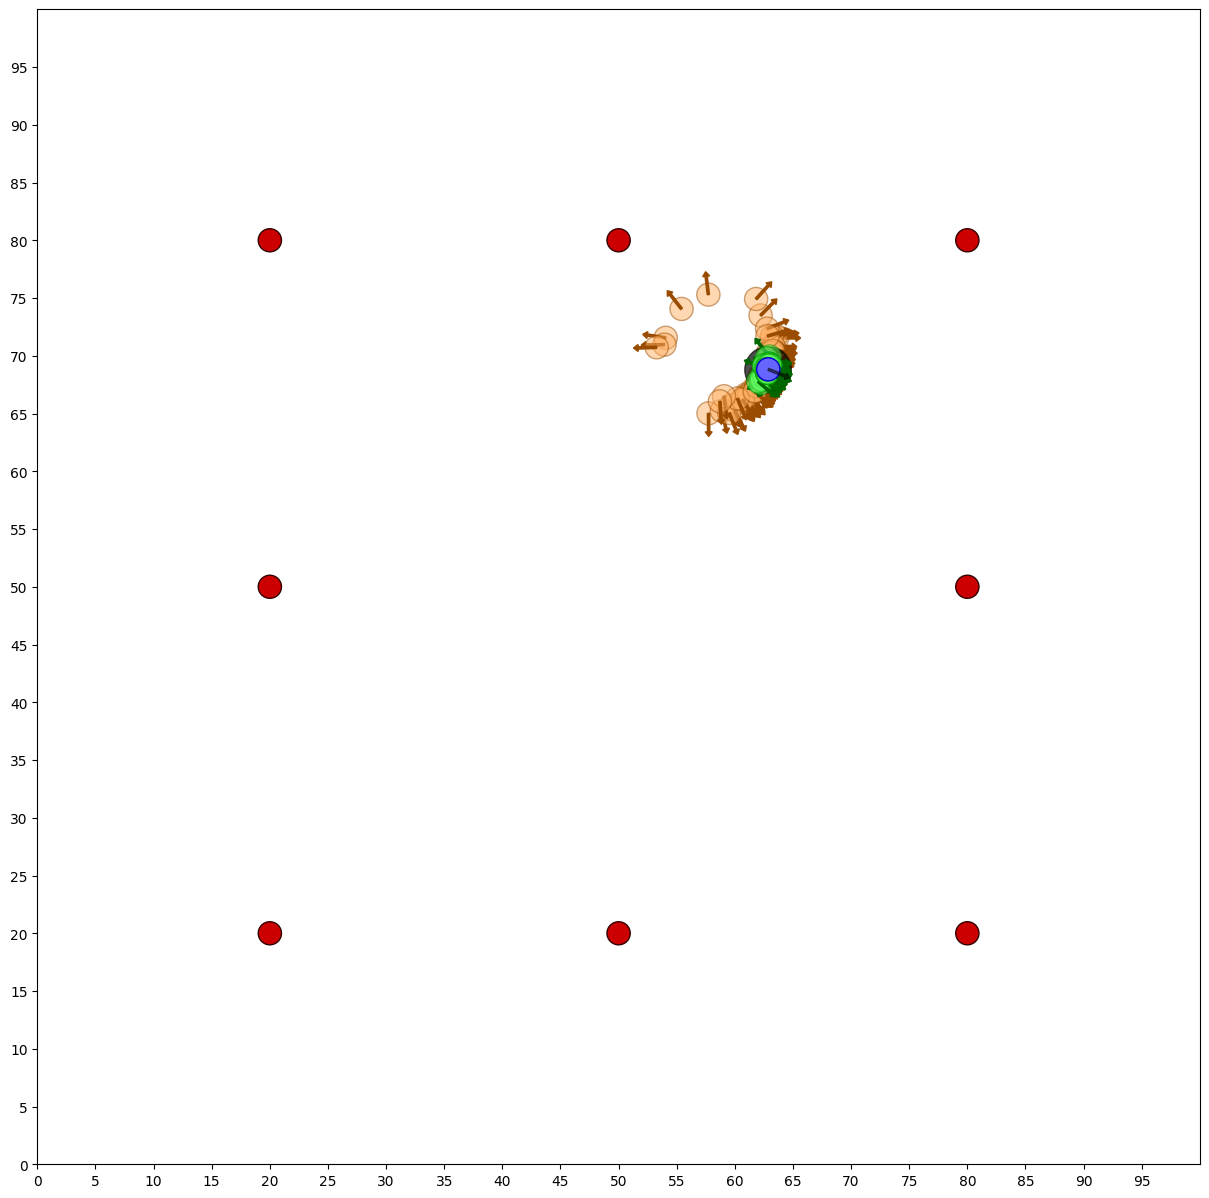

0.30112030191524325


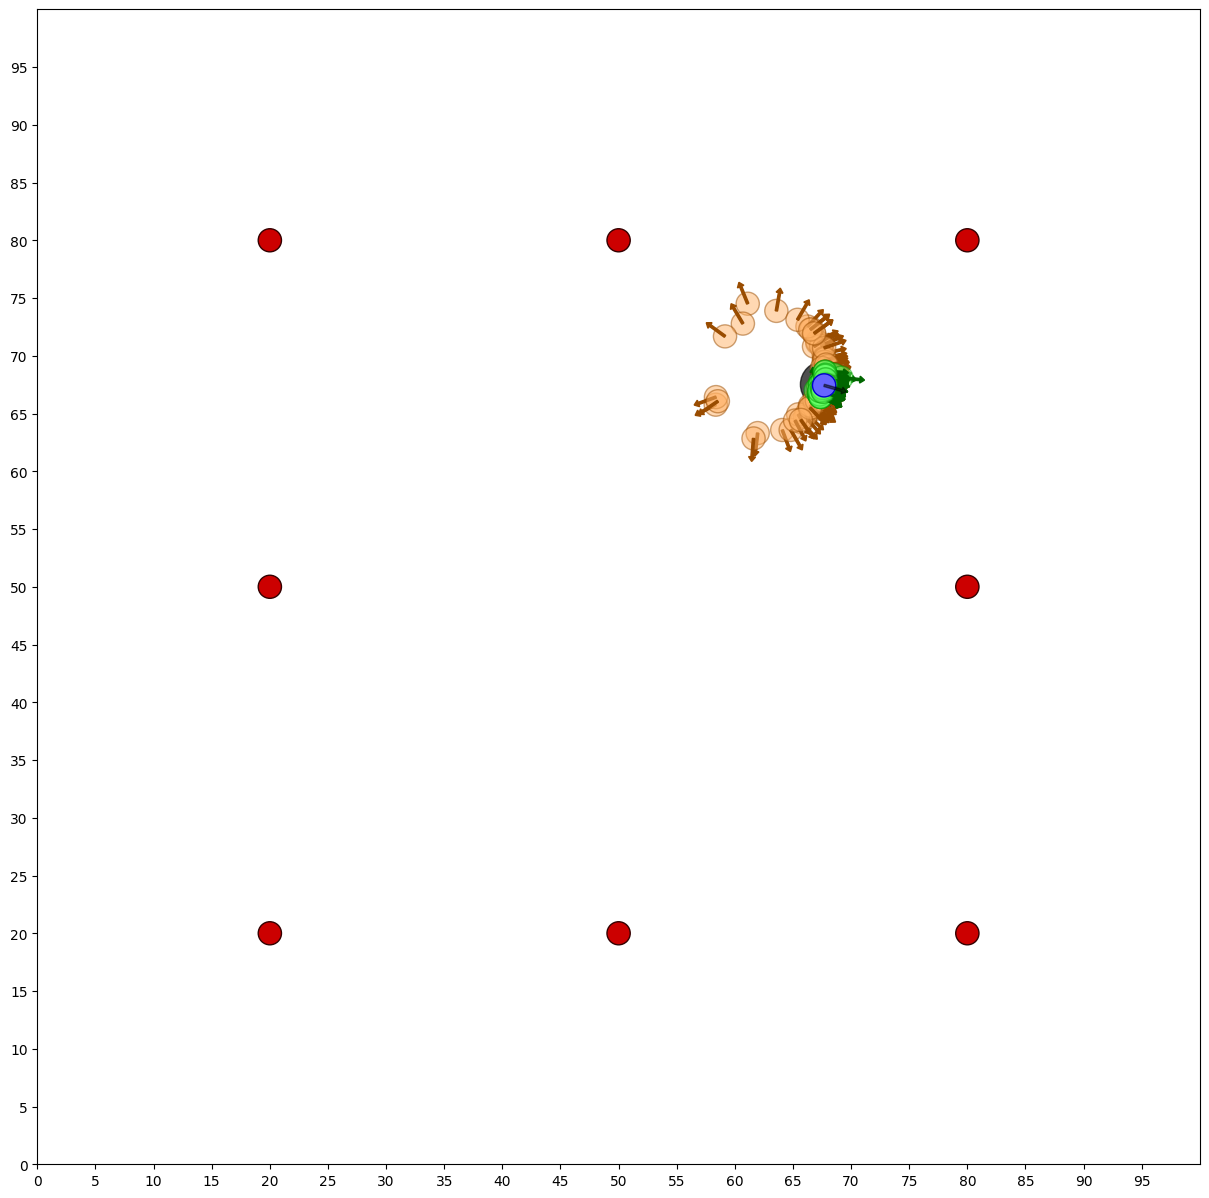

0.5066690165917059


In [10]:
landmarks2 = [[20.0, 20.0], [20.0, 80.0], [20.0, 50.0],
             [50.0, 20.0], [50.0, 80.0], [80.0, 80.0],
             [80.0, 20.0], [80.0, 50.0], [50.0, 50.0],
             [35.0, 65.0], [70.0,65.0], [35.0,35.0], [70.0,35.0]]

landmarks = [[20.0, 20.0], [20.0, 80.0], [20.0, 50.0],
             [50.0, 20.0], [50.0, 80.0], [80.0, 80.0],
             [80.0, 20.0], [80.0, 50.0]]
def fullParticleFilterImprovedResampling(N = 50):
    myrobot = robot()
    moveTimes = 10
    p = []
    for i in range(N):
        x = robot()
        x.set_noise(0.05, 0.5, 5.0)
        p.append(x)

    for t in range(moveTimes):

        myrobot = myrobot.move(0.1, 5.0)
        Z = myrobot.sense()

        p2 = []
        for i in range(N):
              p2.append(p[i].move(0.1, 5.0))
        p = p2

        #print (eval(myrobot,p))

        w = []
        for i in range(N):
            w.append(p[i].measurement_prob(Z))

        p3 = []
        #Resampling wheel
        index = int(random.random() * N)
        beta = 0.0
        mw = max(w)
        for i in range(N):
            beta += random.random() * 2.0 * mw
            while beta > w[index]:
                beta -= w[index]
                index = (index + 1) % N
            p3.append(p[index])

        # Aggiungi particelle rigenerate casualmente intorno alle migliori
        num_random_particles = int(0.1 * N)  # rigenera il 10% delle particelle
        best_particles = sorted(p3, key=lambda particle: particle.measurement_prob(Z), reverse=True)[:num_random_particles]

        for i in range(num_random_particles):
            # Seleziona una delle migliori particelle
            best_particle = random.choice(best_particles)

            # Crea una nuova particella intorno alla migliore aggiungendo rumore casuale
            random_particle = robot()
            random_particle.set_noise(0.05, 0.5, 1)
            random_particle.set(
                (best_particle.x + random.gauss(0, 0.5) )% world_size,  # piccolo spostamento casuale
                (best_particle.y + random.gauss(0, 0.5))% world_size,
                (best_particle.orientation + random.gauss(0, 100)) % (2 * pi)  # normalizza l'orientamento tra 0 e 2*pi
            )
            p3[i] = random_particle  # Sostituisci alcune particelle con quelle rigenerate

        p = p3
        '''
        :param robot:   the current robot object
        :param step:    the current step
        :param p:       list with particles
        :param pr:      list of resampled particles
        :param weights: particle weights
        '''
        visualization(myrobot,t, p2, p, w)
        print(eval(myrobot,p))

fullParticleFilterImprovedResampling(100)


Exercise 1: Analyze the effect of noise

    Objective: Experiment with different noise levels in the set_noise() function for both the motion and measurement models.
    Task: Test different noise settings and observe how it impacts the accuracy of the particle filter.
    Learning Goal: Learn how noise levels influence state estimation and the trade-off between exploration and convergence in the filter.

Exercise 2: Evaluate resampling strategy

    Objective: Modify the resampling wheel to use other resampling techniques, such as systematic resampling.
    Task: Replace the resampling wheel with systematic resampling and compare the results with the original wheel approach.
    Learning Goal: Explore the differences between various resampling techniques and their impact on particle filter performance.

Exercise 3: Optimize the number of random particles

    Objective: Experiment with the proportion of random particles added around the best particles.
    Task: Adjust the num_random_particles percentage (e.g., try 5%, 20%, etc.) and observe how it impacts the filter’s performance over time.
    Learning Goal: Understand the effect of regenerating particles around the best particles and how to balance exploitation vs. exploration.

Exercise 4: Vary the number of particles

    Objective: Modify the number of particles (N) and measure the filter’s performance with different population sizes.
    Task: Compare the performance of the filter when using small (N=10), medium (N=50), and large (N=200) particle sets.
    Learning Goal: Trade-offs between computational complexity and accuracy in particle filters.

Exercise 5: Implement particle depletion prevention

    Objective: Add logic to the algorithm that detects particle depletion and introduces mechanisms to regenerate particles when diversity is too low.
    Task: Introduce a condition to check for particle diversity (e.g., too many identical particles) and implement an adaptive mechanism to regenerate particles.
    Learning Goal: Understand and mitigate particle depletion, ensuring the particle filter maintains its performance over time.